# Loading Data and Converting to Wide Format

In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('./data/ml-latest-small/ratings.csv', index_col=0)
df.head()

movieId  rating  timestamp
userId                            
1             1     4.0  964982703
1             3     4.0  964981247
1             6     4.0  964982224
1            47     5.0  964983815
1            50     5.0  964982931

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 1 to 610
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   rating     100836 non-null  float64
 2   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 3.1 MB


In [29]:
df=pd.pivot_table(df,
                  index='userId',
                  columns='movieId',
                  values='rating')
df.head()

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
5           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  193583  193585  193587  193609  
userId                                   
1           NaN     NaN     NaN     NaN  
2           NaN     NaN     NaN     NaN  
3           NaN     NaN     NaN     NaN  
4           NaN     NaN     NaN     NaN  
5           NaN     NaN     NaN     NaN  

[5 rows x 9724 columns]

# Simple Recommender

## Calculate the average rating for each movie in the dataset

In [30]:
df.mean()

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Length: 9724, dtype: float64

## Filter out movies that have been watched by less than 20 users

In [31]:
df.count()

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Length: 9724, dtype: int64

In [32]:
df_filter = df.loc[:, df.count()>20]
df_filter.head()

movieId  1       2       3       5       6       7       10      11      \
userId                                                                    
1           4.0     NaN     4.0     NaN     4.0     NaN     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  16      17      ...  122920  122922  134130  134853  139385  148626  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
5           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  152081  164179  166528  168252  
userId                                   
1           NaN     NaN     NaN     NaN  
2           NaN     NaN     NaN     NaN  
3           NaN     NaN     NaN     NaN  
4           NaN     NaN     NaN     NaN  
5           NaN     NaN     NaN     NaN  

[5 rows x 1235 columns]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 1 to 610
Columns: 9724 entries, 1 to 193609
dtypes: float64(9724)
memory usage: 45.3 MB


In [34]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 1 to 610
Columns: 1235 entries, 1 to 168252
dtypes: float64(1235)
memory usage: 5.8 MB


## Recommend the top ten movies that a user has not seen yet

In [35]:
def top_ten(df):
    '''
    This function first creates a dataframe named 'top' with movie ids and their average rates in a descending
    order.
    
    Then it creates a dictionary named 'recom' with users as keys and each user has a list of 10 unseen movies 
    which have the highest rate as the value.
    
    Then it converts this dictionary to a dataframe and returns it.
    '''
    #creating top dataframe
    top = df.mean().sort_values(ascending = False)
    top = top.reset_index()
    top.columns = ['movieId','av_rate']
    
    #creating recom dictionary
    recom = {}
    for user in df.index:
        rec_lst = []
        for movie in top['movieId']:
            if pd.isnull(df.loc[user, movie]):
                rec_lst.append(movie)
            if len(rec_lst)== 10:
                break
        recom[user]= rec_lst
#     #converting recom to dataframe
    recom = pd.DataFrame.from_dict(recom, orient='index')
    return recom


In [36]:
recommend = top_ten(df_filter)
recommend.head()

0    1     2     3     4     5       6       7       8     9
1  318  922   898   475  1204   246     858    1235  168252  1276
2  922  898   475  1204   246   858    1235  168252    2959  1276
3  318  922   898   475  1204   246     858    1235  168252  2959
4  318  922  1204   246   858  1235  168252    1276     750  1221
5  922  898  1204   246   858  1235  168252    2959    1276   750

## Write a function recommend_popular(query, ratings, k=10) that gets a user query of rated movie-ids and the ratings table as input. It returns a list of k movie-ids.

In [37]:
#query: min number of people who have watched the movies. For example recommend_popular(100, df) will return 
#       10 movieids which at least 100 people have watched them. 
    
def recommend_popular(query, df, k=10):
    '''
    This function first creates a dataframe named 'freq_watched' with movie ids and how many times they have been 
    wathched in a descending order.
    Then it creates a list of k number of movieIds which have been watched for at least query times and returns it.
    '''
    #creating freq_watched dataframe
    freq_watched = df.count().sort_values(ascending = False)
    freq_watched = freq_watched.reset_index()
    freq_watched.columns = ['movieId','freq']
    
    if query > freq_watched['freq'].max():
        print(f'There is no movie that minimum {query} people have watched it')
        return
    recom = []
    for i, movie in enumerate(freq_watched['movieId']):
        if freq_watched.loc[i, 'freq'] >= query:
            recom.append(movie)
        if len(recom) == k:
            break
    return recom


In [38]:
test1 = recommend_popular(200, df_filter)
test1

[356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]

In [39]:
test2 = recommend_popular(100, df_filter, 5)
test2

[356, 318, 296, 593, 2571]

In [40]:
test3 = recommend_popular(400, df_filter)
test3

There is no movie that minimum 400 people have watched it


## The user query is a python dictionary that looks like this: {12: 5, 234: 1, 235: 4.5}.

In [41]:
# query: Here it is a dictionary of number of people with specific rates. For example: 
#        query = {12:5, 234:1, 235:4.5} means that the user wants a list of movies that minimum 12 people gave
#        rate 5 to it, and  minimum 234 people gave rate 1 and minimum 235 people gave rate 4.5

    
def recommend_popular(query, df, k=10):
    '''
    This function first creates a dataframe named 'freq_rates' with movie ids and how many times they have been 
    rated(count number for each possible rate).
    Then it creates a list of k number of movieIds which have been watched for at least query times and returns it.
    '''
    #creating freq_rates dataframe
    ratings_long=pd.melt(df.reset_index(),
                     id_vars='userId',
                     var_name='movieId',
                     value_name='ratings')
    freq_rates = ratings_long.groupby(["movieId", "ratings"]).count()
    freq_rates = freq_rates.rename(columns={'userId': 'count'})
#     print(freq_rates.head())

    #creating the list of recommendations that matchs the query
    recom = []
    for key in query:
        rate = query[key]
        for movieId in df.columns:
            if (movieId, rate) in freq_rates.index:
                if freq_rates.loc[(movieId, rate),'count']>= key:
                    recom.append(movieId)

    recom = list(set([movieId for movieId in recom if recom.count(movieId) > 2]))
    
    #setting how many recommendation should be returned(k)
    recom.sort()
    recom = recom[:k]
    return recom

In [42]:
query = {1:2.5, 5:3, 2:4}
re = recommend_popular(query, df_filter, k=10)
re

[1, 2, 3, 5, 7, 10, 11, 16, 19, 21]

In [43]:
# Testing freq_rates dataframe
ratings_long=pd.melt(df_filter.reset_index(),
                     id_vars='userId',
                     var_name='movieId',
                     value_name='ratings')

tt = ratings_long.groupby(["movieId", "ratings"]).count()
tt = tt.rename(columns={'userId': 'count'})
tt.head(9)

count
movieId ratings       
1       0.5          1
        1.5          1
        2.0          6
        2.5          8
        3.0         34
        3.5         18
        4.0         82
        4.5         18
        5.0         47

# Implementation of NMF in sklearn

In [44]:
from sklearn.decomposition import NMF
from sklearn.impute import SimpleImputer
import seaborn as sns

In [45]:
films = df_filter.columns.tolist()

## Filling NaNs with Mean Rates for Each Movie

In [46]:
imputer = SimpleImputer(strategy="mean")
ratings_imp = pd.DataFrame(imputer.fit_transform(df_filter), columns=df_filter.columns, index=df_filter.index)
ratings_imp

movieId   1         2         3         5         6         7         10      \
userId                                                                         
1        4.00000  3.431818  4.000000  3.071429  4.000000  3.185185  3.496212   
2        3.92093  3.431818  3.259615  3.071429  3.946078  3.185185  3.496212   
3        3.92093  3.431818  3.259615  3.071429  3.946078  3.185185  3.496212   
4        3.92093  3.431818  3.259615  3.071429  3.946078  3.185185  3.496212   
5        4.00000  3.431818  3.259615  3.071429  3.946078  3.185185  3.496212   
...          ...       ...       ...       ...       ...       ...       ...   
606      2.50000  3.431818  3.259615  3.071429  3.946078  2.500000  3.496212   
607      4.00000  3.431818  3.259615  3.071429  3.946078  3.185185  3.496212   
608      2.50000  2.000000  2.000000  3.071429  3.946078  3.185185  4.000000   
609      3.00000  3.431818  3.259615  3.071429  3.946078  3.185185  4.000000   
610      5.00000  3.431818  3.259615  3.071429  5.000000  3.185185  3.496212   

movieId    11        16        17      ...    122920    122922  134130  \
userId                                 ...                               
1        3.671429  3.926829  3.776119  ...  3.613636  3.704545     4.0   
2        3.671429  3.926829  3.776119  ...  3.613636  3.704545     4.0   
3        3.671429  3.926829  3.776119  ...  3.613636  3.704545     4.0   
4        3.671429  3.926829  3.776119  ...  3.613636  3.704545     4.0   
5        3.671429  3.926829  3.776119  ...  3.613636  3.704545     4.0   
...           ...       ...       ...  ...       ...       ...     ...   
606      2.500000  3.926829  4.000000  ...  3.613636  3.704545     4.0   
607      3.000000  3.926829  3.776119  ...  3.613636  3.704545     4.0   
608      3.671429  4.500000  3.776119  ...  3.613636  3.704545     4.0   
609      3.671429  3.926829  3.776119  ...  3.613636  3.704545     4.0   
610      3.671429  4.500000  3.776119  ...  5.000000  3.500000     3.5   

movieId    134853    139385    148626    152081    164179    166528  168252  
userId                                                                       
1        3.813953  3.903226  3.961538  3.890625  3.980769  3.925926    4.28  
2        3.813953  3.903226  3.961538  3.890625  3.980769  3.925926    4.28  
3        3.813953  3.903226  3.961538  3.890625  3.980769  3.925926    4.28  
4        3.813953  3.903226  3.961538  3.890625  3.980769  3.925926    4.28  
5        3.813953  3.903226  3.961538  3.890625  3.980769  3.925926    4.28  
...           ...       ...       ...       ...       ...       ...     ...  
606      3.813953  3.903226  3.961538  3.890625  3.980769  3.925926    4.28  
607      3.813953  3.903226  3.961538  3.890625  3.980769  3.925926    4.28  
608      3.813953  3.903226  3.961538  3.890625  3.980769  3.925926    4.28  
609      3.813953  3.903226  3.961538  3.890625  3.980769  3.925926    4.28  
610      3.500000  4.500000  4.000000  4.000000  5.000000  4.000000    5.00  

[610 rows x 1235 columns]

## NMF model

In [47]:
# Instantiate the NMF model
n_comps=10
nmf = NMF(n_components=n_comps, random_state=42)

In [48]:
nmf.fit(ratings_imp)

NMF(n_components=10, random_state=42)

In [49]:
#user tastes:(P-matrix) and movie themes/genres:(Q-matrix)

Q = pd.DataFrame(nmf.components_, columns=films, index=[f'genre {i+1}' for i in range(n_comps)])
Q

1         2         3         5         6         7       \
genre 1   0.856883  0.000000  0.000000  0.038192  0.169885  0.000000   
genre 2   4.734292  3.879471  1.766427  0.911582  5.296726  1.746838   
genre 3   0.000000  0.000000  0.000000  1.125360  0.793273  1.151161   
genre 4   6.372665  5.973006  7.587731  5.226055  4.092597  4.526446   
genre 5   2.301982  4.776400  3.993071  2.626349  1.690839  2.917942   
genre 6   0.718909  0.525129  0.030601  1.121269  2.067092  1.220346   
genre 7   3.553955  2.457399  2.738924  2.183183  2.612928  2.252929   
genre 8   2.177847  2.568015  2.239855  2.225632  2.762502  2.141168   
genre 9   2.609501  2.045613  2.024940  1.909421  2.491105  2.105971   
genre 10  3.716697  3.356345  3.188652  3.021176  3.847190  3.104512   

            10        11        16        17      ...    122920    122922  \
genre 1   0.637646  3.468768  0.425512  3.417690  ...  0.331667  0.415845   
genre 2   4.589920  0.425605  2.419733  0.755630  ...  4.391177  3.727701   
genre 3   1.628980  2.794713  2.826441  3.441094  ...  2.623875  2.426756   
genre 4   1.195962  3.446595  2.484207  0.000000  ...  1.401799  2.029961   
genre 5   0.000000  1.994840  4.605506  1.036146  ...  1.754904  2.215215   
genre 6   2.883986  1.808767  1.287111  2.761395  ...  1.979872  1.986808   
genre 7   2.090665  1.838243  2.790118  1.784502  ...  2.353802  2.403385   
genre 8   2.203086  2.098382  2.694019  1.864976  ...  2.522175  2.545122   
genre 9   2.253869  2.740717  2.560932  2.956055  ...  2.333375  2.407754   
genre 10  3.389293  3.170919  3.801279  3.303576  ...  3.501181  3.584435   

            134130    134853    139385    148626    152081    164179  \
genre 1   3.528036  0.140831  0.721310  0.797226  0.359447  3.538977   
genre 2   0.833849  4.280821  4.000299  1.938739  4.992820  1.559995   
genre 3   4.577247  2.433260  2.583197  3.438670  2.271896  3.530826   
genre 4   0.804983  1.752337  1.647123  1.710801  1.663361  1.867239   
genre 5   1.604862  2.251983  1.866160  1.912735  1.481482  2.275585   
genre 6   2.272008  2.239188  2.197794  2.536244  2.338908  1.919994   
genre 7   2.076089  2.395415  2.604151  2.357091  2.539261  2.205250   
genre 8   2.230796  2.702009  2.479698  2.667919  2.631215  2.172497   
genre 9   2.967780  2.442196  2.558040  2.643227  2.512801  2.959457   
genre 10  3.513914  3.725479  3.762561  3.814925  3.777378  3.470525   

            166528    168252  
genre 1   0.702699  3.579323  
genre 2   3.331874  2.498940  
genre 3   3.608211  3.538086  
genre 4   1.204529  1.921438  
genre 5   1.269929  2.667968  
genre 6   2.531664  1.951539  
genre 7   2.386100  2.358279  
genre 8   2.682792  2.377419  
genre 9   2.595509  3.153856  
genre 10  3.777014  3.754119  

[10 rows x 1235 columns]

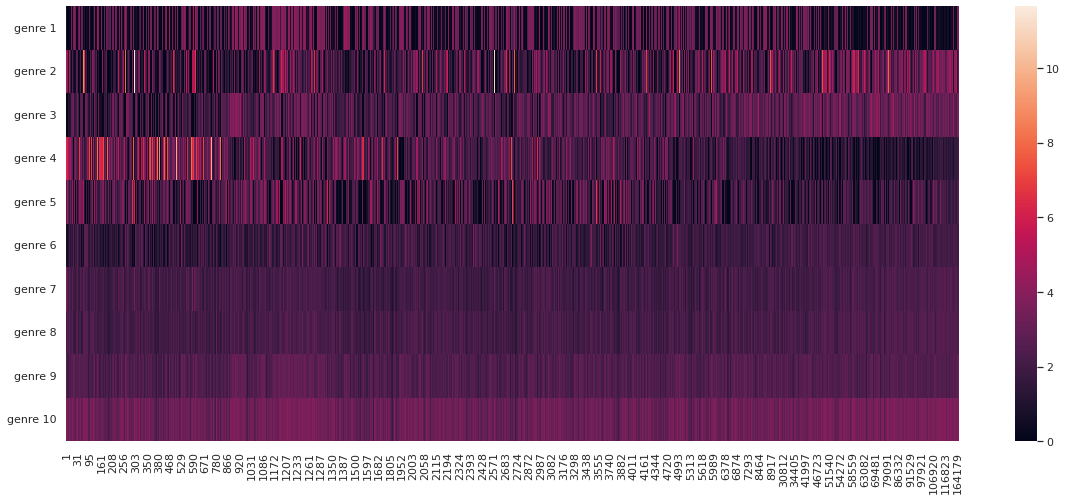

In [50]:
sns.set(rc={'figure.figsize':(20,8)})
sns.heatmap(Q, annot=False);

In [51]:
P = pd.DataFrame(nmf.transform(ratings_imp), columns=[f'genre {i+1}' for i in range(n_comps)], index=df_filter.index)
P

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


genre 1   genre 2   genre 3   genre 4   genre 5   genre 6   genre 7  \
userId                                                                         
1       0.171689  0.150658  0.183429  0.173233  0.176163  0.565098  0.370354   
2       0.146928  0.120283  0.209312  0.158471  0.177524  0.555079  0.369324   
3       0.150976  0.123492  0.197838  0.156753  0.143386  0.456439  0.470599   
4       0.173311  0.043613  0.150423  0.100767  0.110601  0.507701  0.655964   
5       0.154146  0.103169  0.172789  0.134075  0.190710  0.580302  0.414900   
...          ...       ...       ...       ...       ...       ...       ...   
606     0.165802  0.069118  0.118038  0.084795  0.186736  0.594033  0.538997   
607     0.150290  0.080752  0.159509  0.162054  0.174217  0.588952  0.441143   
608     0.132777  0.175541  0.306784  0.114333  0.183497  0.755387  0.000000   
609     0.146943  0.112498  0.197343  0.142977  0.182540  0.566347  0.390742   
610     0.193084  0.240838  0.220904  0.174231  0.147393  0.469907  0.300661   

         genre 8   genre 9  genre 10  
userId                                
1       0.004828  0.000000  0.000000  
2       0.000000  0.000000  0.000000  
3       0.009236  0.000000  0.000000  
4       0.000448  0.000000  0.000000  
5       0.000000  0.000000  0.000000  
...          ...       ...       ...  
606     0.000000  0.014104  0.000000  
607     0.000148  0.000000  0.003018  
608     0.000000  0.030048  0.000000  
609     0.000000  0.000000  0.000000  
610     0.032711  0.000000  0.000000  

[610 rows x 10 columns]

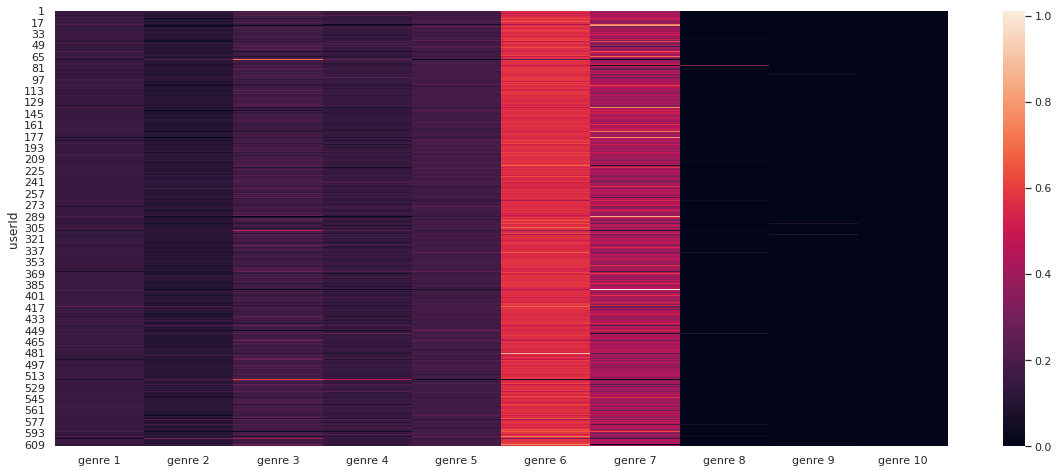

In [52]:
sns.set(rc={'figure.figsize':(20,8)})
sns.heatmap(P, annot=False);

In [53]:
#Reconstruct R by dotting P and Q (Though not necessary for prediction)
R_recon = P.dot(Q)
R_recon.head()

1         2         3         5         6         7         10      \
userId                                                                         
1       4.102845  3.679876  3.326482  3.171232  4.128661  3.306829  3.721624   
2       3.825508  3.460173  3.152309  3.073924  3.889248  3.195832  3.549242   
3       4.063767  3.520102  3.303685  3.096514  3.919321  3.208410  3.493410   
4       3.948971  3.179076  3.096444  3.035103  3.743871  3.126561  3.512831   
5       3.805662  3.436286  3.115219  3.052414  3.864530  3.185400  3.554647   

          11        16        17      ...    122920    122922    134130  \
userId                                ...                                 
1       3.833844  3.971408  3.744708  ...  3.754529  3.845169  4.056682   
2       3.729054  3.901349  3.689100  ...  3.628107  3.722835  4.017101   
3       3.665507  3.897409  3.556071  ...  3.617501  3.700458  3.932118   
4       3.733138  3.849032  3.830868  ...  3.529356  3.635624  4.111295   
5       3.716356  3.919528  3.739800  ...  3.605676  3.712745  4.014569   

          134853    139385    148626    152081    164179    166528    168252  
userId                                                                        
1       3.981285  4.032834  4.012099  4.054625  4.126822  4.044140  4.430543  
2       3.849999  3.901878  3.959103  3.891582  4.026736  3.962100  4.299397  
3       3.803178  3.891307  3.874042  3.880316  3.978678  3.905522  4.255222  
4       3.712129  3.885586  3.958937  3.807567  4.074658  3.923415  4.289041  
5       3.841480  3.902822  3.960969  3.879432  4.030011  3.938332  4.298250  

[5 rows x 1235 columns]

In [54]:
#Difference from the original ratings
nmf.reconstruction_err_

223.9492676100765

## Predict movies for a new user

In [55]:
new_user_ratings = {
    5: 4,
    17: 2,
    186: 5,
    1090: 1,
    122920: 3,    
}

In [56]:
new_dict = {}
for film in films:
    if film in new_user_ratings:
        new_dict[film] = new_user_ratings[film]
    else:
        new_dict[film] = np.nan
new_dict

{1: nan,
 2: nan,
 3: nan,
 5: 4,
 6: nan,
 7: nan,
 10: nan,
 11: nan,
 16: nan,
 17: 2,
 19: nan,
 21: nan,
 22: nan,
 24: nan,
 25: nan,
 29: nan,
 31: nan,
 32: nan,
 34: nan,
 36: nan,
 39: nan,
 44: nan,
 45: nan,
 47: nan,
 48: nan,
 50: nan,
 52: nan,
 58: nan,
 60: nan,
 62: nan,
 65: nan,
 70: nan,
 95: nan,
 101: nan,
 104: nan,
 105: nan,
 107: nan,
 110: nan,
 111: nan,
 112: nan,
 135: nan,
 141: nan,
 145: nan,
 150: nan,
 151: nan,
 153: nan,
 158: nan,
 160: nan,
 161: nan,
 163: nan,
 165: nan,
 168: nan,
 170: nan,
 172: nan,
 173: nan,
 180: nan,
 185: nan,
 186: 5,
 193: nan,
 196: nan,
 198: nan,
 203: nan,
 204: nan,
 207: nan,
 208: nan,
 215: nan,
 216: nan,
 223: nan,
 224: nan,
 225: nan,
 227: nan,
 230: nan,
 231: nan,
 235: nan,
 236: nan,
 237: nan,
 246: nan,
 247: nan,
 252: nan,
 253: nan,
 256: nan,
 260: nan,
 261: nan,
 262: nan,
 265: nan,
 266: nan,
 272: nan,
 273: nan,
 276: nan,
 277: nan,
 282: nan,
 288: nan,
 292: nan,
 293: nan,
 296: nan,


In [57]:
new_user_df = pd.DataFrame(new_dict, index=[0])
new_user_df.index = ["new_user"]
new_user_df

1       2       3       5       6       7       10      11      \
new_user     NaN     NaN     NaN       4     NaN     NaN     NaN     NaN   

          16      17      ...  122920  122922  134130  134853  139385  148626  \
new_user     NaN       2  ...       3     NaN     NaN     NaN     NaN     NaN   

          152081  164179  166528  168252  
new_user     NaN     NaN     NaN     NaN  

[1 rows x 1235 columns]

In [58]:
#Fill-in missing values as before
new_user_df = pd.DataFrame(imputer.transform(new_user_df), columns=films, index=new_user_df.index)
new_user_df

1         2         3       5         6         7         10      \
new_user  3.92093  3.431818  3.259615     4.0  3.946078  3.185185  3.496212   

            11        16      17      ...  122920    122922  134130    134853  \
new_user  3.671429  3.926829     2.0  ...     3.0  3.704545     4.0  3.813953   

            139385    148626    152081    164179    166528  168252  
new_user  3.903226  3.961538  3.890625  3.980769  3.925926    4.28  

[1 rows x 1235 columns]

In [59]:
#Calculate matrix P
P_new_user = pd.DataFrame(nmf.transform(new_user_df), index=new_user_df.index, columns=[f'genre {i+1}' for i in range(n_comps)])
P_new_user

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


genre 1   genre 2  genre 3   genre 4   genre 5   genre 6   genre 7  \
new_user  0.151214  0.110584  0.18682  0.150841  0.176653  0.561359  0.405009   

          genre 8  genre 9  genre 10  
new_user      0.0      0.0       0.0

In [60]:
#Create predictions
R_estimate = P_new_user.dot(Q)
R_estimate

1         2         3         5         6         7         10      \
new_user  3.86397  3.463802  3.171735  3.082721  3.894284  3.203978  3.554407   

            11        16        17      ...    122920    122922    134130  \
new_user  3.725856  3.900813  3.699141  ...  3.612125  3.714702  4.001995   

            134853    139385    148626    152081   164179    166528    168252  
new_user  3.838563  3.900605  3.951693  3.884915  4.02188  3.942388  4.290347  

[1 rows x 1235 columns]

In [61]:
#Remove already rated movies
R_estimate = R_estimate.drop(new_user_ratings.keys(), axis=1)
R_estimate

1         2         3         6         7         10        11      \
new_user  3.86397  3.463802  3.171735  3.894284  3.203978  3.554407  3.725856   

            16        19        21      ...    122918    122922    134130  \
new_user  3.900813  2.809474  3.460586  ...  3.942006  3.714702  4.001995   

            134853    139385    148626    152081   164179    166528    168252  
new_user  3.838563  3.900605  3.951693  3.884915  4.02188  3.942388  4.290347  

[1 rows x 1230 columns]

In [62]:
#Sort R_estimate in desceding order
R_estimate_sorted = R_estimate.T.sort_values("new_user", ascending=False)
R_estimate_sorted.head(3)

new_user
1196  4.521858
260   4.457529
1198  4.454236

## saving the model for later use

In [220]:
import pickle

In [221]:
filename = "nmf_model.sav"
pickle.dump(nmf, open(filename, "wb"))

# Defining a function for making recommendations using NMF

In [63]:
movies = pd.read_csv('./data/ml-latest-small/movies.csv', index_col=0)

In [82]:
def nmf_recommender(user_ratings_dict):
    
    '''This function gets a dictionary of {moviename: rate} from user and recommends n movies. To do that,
    it uses nmf model with 10 components which was trained on MovieLens-dataset.'''
    
    #How many movies to recommend
    n_recom = list(user_ratings_dict.items())[-1]
    n = int(n_recom[1])
    user_ratings_dict.popitem()
    #finding movieIds from the movienames
    user_dict = {}
    for key in user_ratings_dict:
        movieID = movies.index[movies['title']==key].astype(int)[0]
        user_dict[movieID] = user_ratings_dict[key]
    #completing the dictionary and adding all of unseen movies
    new_dict = {}
    for film in films:
        if film in user_dict:
            new_dict[film] = user_dict[film]
        else:
            new_dict[film] = np.nan
    #creating df
    user_df = pd.DataFrame(new_dict, index=[0])
    user_df.index = ["new_user"]
    #Fill-in missing values as before(with mean)
    user_df = pd.DataFrame(imputer.transform(user_df), columns=films, index=user_df.index)
    #Calculate matrix P
    P_user = pd.DataFrame(nmf.transform(user_df), index=user_df.index, columns=[f'genre {i+1}' for i in range(10)])
    #Create predictions
    R_estimate = P_user.dot(Q)
    #Remove already rated movies
    R_estimate = R_estimate.drop(user_dict.keys(), axis=1)
    #Sort R_estimate in desceding order
    R_estimate_sorted = R_estimate.T.sort_values("new_user", ascending=False)
    recom = R_estimate_sorted.head(n)
    #create a list of movieIds
    recom_movieid = recom.index.tolist()
    #finding movienames
    recommend = []
    for movieid in recom_movieid:
        recommend.append(movies.loc[movieid, 'title'])
    return recommend

In [83]:
new_user_ratings = {
    'Shawshank Redemption, The (1994)': 1,
    'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)': 5,
    'Philadelphia Story, The (1940)': 1,
    'How many movies do you want me to recommend:': 12
}

nmf_recommender(new_user_ratings)

/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


['Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'In the Name of the Father (1993)',
 'Hoop Dreams (1994)',
 'Logan (2017)',
 'Harold and Maude (1971)',
 'Glory (1989)',
 'Godfather, The (1972)',
 'Cool Hand Luke (1967)',
 'Manchurian Candidate, The (1962)',
 'Dark Knight, The (2008)']

# Neighbourhood based Collaborative Filtering

In [84]:
from sklearn.metrics.pairwise import cosine_similarity

In [90]:
cosim = pd.DataFrame(cosine_similarity(ratings_imp))
cosim.head()

0         1         2         3         4         5         6    \
0  1.000000  0.993985  0.989388  0.987257  0.993396  0.989674  0.988982   
1  0.993985  1.000000  0.994698  0.992103  0.998689  0.995070  0.994291   
2  0.989388  0.994698  1.000000  0.987355  0.993800  0.990856  0.989663   
3  0.987257  0.992103  0.987355  1.000000  0.991068  0.988493  0.988335   
4  0.993396  0.998689  0.993800  0.991068  1.000000  0.994401  0.993572   

        7         8         9    ...       600       601       602       603  \
0  0.993372  0.993922  0.988839  ...  0.993073  0.991539  0.975700  0.992721   
1  0.998458  0.999111  0.994091  ...  0.998422  0.996733  0.982637  0.998198   
2  0.993764  0.994564  0.989457  ...  0.993699  0.992090  0.978557  0.993652   
3  0.991612  0.991987  0.988717  ...  0.990935  0.990261  0.975365  0.991086   
4  0.997516  0.998406  0.993225  ...  0.997799  0.995884  0.982126  0.997405   

        604       605       606       607       608       609  
0  0.991185  0.988155  0.990107  0.977140  0.994150  0.988001  
1  0.997025  0.994027  0.995239  0.983719  0.999448  0.993668  
2  0.992430  0.988631  0.990777  0.979179  0.994822  0.989489  
3  0.990409  0.986589  0.988457  0.975615  0.992356  0.985881  
4  0.996083  0.993282  0.994586  0.982760  0.998842  0.992619  

[5 rows x 610 columns]

In [297]:
import random

In [318]:
class NeighbourhoodRecommender:
    
 
    def __init__(self, user_ratings):
        self.user_ratings = user_ratings
    
    def prepare_data(self):
        ratings= pd.read_csv('./data/ml-latest-small/ratings.csv', index_col=0)
        ratings= pd.pivot_table(ratings,
                    index='userId',
                    columns='movieId',
                    values='rating')
        ratings= ratings.loc[:, ratings.count()>20]
        mv = list(ratings.columns)
        random.shuffle(mv)
#         print(mv[:8])
        imputer = SimpleImputer(strategy="mean")
        ratings_imp = pd.DataFrame(imputer.fit_transform(ratings), columns=ratings.columns, index=ratings.index)
        movies = pd.read_csv('./data/ml-latest-small/movies.csv', index_col=0)
        return ratings, ratings_imp, movies, imputer
    
    def n_movie(self):
        n_recom = list(self.user_ratings.items())[-1]
        n = n_recom[1]
        return n
    
    def finding_movieIds(self):
        if 'How many movies do you want me to recommend:' in list(self.user_ratings.keys()):
            self.user_ratings.popitem()
        ratings, ratings_imp, movies, imputer = self.prepare_data()
        user_dict = {}
        for key in self.user_ratings:
            movieID = movies.index[movies['title']==key].astype(int)[0]
            user_dict[movieID] = self.user_ratings[key]
        return user_dict


    def get_all_movies(self):
        ratings, ratings_imp, movies, imputer = self.prepare_data()
        return ratings.columns   
    
    def populates_unseen_movies_to_user(self):
        user_dic = self.finding_movieIds()
        films = self.get_all_movies()
        
        new_dict = {}
        for film in films:
            if film in user_dic:
                new_dict[film] = user_dic[film]
            else:
                new_dict[film] = np.nan
        return new_dict
    
    def df_user(self):
        user_dict = self.populates_unseen_movies_to_user()
        user_df = pd.DataFrame(user_dict, index=[0])
        user_df.index = ["new_user"]        
        #Fill-in missing values as before(with mean)
        ratings, ratings_imp, movies, imputer = self.prepare_data()
        films = self.get_all_movies()
        user_df = pd.DataFrame(imputer.transform(user_df), columns=films, index=user_df.index)
        return user_df

    
    def recommend_movies(self):
        n = self.n_movie()
        ratings, ratings_imp, movies, imputer = self.prepare_data()
        user_dict = self.finding_movieIds()
        seen_movies = list(user_dict.keys())
        films = self.get_all_movies()
        unseen_movies = set(films).difference(set(seen_movies))
        user_df= self.df_user()
        
        predicted_ratings = []
        for movie in unseen_movies:
            # Capture the users who have watched the movie
            whatched_users = ratings[movie][ratings[movie].isna()==False].index
            # Go through each of these users who have watched the movie and calculate av. rating
            num = 0
            den = 0
            for user in whatched_users:
                # capture rating for this `user'
                user_rating = ratings.loc[user][movie]
                # Calculate the similarity between this user and the customer user
                similarity = cosine_similarity(np.array([ratings_imp.loc[user]]), np.array([user_df.loc["new_user"]]))
                num += user_rating * similarity
#                 print(similarity)
                den += similarity
            if den != 0:
                predicted_rating = num/den
            else:
                predicted_rating = 0
            predicted_ratings.append((movie, predicted_rating))

        predicted_rating_df = pd.DataFrame(predicted_ratings, columns=["movie", "rating"])
        predicted_rating_df.sort_values("rating", ascending=False)
        recom_df = predicted_rating_df.head(n)
        #create a list of movieIds
        recom_movieid = recom_df['movie'].tolist()
        #finding movienames
        recom_moviename = []
        for movieid in recom_movieid:
            recom_moviename.append(movies.loc[movieid, 'title'])        
        
        return recom_moviename

In [319]:
new_user_ratings = {
    'Shawshank Redemption, The (1994)':5,
    'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)': 2,
    'Philadelphia Story, The (1940)': 1,
    'In Bruges (2008)':5,
    'Unbreakable (2000)':4,
    'How many movies do you want me to recommend:': 12,
}


In [320]:
recommender = NeighbourhoodRecommender(new_user_ratings)

In [321]:
recommender.recommend_movies()

['Toy Story (1995)',
 'Jumanji (1995)',
 'Grumpier Old Men (1995)',
 'Mad Max: Fury Road (2015)',
 'Father of the Bride Part II (1995)',
 'Heat (1995)',
 'Sabrina (1995)',
 'Star Wars: Episode VII - The Force Awakens (2015)',
 'Evil Dead, The (1981)',
 'GoldenEye (1995)',
 'American President, The (1995)',
 'Fighter, The (2010)']

In [287]:
recommender.recommend_movies()

[[0.99383801]]
[[0.99833582]]
[[0.99408503]]
[[0.99466732]]
[[0.99856545]]
[[0.99712878]]
[[0.9872923]]
[[0.98987811]]
[[0.99598138]]
[[0.99810257]]
[[0.99815037]]
[[0.99660183]]
[[0.99714848]]
[[0.99447884]]
[[0.99854424]]
[[0.99190097]]
[[0.99832958]]
[[0.99401305]]
[[0.99892624]]
[[0.99266394]]
[[0.99252108]]
[[0.9935102]]
[[0.99595509]]
[[0.97470973]]
[[0.99807183]]
[[0.995759]]
[[0.99253705]]
[[0.99766807]]
[[0.99572655]]
[[0.99869825]]
[[0.98953042]]
[[0.99903363]]
[[0.98988954]]
[[0.99646468]]
[[0.99695271]]
[[0.99767812]]
[[0.9944862]]
[[0.99879575]]
[[0.99591198]]
[[0.99720034]]
[[0.9983794]]
[[0.9989463]]
[[0.99877486]]
[[0.99190974]]
[[0.9989746]]
[[0.99435707]]
[[0.99780967]]
[[0.99321969]]
[[0.99679456]]
[[0.99780109]]
[[0.99910889]]
[[0.99840764]]
[[0.98222495]]
[[0.9987308]]
[[0.99469397]]
[[0.99492177]]
[[0.97941024]]
[[0.99856174]]
[[0.99752559]]
[[0.99477261]]
[[0.99471631]]
[[0.99752474]]
[[0.98657697]]
[[0.99841471]]
[[0.99856093]]
[[0.98719144]]
[[0.99903333]]
[[0.

[[0.99748742]]
[[0.99119671]]
[[0.98268726]]
[[0.98048768]]
[[0.99357444]]
[[0.99466732]]
[[0.99712878]]
[[0.98987811]]
[[0.99877016]]
[[0.99714248]]
[[0.99499068]]
[[0.97470973]]
[[0.9944862]]
[[0.99855474]]
[[0.99443137]]
[[0.98788581]]
[[0.99879657]]
[[0.99899985]]
[[0.99740101]]
[[0.99724585]]
[[0.99645775]]
[[0.99520754]]
[[0.9989634]]
[[0.99828138]]
[[0.99649414]]
[[0.98013896]]
[[0.99003994]]
[[0.9960368]]
[[0.99895944]]
[[0.98574546]]
[[0.98715806]]
[[0.99895573]]
[[0.98504541]]
[[0.99786722]]
[[0.98640745]]
[[0.99560832]]
[[0.99218199]]
[[0.99483804]]
[[0.99432621]]
[[0.99643294]]
[[0.99305325]]
[[0.99874704]]
[[0.9960015]]
[[0.99644107]]
[[0.98268726]]
[[0.99322289]]
[[0.99252108]]
[[0.9935102]]
[[0.98988954]]
[[0.99387794]]
[[0.99033696]]
[[0.99003994]]
[[0.98500706]]
[[0.99719829]]
[[0.98781359]]
[[0.98715806]]
[[0.99187698]]
[[0.98504541]]
[[0.98752738]]
[[0.98652495]]
[[0.98627516]]
[[0.99900908]]
[[0.99883763]]
[[0.99305325]]
[[0.99191173]]
[[0.98268726]]
[[0.98352334]]


[[0.99494155]]
[[0.99886809]]
[[0.99435136]]
[[0.98500706]]
[[0.98415992]]
[[0.99654485]]
[[0.99844014]]
[[0.99602656]]
[[0.9941194]]
[[0.99537767]]
[[0.99576574]]
[[0.99841191]]
[[0.98715806]]
[[0.99723594]]
[[0.99709238]]
[[0.9988899]]
[[0.997245]]
[[0.99712476]]
[[0.98504541]]
[[0.99426061]]
[[0.99884377]]
[[0.99768613]]
[[0.98640745]]
[[0.99202994]]
[[0.99752429]]
[[0.98752738]]
[[0.99838325]]
[[0.98652495]]
[[0.98627516]]
[[0.99777016]]
[[0.9830915]]
[[0.99835407]]
[[0.99627123]]
[[0.99159086]]
[[0.99908895]]
[[0.99748742]]
[[0.99608981]]
[[0.99540815]]
[[0.99824202]]
[[0.99753102]]
[[0.99119671]]
[[0.98268726]]
[[0.99663576]]
[[0.98232823]]
[[0.98352334]]
[[0.99496991]]
[[0.9916733]]
[[0.99634932]]
[[0.9935102]]
[[0.98988954]]
[[0.9977621]]
[[0.9983794]]
[[0.99321969]]
[[0.97941024]]
[[0.9968658]]
[[0.98848101]]
[[0.99360461]]
[[0.99033696]]
[[0.99711112]]
[[0.98500706]]
[[0.99654485]]
[[0.99782645]]
[[0.99643916]]
[[0.99773888]]
[[0.9941194]]
[[0.99576574]]
[[0.99709238]]
[[0.99

[[0.99800332]]
[[0.9988899]]
[[0.99712476]]
[[0.99727051]]
[[0.98504541]]
[[0.99686269]]
[[0.99828674]]
[[0.99471521]]
[[0.99822995]]
[[0.99768613]]
[[0.99202994]]
[[0.99880945]]
[[0.99833436]]
[[0.99838325]]
[[0.98652495]]
[[0.99873892]]
[[0.99241904]]
[[0.98627516]]
[[0.99730884]]
[[0.9830915]]
[[0.9982913]]
[[0.99906918]]
[[0.995889]]
[[0.99665778]]
[[0.97238421]]
[[0.99483804]]
[[0.99561013]]
[[0.99432621]]
[[0.99777951]]
[[0.99643294]]
[[0.99305325]]
[[0.99843694]]
[[0.99908895]]
[[0.98900099]]
[[0.99718674]]
[[0.9974938]]
[[0.99056137]]
[[0.99546749]]
[[0.99564128]]
[[0.99644107]]
[[0.99119671]]
[[0.98048768]]
[[0.99663576]]
[[0.98232823]]
[[0.99803098]]
[[0.99514946]]
[[0.98352334]]
[[0.99833582]]
[[0.99496991]]
[[0.99826975]]
[[0.99712878]]
[[0.99815037]]
[[0.99660183]]
[[0.99854424]]
[[0.99038398]]
[[0.99634932]]
[[0.9935102]]
[[0.99858861]]
[[0.99693697]]
[[0.99903363]]
[[0.98988954]]
[[0.9944862]]
[[0.998073]]
[[0.99591198]]
[[0.99800659]]
[[0.99905329]]
[[0.99917895]]
[[0.9

[[0.98657697]]
[[0.99930881]]
[[0.99647666]]
[[0.99360461]]
[[0.99465086]]
[[0.99487609]]
[[0.99833994]]
[[0.99498402]]
[[0.9976365]]
[[0.99520754]]
[[0.99787862]]
[[0.99788407]]
[[0.99033696]]
[[0.99165756]]
[[0.9894982]]
[[0.98415992]]
[[0.99848352]]
[[0.9960368]]
[[0.99782645]]
[[0.99855626]]
[[0.99537767]]
[[0.98715806]]
[[0.99292869]]
[[0.99800332]]
[[0.99890163]]
[[0.98504541]]
[[0.99802795]]
[[0.99876386]]
[[0.99822995]]
[[0.99752059]]
[[0.99752429]]
[[0.99873892]]
[[0.98959271]]
[[0.9940079]]
[[0.9830915]]
[[0.995889]]
[[0.99483804]]
[[0.99561013]]
[[0.99432621]]
[[0.99777951]]
[[0.99643294]]
[[0.99843694]]
[[0.9974938]]
[[0.99546749]]
[[0.99376753]]
[[0.98352334]]
[[0.99383801]]
[[0.99833582]]
[[0.99496991]]
[[0.99408503]]
[[0.99836293]]
[[0.9984263]]
[[0.99856545]]
[[0.99712878]]
[[0.9982642]]
[[0.99877016]]
[[0.9892982]]
[[0.99878839]]
[[0.99815037]]
[[0.99660183]]
[[0.9987539]]
[[0.99721544]]
[[0.99681034]]
[[0.99010991]]
[[0.9916733]]
[[0.99190097]]
[[0.99832958]]
[[0.9989

[[0.99285525]]
[[0.99909712]]
[[0.9984466]]
[[0.99033696]]
[[0.99892006]]
[[0.99716636]]
[[0.9894982]]
[[0.99711112]]
[[0.99886809]]
[[0.99654485]]
[[0.99704482]]
[[0.99896208]]
[[0.99864689]]
[[0.99870468]]
[[0.9941194]]
[[0.99576574]]
[[0.99718654]]
[[0.98715806]]
[[0.99723594]]
[[0.99845751]]
[[0.99800332]]
[[0.99828357]]
[[0.98504541]]
[[0.99686269]]
[[0.98982569]]
[[0.99471521]]
[[0.99732856]]
[[0.99426061]]
[[0.99768613]]
[[0.98640745]]
[[0.99876647]]
[[0.99752429]]
[[0.99829966]]
[[0.99838325]]
[[0.98627516]]
[[0.99777016]]
[[0.9830915]]
[[0.99631045]]
[[0.99835407]]
[[0.99917793]]
[[0.99627123]]
[[0.99876646]]
[[0.99734861]]
[[0.99887305]]
[[0.99602664]]
[[0.99777951]]
[[0.99718674]]
[[0.99753102]]
[[0.98268726]]
[[0.99663576]]
[[0.99803098]]
[[0.98352334]]
[[0.99322289]]
[[0.99383801]]
[[0.9944862]]
[[0.99650655]]
[[0.99520754]]
[[0.99704575]]
[[0.99033696]]
[[0.99278977]]
[[0.99165756]]
[[0.98500706]]
[[0.98781359]]
[[0.99602656]]
[[0.98504541]]
[[0.98640745]]
[[0.99895422]]


[[0.98500706]]
[[0.98574546]]
[[0.99573072]]
[[0.99779111]]
[[0.99746415]]
[[0.99602656]]
[[0.9958435]]
[[0.99586081]]
[[0.99718654]]
[[0.98715806]]
[[0.99292869]]
[[0.99084294]]
[[0.99761722]]
[[0.98504541]]
[[0.99452261]]
[[0.99471521]]
[[0.99426061]]
[[0.98640745]]
[[0.99865599]]
[[0.98752738]]
[[0.98627516]]
[[0.98959271]]
[[0.99833135]]
[[0.9830915]]
[[0.99665778]]
[[0.97238421]]
[[0.99625469]]
[[0.99539182]]
[[0.99483804]]
[[0.99432621]]
[[0.99665302]]
[[0.99643294]]
[[0.99305325]]
[[0.99718674]]
[[0.99191173]]
[[0.99056137]]
[[0.99874704]]
[[0.99320747]]
[[0.99564128]]
[[0.99644107]]
[[0.98268726]]
[[0.99838716]]
[[0.99322289]]
[[0.99712878]]
[[0.99877016]]
[[0.99010991]]
[[0.99519369]]
[[0.99933188]]
[[0.99401305]]
[[0.99499068]]
[[0.97470973]]
[[0.99720034]]
[[0.99443137]]
[[0.99589853]]
[[0.99679456]]
[[0.99645775]]
[[0.99520754]]
[[0.99649414]]
[[0.99652024]]
[[0.98013896]]
[[0.99003994]]
[[0.99895944]]
[[0.99698303]]
[[0.99395554]]
[[0.99614245]]
[[0.98504541]]
[[0.98640745

[[0.9830915]]
[[0.99218199]]
[[0.9989714]]
[[0.99191173]]
[[0.99056137]]
[[0.99863425]]
[[0.98268726]]
[[0.98048768]]
[[0.98232823]]
[[0.99357444]]
[[0.98352334]]
[[0.99496991]]
[[0.99712878]]
[[0.98987811]]
[[0.9892982]]
[[0.99504474]]
[[0.99572655]]
[[0.9977621]]
[[0.98983833]]
[[0.99584144]]
[[0.99852895]]
[[0.9968658]]
[[0.99387794]]
[[0.99360461]]
[[0.99465086]]
[[0.9976365]]
[[0.99673767]]
[[0.99520754]]
[[0.99285525]]
[[0.99033696]]
[[0.99716636]]
[[0.99003994]]
[[0.98500706]]
[[0.9960368]]
[[0.99704482]]
[[0.99881196]]
[[0.99773888]]
[[0.99586081]]
[[0.98715806]]
[[0.99828357]]
[[0.98504541]]
[[0.99686269]]
[[0.98982569]]
[[0.99822995]]
[[0.99426061]]
[[0.99752059]]
[[0.98640745]]
[[0.99202994]]
[[0.98959271]]
[[0.99218199]]
[[0.99512]]
[[0.9989714]]
[[0.99159086]]
[[0.99777951]]
[[0.99305325]]
[[0.99753102]]
[[0.99376753]]
[[0.99119671]]
[[0.98268726]]
[[0.98048768]]
[[0.98232823]]
[[0.98352334]]
[[0.99833582]]
[[0.99496991]]
[[0.99408503]]
[[0.99836293]]
[[0.99826975]]
[[0.99

[[0.99546749]]
[[0.99753102]]
[[0.99376753]]
[[0.98268726]]
[[0.98048768]]
[[0.99663576]]
[[0.98352334]]
[[0.99496991]]
[[0.9872923]]
[[0.9892982]]
[[0.99660183]]
[[0.99721544]]
[[0.9916733]]
[[0.99447884]]
[[0.99832958]]
[[0.99892624]]
[[0.9985945]]
[[0.99634932]]
[[0.99788652]]
[[0.99483241]]
[[0.99693697]]
[[0.98988954]]
[[0.99786746]]
[[0.9977621]]
[[0.99878722]]
[[0.99879575]]
[[0.998073]]
[[0.99591198]]
[[0.99562809]]
[[0.99800659]]
[[0.9983794]]
[[0.9975454]]
[[0.99877486]]
[[0.9989746]]
[[0.99435707]]
[[0.99584144]]
[[0.99321969]]
[[0.99905329]]
[[0.99910889]]
[[0.99870595]]
[[0.99730798]]
[[0.99856549]]
[[0.98657697]]
[[0.99841471]]
[[0.99856093]]
[[0.9968658]]
[[0.98719144]]
[[0.99681844]]
[[0.99593298]]
[[0.99271662]]
[[0.99644665]]
[[0.99833994]]
[[0.99498402]]
[[0.99883062]]
[[0.9976365]]
[[0.9894982]]
[[0.99263706]]
[[0.99711112]]
[[0.98415992]]
[[0.99654485]]
[[0.99844014]]
[[0.99782645]]
[[0.99880881]]
[[0.99881196]]
[[0.99773888]]
[[0.9941194]]
[[0.99537767]]
[[0.99887

[[0.98719144]]
[[0.99312721]]
[[0.98848101]]
[[0.99880083]]
[[0.98993937]]
[[0.99487609]]
[[0.99498402]]
[[0.9976365]]
[[0.99614986]]
[[0.99033696]]
[[0.99716636]]
[[0.99711112]]
[[0.99435136]]
[[0.98781359]]
[[0.99654485]]
[[0.99782645]]
[[0.99773888]]
[[0.9941194]]
[[0.98715806]]
[[0.99723594]]
[[0.99709238]]
[[0.99800332]]
[[0.9988899]]
[[0.98504541]]
[[0.99686269]]
[[0.99870544]]
[[0.99768613]]
[[0.98640745]]
[[0.98627516]]
[[0.98959271]]
[[0.9830915]]
[[0.99627123]]
[[0.99159086]]
[[0.99056137]]
[[0.98268726]]
[[0.98048768]]
[[0.99663576]]
[[0.98232823]]
[[0.99803098]]
[[0.99357444]]
[[0.98352334]]
[[0.9872923]]
[[0.99714848]]
[[0.9916733]]
[[0.99447884]]
[[0.99190097]]
[[0.99832958]]
[[0.9985945]]
[[0.99634932]]
[[0.9991226]]
[[0.97470973]]
[[0.99611886]]
[[0.98988954]]
[[0.99646468]]
[[0.99878722]]
[[0.998073]]
[[0.99720034]]
[[0.9989746]]
[[0.99584144]]
[[0.9967452]]
[[0.97941024]]
[[0.99477261]]
[[0.98719144]]
[[0.98848101]]
[[0.98993937]]
[[0.99645722]]
[[0.99498402]]
[[0.997

[[0.99218199]]
[[0.995889]]
[[0.97238421]]
[[0.99483804]]
[[0.99432621]]
[[0.98900099]]
[[0.99864227]]
[[0.9960015]]
[[0.99644107]]
[[0.99815037]]
[[0.99721544]]
[[0.99714848]]
[[0.99832463]]
[[0.99634932]]
[[0.97470973]]
[[0.98983833]]
[[0.99870595]]
[[0.99912724]]
[[0.98500706]]
[[0.99654485]]
[[0.99782645]]
[[0.99602656]]
[[0.99822995]]
[[0.9940079]]
[[0.99734861]]
[[0.99159086]]
[[0.99748742]]
[[0.99546749]]
[[0.98268726]]
[[0.98048768]]
[[0.98352334]]
[[0.99496991]]
[[0.9984263]]
[[0.9977621]]
[[0.99878722]]
[[0.99800659]]
[[0.99584144]]
[[0.97941024]]
[[0.98848101]]
[[0.99498402]]
[[0.99614986]]
[[0.9960368]]
[[0.99773888]]
[[0.98715806]]
[[0.99709238]]
[[0.9982701]]
[[0.99828357]]
[[0.9988899]]
[[0.99712476]]
[[0.99802795]]
[[0.99822995]]
[[0.99627123]]
[[0.99777951]]
[[0.99305325]]
[[0.99612194]]
[[0.99546749]]
[[0.99824202]]
[[0.99753102]]
[[0.99376753]]
[[0.99663576]]
[[0.99514946]]
[[0.99451358]]
[[0.99877016]]
[[0.99190097]]
[[0.99252108]]
[[0.97470973]]
[[0.99830581]]
[[0.

[[0.98640745]]
[[0.98652495]]
[[0.99241904]]
[[0.9940079]]
[[0.99218199]]
[[0.9982913]]
[[0.9963371]]
[[0.99512]]
[[0.99159086]]
[[0.99305325]]
[[0.99864227]]
[[0.99320747]]
[[0.98268726]]
[[0.98048768]]
[[0.98352334]]
[[0.99383801]]
[[0.99899405]]
[[0.99712878]]
[[0.9872923]]
[[0.99660183]]
[[0.99721544]]
[[0.99714848]]
[[0.9916733]]
[[0.99190097]]
[[0.99634932]]
[[0.9935102]]
[[0.99595509]]
[[0.97470973]]
[[0.99693697]]
[[0.99891738]]
[[0.98988954]]
[[0.9971047]]
[[0.99854062]]
[[0.99878722]]
[[0.998073]]
[[0.99591198]]
[[0.99589853]]
[[0.99853828]]
[[0.99435707]]
[[0.99780109]]
[[0.99469397]]
[[0.99477261]]
[[0.98657697]]
[[0.98719144]]
[[0.99903333]]
[[0.99387794]]
[[0.99681844]]
[[0.99271662]]
[[0.99821139]]
[[0.98848101]]
[[0.98993937]]
[[0.9947118]]
[[0.99805061]]
[[0.99360461]]
[[0.99833994]]
[[0.99645775]]
[[0.99515363]]
[[0.99715554]]
[[0.99285525]]
[[0.99798917]]
[[0.99033696]]
[[0.99716636]]
[[0.99165756]]
[[0.98013896]]
[[0.99003994]]
[[0.98500706]]
[[0.98415992]]
[[0.9878

[[0.99575177]]
[[0.99732856]]
[[0.98752738]]
[[0.98652495]]
[[0.99676895]]
[[0.9830915]]
[[0.98048768]]
[[0.9892982]]
[[0.9935102]]
[[0.97470973]]
[[0.99559584]]
[[0.99443137]]
[[0.97941024]]
[[0.98719144]]
[[0.98993937]]
[[0.99645722]]
[[0.99465086]]
[[0.99520754]]
[[0.99614986]]
[[0.99033696]]
[[0.9894982]]
[[0.98013896]]
[[0.98715806]]
[[0.99292869]]
[[0.98504541]]
[[0.99426061]]
[[0.98640745]]
[[0.99560832]]
[[0.99241904]]
[[0.98627516]]
[[0.98959271]]
[[0.99643294]]
[[0.98352334]]
[[0.99322289]]
[[0.99451358]]
[[0.9892982]]
[[0.99038398]]
[[0.99252108]]
[[0.97470973]]
[[0.99572655]]
[[0.99559584]]
[[0.99720034]]
[[0.98719144]]
[[0.99593298]]
[[0.99271662]]
[[0.98993937]]
[[0.99360461]]
[[0.99465086]]
[[0.99520754]]
[[0.99614986]]
[[0.99033696]]
[[0.9894982]]
[[0.98013896]]
[[0.99746415]]
[[0.98715806]]
[[0.99084294]]
[[0.99761722]]
[[0.98504541]]
[[0.99554807]]
[[0.99426061]]
[[0.98640745]]
[[0.99202994]]
[[0.98959271]]
[[0.9940237]]
[[0.99320747]]
[[0.98268726]]
[[0.98352334]]
[[

[[0.99892332]]
[[0.99881196]]
[[0.99773888]]
[[0.99602656]]
[[0.9941194]]
[[0.99576574]]
[[0.99723594]]
[[0.9988899]]
[[0.99712476]]
[[0.98504541]]
[[0.99802795]]
[[0.99884377]]
[[0.99768613]]
[[0.99752059]]
[[0.99880945]]
[[0.99752429]]
[[0.99681231]]
[[0.9986137]]
[[0.99838325]]
[[0.98652495]]
[[0.99884454]]
[[0.98959271]]
[[0.99777016]]
[[0.9830915]]
[[0.99906918]]
[[0.99905919]]
[[0.99748742]]
[[0.98048768]]
[[0.99663576]]
[[0.99357444]]
[[0.9916733]]
[[0.99190974]]
[[0.98719144]]
[[0.99633547]]
[[0.99650655]]
[[0.99515363]]
[[0.99278977]]
[[0.99003994]]
[[0.98500706]]
[[0.99643916]]
[[0.99602656]]
[[0.9958435]]
[[0.99823688]]
[[0.99000746]]
[[0.98504541]]
[[0.99575177]]
[[0.99920308]]
[[0.996353]]
[[0.98640745]]
[[0.98752738]]
[[0.98652495]]
[[0.98627516]]
[[0.98959271]]
[[0.9830915]]
[[0.99900328]]
[[0.99665778]]
[[0.99911601]]
[[0.97238421]]
[[0.99320747]]
[[0.98268726]]
[[0.98048768]]
[[0.99357444]]
[[0.99451358]]
[[0.99504474]]
[[0.9916733]]
[[0.99499068]]
[[0.97470973]]
[[0.9

[[0.99734861]]
[[0.99643294]]
[[0.99546749]]
[[0.99824202]]
[[0.99119671]]
[[0.98268726]]
[[0.99663576]]
[[0.98232823]]
[[0.99803098]]
[[0.99357444]]
[[0.98352334]]
[[0.99922169]]
[[0.99496991]]
[[0.99836293]]
[[0.99826975]]
[[0.99873322]]
[[0.99721544]]
[[0.99714848]]
[[0.9916733]]
[[0.99447884]]
[[0.99190097]]
[[0.99832958]]
[[0.9985945]]
[[0.99634932]]
[[0.97470973]]
[[0.98988954]]
[[0.99786746]]
[[0.9977621]]
[[0.99879575]]
[[0.99591198]]
[[0.99800659]]
[[0.9983794]]
[[0.99443137]]
[[0.9975454]]
[[0.99765536]]
[[0.99877486]]
[[0.99435707]]
[[0.99584144]]
[[0.99321969]]
[[0.99905329]]
[[0.99910889]]
[[0.99852895]]
[[0.99870595]]
[[0.99730798]]
[[0.99856549]]
[[0.99856093]]
[[0.99681844]]
[[0.99869454]]
[[0.98848101]]
[[0.98993937]]
[[0.9955987]]
[[0.99498402]]
[[0.99883062]]
[[0.99673767]]
[[0.99700525]]
[[0.99033696]]
[[0.99711112]]
[[0.99494155]]
[[0.98500706]]
[[0.98415992]]
[[0.99502809]]
[[0.99844014]]
[[0.9927738]]
[[0.99880881]]
[[0.99892332]]
[[0.99773888]]
[[0.9941194]]
[[0

[[0.99714848]]
[[0.99447884]]
[[0.99832958]]
[[0.99634932]]
[[0.99693697]]
[[0.998073]]
[[0.99591198]]
[[0.99800659]]
[[0.9983794]]
[[0.9975454]]
[[0.99877486]]
[[0.99853828]]
[[0.99435707]]
[[0.99584144]]
[[0.99910889]]
[[0.99469397]]
[[0.99852895]]
[[0.99730798]]
[[0.99856093]]
[[0.99681844]]
[[0.99593298]]
[[0.99271662]]
[[0.99644665]]
[[0.99877031]]
[[0.99833994]]
[[0.99883062]]
[[0.99787862]]
[[0.99715554]]
[[0.99278977]]
[[0.99755556]]
[[0.99003994]]
[[0.9960368]]
[[0.99782645]]
[[0.99643916]]
[[0.9927738]]
[[0.9958435]]
[[0.99537767]]
[[0.99576574]]
[[0.99709238]]
[[0.99187698]]
[[0.99000746]]
[[0.99712476]]
[[0.99727051]]
[[0.98504541]]
[[0.99802795]]
[[0.99732856]]
[[0.99884377]]
[[0.99768613]]
[[0.98640745]]
[[0.99202994]]
[[0.99880945]]
[[0.99752429]]
[[0.98752738]]
[[0.9986137]]
[[0.99838325]]
[[0.98652495]]
[[0.99873892]]
[[0.98627516]]
[[0.99831753]]
[[0.9982913]]
[[0.99854388]]
[[0.99902577]]
[[0.99764122]]
[[0.99908895]]
[[0.99748742]]
[[0.99608981]]
[[0.9988754]]
[[0.9

[[0.98961685]]
[[0.99435136]]
[[0.99719829]]
[[0.99654485]]
[[0.99782645]]
[[0.99643916]]
[[0.99880881]]
[[0.99614245]]
[[0.99887964]]
[[0.98715806]]
[[0.99709238]]
[[0.99000746]]
[[0.99800332]]
[[0.99828357]]
[[0.99712476]]
[[0.98504541]]
[[0.99802795]]
[[0.99828674]]
[[0.99732856]]
[[0.99426061]]
[[0.99768613]]
[[0.99752059]]
[[0.98640745]]
[[0.99880945]]
[[0.99833436]]
[[0.99752429]]
[[0.99829966]]
[[0.99282349]]
[[0.99838325]]
[[0.98652495]]
[[0.99560832]]
[[0.99873892]]
[[0.99241904]]
[[0.99701955]]
[[0.99831753]]
[[0.99777016]]
[[0.99625469]]
[[0.99539182]]
[[0.99627123]]
[[0.99561013]]
[[0.99902577]]
[[0.99764122]]
[[0.99734861]]
[[0.99602664]]
[[0.99159086]]
[[0.99777951]]
[[0.99305325]]
[[0.99748742]]
[[0.9988643]]
[[0.99718674]]
[[0.9988754]]
[[0.99714137]]
[[0.99056137]]
[[0.99546749]]
[[0.99540815]]
[[0.99320747]]
[[0.99753102]]
[[0.99376753]]
[[0.99644107]]
[[0.98268726]]
[[0.98048768]]
[[0.99663576]]
[[0.99803098]]
[[0.98352334]]
[[0.99922169]]
[[0.99383801]]
[[0.99904294

[[0.99576574]]
[[0.99887964]]
[[0.99841703]]
[[0.99718654]]
[[0.99833313]]
[[0.99841191]]
[[0.98715806]]
[[0.99292869]]
[[0.99823688]]
[[0.99723594]]
[[0.99187698]]
[[0.99868676]]
[[0.99761722]]
[[0.99712476]]
[[0.98504541]]
[[0.99883508]]
[[0.99686269]]
[[0.98982569]]
[[0.99452261]]
[[0.99471521]]
[[0.99822995]]
[[0.99426061]]
[[0.99884377]]
[[0.99752059]]
[[0.98640745]]
[[0.99202994]]
[[0.99880945]]
[[0.99752429]]
[[0.99681231]]
[[0.9986137]]
[[0.99838325]]
[[0.98652495]]
[[0.99241904]]
[[0.98627516]]
[[0.98959271]]
[[0.99777016]]
[[0.9830915]]
[[0.99883827]]
[[0.99218199]]
[[0.9982913]]
[[0.995889]]
[[0.99854388]]
[[0.97238421]]
[[0.99625469]]
[[0.99627123]]
[[0.99432621]]
[[0.99734861]]
[[0.99581826]]
[[0.99159086]]
[[0.99843642]]
[[0.99777951]]
[[0.99643294]]
[[0.99908895]]
[[0.9988643]]
[[0.9988754]]
[[0.99546749]]
[[0.99540815]]
[[0.99824202]]
[[0.99320747]]
[[0.99753102]]
[[0.99564128]]
[[0.98268726]]
[[0.98048768]]
[[0.99663576]]
[[0.99803098]]
[[0.98352334]]
[[0.99322289]]
[[

[[0.99465086]]
[[0.99756697]]
[[0.99833994]]
[[0.99872355]]
[[0.9955987]]
[[0.99498402]]
[[0.9976365]]
[[0.99673767]]
[[0.99621875]]
[[0.99645775]]
[[0.99520754]]
[[0.99899179]]
[[0.99801106]]
[[0.99829611]]
[[0.99715554]]
[[0.99788407]]
[[0.99285525]]
[[0.99528876]]
[[0.99033696]]
[[0.99278977]]
[[0.99783265]]
[[0.99649414]]
[[0.99726336]]
[[0.99652024]]
[[0.9982818]]
[[0.99716636]]
[[0.99738309]]
[[0.9894982]]
[[0.99263706]]
[[0.98961685]]
[[0.99865599]]
[[0.98013896]]
[[0.99896563]]
[[0.99494155]]
[[0.99435136]]
[[0.99003994]]
[[0.98500706]]
[[0.98415992]]
[[0.99719829]]
[[0.99654485]]
[[0.99502809]]
[[0.9960368]]
[[0.99895944]]
[[0.99844014]]
[[0.99604631]]
[[0.99782645]]
[[0.99643916]]
[[0.99698303]]
[[0.99789714]]
[[0.98574546]]
[[0.9927738]]
[[0.99700986]]
[[0.99779111]]
[[0.99881861]]
[[0.99840576]]
[[0.99395554]]
[[0.99880881]]
[[0.99884961]]
[[0.99580052]]
[[0.99892332]]
[[0.99881196]]
[[0.99861625]]
[[0.99614245]]
[[0.99746415]]
[[0.99602656]]
[[0.9958435]]
[[0.99586081]]
[[

[[0.9941194]]
[[0.99739925]]
[[0.99576574]]
[[0.99841191]]
[[0.98715806]]
[[0.99292869]]
[[0.99723594]]
[[0.99709238]]
[[0.99187698]]
[[0.99868676]]
[[0.99800332]]
[[0.9988899]]
[[0.99712476]]
[[0.98504541]]
[[0.99524737]]
[[0.9968456]]
[[0.99686269]]
[[0.99452261]]
[[0.99471521]]
[[0.99822995]]
[[0.99426061]]
[[0.99884377]]
[[0.99768613]]
[[0.99752059]]
[[0.98640745]]
[[0.99202994]]
[[0.99880945]]
[[0.99752429]]
[[0.99681231]]
[[0.99282349]]
[[0.99838325]]
[[0.98652495]]
[[0.99560832]]
[[0.99241904]]
[[0.98627516]]
[[0.98959271]]
[[0.9940079]]
[[0.9830915]]
[[0.99761283]]
[[0.99768376]]
[[0.99883827]]
[[0.995889]]
[[0.99854388]]
[[0.97238421]]
[[0.99539182]]
[[0.99776545]]
[[0.99627123]]
[[0.99483804]]
[[0.99432621]]
[[0.99805137]]
[[0.99734861]]
[[0.99159086]]
[[0.9984473]]
[[0.99777951]]
[[0.99643294]]
[[0.99305325]]
[[0.99908895]]
[[0.99748742]]
[[0.99718674]]
[[0.99191173]]
[[0.9974938]]
[[0.99056137]]
[[0.99546749]]
[[0.99824202]]
[[0.99320747]]
[[0.99753102]]
[[0.99376753]]
[[0.

[[0.99877486]]
[[0.99853828]]
[[0.9989746]]
[[0.99435707]]
[[0.99584144]]
[[0.99321969]]
[[0.99905329]]
[[0.99780109]]
[[0.99910889]]
[[0.99856174]]
[[0.99752474]]
[[0.99730798]]
[[0.99856549]]
[[0.98657697]]
[[0.99841471]]
[[0.99856093]]
[[0.9968658]]
[[0.98719144]]
[[0.99832693]]
[[0.99633547]]
[[0.99387794]]
[[0.99681844]]
[[0.99869454]]
[[0.99271662]]
[[0.99627314]]
[[0.99889942]]
[[0.98848101]]
[[0.98993937]]
[[0.9947118]]
[[0.99805061]]
[[0.99877031]]
[[0.99158524]]
[[0.99833994]]
[[0.9955987]]
[[0.99498402]]
[[0.99883062]]
[[0.9976365]]
[[0.99673767]]
[[0.99520754]]
[[0.99801106]]
[[0.99787862]]
[[0.99715554]]
[[0.99033696]]
[[0.99716636]]
[[0.9894982]]
[[0.99263706]]
[[0.99435136]]
[[0.99003994]]
[[0.98781359]]
[[0.99654485]]
[[0.99844014]]
[[0.99643916]]
[[0.9927738]]
[[0.99881861]]
[[0.99884961]]
[[0.99580052]]
[[0.99892332]]
[[0.99773888]]
[[0.99746415]]
[[0.99602656]]
[[0.9941194]]
[[0.99739925]]
[[0.99537767]]
[[0.99887964]]
[[0.99718654]]
[[0.99841191]]
[[0.98715806]]
[[0

[[0.99777951]]
[[0.99748742]]
[[0.99540815]]
[[0.99753102]]
[[0.98268726]]
[[0.99663576]]
[[0.99803098]]
[[0.98352334]]
[[0.99496991]]
[[0.99826975]]
[[0.99809192]]
[[0.9872923]]
[[0.99924718]]
[[0.99721544]]
[[0.99714848]]
[[0.9916733]]
[[0.99447884]]
[[0.99832958]]
[[0.9985945]]
[[0.99266394]]
[[0.97470973]]
[[0.98988954]]
[[0.99646468]]
[[0.99786746]]
[[0.99695271]]
[[0.9977621]]
[[0.99878722]]
[[0.99879575]]
[[0.99591198]]
[[0.99800659]]
[[0.99720034]]
[[0.9983794]]
[[0.9975454]]
[[0.99877486]]
[[0.9989746]]
[[0.99584144]]
[[0.99321969]]
[[0.99905329]]
[[0.99780109]]
[[0.99910889]]
[[0.97941024]]
[[0.99752559]]
[[0.99856549]]
[[0.99856093]]
[[0.99593298]]
[[0.98848101]]
[[0.98993937]]
[[0.99877031]]
[[0.99833994]]
[[0.99498402]]
[[0.99883062]]
[[0.9976365]]
[[0.99520754]]
[[0.99716636]]
[[0.99263706]]
[[0.98961685]]
[[0.98500706]]
[[0.98415992]]
[[0.99654485]]
[[0.99892332]]
[[0.99881196]]
[[0.99773888]]
[[0.9941194]]
[[0.99576574]]
[[0.99887964]]
[[0.99841191]]
[[0.98715806]]
[[0.

[[0.97470973]]
[[0.99572655]]
[[0.99693697]]
[[0.98988954]]
[[0.99695271]]
[[0.99878722]]
[[0.998073]]
[[0.99591198]]
[[0.99800659]]
[[0.9983794]]
[[0.9975454]]
[[0.99853828]]
[[0.9989746]]
[[0.99584144]]
[[0.99321969]]
[[0.99870595]]
[[0.99730798]]
[[0.99856549]]
[[0.98657697]]
[[0.99841471]]
[[0.99856093]]
[[0.9968658]]
[[0.99869454]]
[[0.99877031]]
[[0.99833994]]
[[0.9955987]]
[[0.99498402]]
[[0.99883062]]
[[0.99528876]]
[[0.99738309]]
[[0.99711112]]
[[0.99494155]]
[[0.98500706]]
[[0.98415992]]
[[0.99844014]]
[[0.99782645]]
[[0.9927738]]
[[0.99704482]]
[[0.99395554]]
[[0.99880881]]
[[0.99814133]]
[[0.99892332]]
[[0.99773888]]
[[0.99746415]]
[[0.99602656]]
[[0.9941194]]
[[0.99718654]]
[[0.99841191]]
[[0.99717467]]
[[0.99000746]]
[[0.99868676]]
[[0.9988899]]
[[0.99712476]]
[[0.98504541]]
[[0.99822995]]
[[0.99732856]]
[[0.99884377]]
[[0.99768613]]
[[0.99752059]]
[[0.98640745]]
[[0.99880945]]
[[0.99752429]]
[[0.99829966]]
[[0.99282349]]
[[0.99838325]]
[[0.98652495]]
[[0.99873892]]
[[0.9

[[0.99305325]]
[[0.99612194]]
[[0.99191173]]
[[0.99056137]]
[[0.9960015]]
[[0.99320747]]
[[0.99644107]]
[[0.98268726]]
[[0.98048768]]
[[0.98352334]]
[[0.99322289]]
[[0.99833582]]
[[0.99496991]]
[[0.99826975]]
[[0.9872923]]
[[0.9892982]]
[[0.99190097]]
[[0.99266394]]
[[0.99634932]]
[[0.99693697]]
[[0.98988954]]
[[0.99878722]]
[[0.998073]]
[[0.99800659]]
[[0.9983794]]
[[0.99853828]]
[[0.99321969]]
[[0.99905329]]
[[0.99730798]]
[[0.9968658]]
[[0.98719144]]
[[0.99832693]]
[[0.99644665]]
[[0.98848101]]
[[0.99877031]]
[[0.99833994]]
[[0.9955987]]
[[0.99285525]]
[[0.99278977]]
[[0.99716636]]
[[0.99889621]]
[[0.9894982]]
[[0.99755556]]
[[0.99263706]]
[[0.99435136]]
[[0.99003994]]
[[0.98781359]]
[[0.99654485]]
[[0.99782645]]
[[0.99643916]]
[[0.9958435]]
[[0.9941194]]
[[0.99537767]]
[[0.99709238]]
[[0.99828357]]
[[0.9988899]]
[[0.99712476]]
[[0.98504541]]
[[0.99822995]]
[[0.99752059]]
[[0.98640745]]
[[0.99876647]]
[[0.99752429]]
[[0.99829966]]
[[0.99282349]]
[[0.98652495]]
[[0.99873892]]
[[0.986

[[0.99764601]]
[[0.99576574]]
[[0.99841703]]
[[0.99841191]]
[[0.98715806]]
[[0.99292869]]
[[0.99723594]]
[[0.99187698]]
[[0.99000746]]
[[0.99800332]]
[[0.99828357]]
[[0.9988899]]
[[0.99712476]]
[[0.98504541]]
[[0.99524737]]
[[0.9968456]]
[[0.99686269]]
[[0.99554807]]
[[0.98982569]]
[[0.99452261]]
[[0.99471521]]
[[0.99822995]]
[[0.99426061]]
[[0.99884377]]
[[0.99768613]]
[[0.99752059]]
[[0.98640745]]
[[0.99880945]]
[[0.99752429]]
[[0.98752738]]
[[0.99838325]]
[[0.98652495]]
[[0.99873892]]
[[0.99241904]]
[[0.98627516]]
[[0.98959271]]
[[0.9940079]]
[[0.9830915]]
[[0.99780165]]
[[0.99854388]]
[[0.97238421]]
[[0.99483804]]
[[0.99902577]]
[[0.99432621]]
[[0.99764122]]
[[0.9940237]]
[[0.99159086]]
[[0.99777951]]
[[0.99643294]]
[[0.99757088]]
[[0.99748742]]
[[0.99191173]]
[[0.9974938]]
[[0.99546749]]
[[0.99540815]]
[[0.99320747]]
[[0.99753102]]
[[0.99564128]]
[[0.99119671]]
[[0.98268726]]
[[0.98048768]]
[[0.99663576]]
[[0.99357444]]
[[0.98352334]]
[[0.99712878]]
[[0.99499068]]
[[0.98983833]]
[

[[0.99614655]]
[[0.98504541]]
[[0.99575177]]
[[0.99524737]]
[[0.99569491]]
[[0.99872756]]
[[0.99894525]]
[[0.99686269]]
[[0.99452261]]
[[0.99890844]]
[[0.99471521]]
[[0.99822995]]
[[0.99732856]]
[[0.99426061]]
[[0.99924333]]
[[0.99786722]]
[[0.99884377]]
[[0.99784096]]
[[0.99768613]]
[[0.99859886]]
[[0.99299844]]
[[0.99202994]]
[[0.99880945]]
[[0.99590353]]
[[0.98752738]]
[[0.99908361]]
[[0.99681231]]
[[0.99829966]]
[[0.99845722]]
[[0.99282349]]
[[0.99838325]]
[[0.99902609]]
[[0.98652495]]
[[0.99241904]]
[[0.98627516]]
[[0.98959271]]
[[0.99730884]]
[[0.99218199]]
[[0.99780165]]
[[0.99512]]
[[0.99912574]]
[[0.99854388]]
[[0.99901117]]
[[0.97238421]]
[[0.99776545]]
[[0.99483804]]
[[0.99561013]]
[[0.9985877]]
[[0.99764122]]
[[0.99805137]]
[[0.9986671]]
[[0.99836499]]
[[0.99602664]]
[[0.99632376]]
[[0.99843642]]
[[0.99305325]]
[[0.99612194]]
[[0.99908895]]
[[0.99748742]]
[[0.99718674]]
[[0.99608981]]
[[0.99714137]]
[[0.9974938]]
[[0.99056137]]
[[0.99902285]]
[[0.9960015]]
[[0.99824202]]
[[

[[0.99647666]]
[[0.98848101]]
[[0.99650655]]
[[0.99360461]]
[[0.99465086]]
[[0.99833994]]
[[0.99498402]]
[[0.99285525]]
[[0.99033696]]
[[0.99165756]]
[[0.9894982]]
[[0.98961685]]
[[0.99003994]]
[[0.98500706]]
[[0.98415992]]
[[0.99654485]]
[[0.99782645]]
[[0.98574546]]
[[0.9927738]]
[[0.9958435]]
[[0.99523624]]
[[0.99576574]]
[[0.98715806]]
[[0.99292869]]
[[0.99723594]]
[[0.99187698]]
[[0.99890163]]
[[0.99712476]]
[[0.98504541]]
[[0.98982569]]
[[0.99822995]]
[[0.99768613]]
[[0.9988391]]
[[0.99880945]]
[[0.99282349]]
[[0.98652495]]
[[0.99241904]]
[[0.98627516]]
[[0.98959271]]
[[0.9940079]]
[[0.9830915]]
[[0.99218199]]
[[0.99733526]]
[[0.995889]]
[[0.99625469]]
[[0.99483804]]
[[0.99561013]]
[[0.99432621]]
[[0.99734861]]
[[0.99602664]]
[[0.99632376]]
[[0.99777951]]
[[0.99643294]]
[[0.99305325]]
[[0.99748742]]
[[0.99320747]]
[[0.99753102]]
[[0.98268726]]
[[0.98048768]]
[[0.99663576]]
[[0.99803098]]
[[0.99357444]]
[[0.98352334]]
[[0.99383801]]
[[0.99496991]]
[[0.99809192]]
[[0.99877016]]
[[0

[[0.98987811]]
[[0.99810257]]
[[0.99660183]]
[[0.99721544]]
[[0.99681034]]
[[0.99714848]]
[[0.99447884]]
[[0.99190097]]
[[0.99832958]]
[[0.99714248]]
[[0.99892624]]
[[0.99266394]]
[[0.99634932]]
[[0.99252108]]
[[0.9935102]]
[[0.97470973]]
[[0.99253705]]
[[0.99788652]]
[[0.99572655]]
[[0.99869825]]
[[0.98953042]]
[[0.98988954]]
[[0.99646468]]
[[0.99786746]]
[[0.9977621]]
[[0.99878722]]
[[0.99602604]]
[[0.998073]]
[[0.98983833]]
[[0.99607908]]
[[0.99800659]]
[[0.9975454]]
[[0.99765536]]
[[0.99877486]]
[[0.99190974]]
[[0.99853828]]
[[0.9989746]]
[[0.99584144]]
[[0.99780967]]
[[0.99321969]]
[[0.99679456]]
[[0.99905329]]
[[0.99780109]]
[[0.99910889]]
[[0.9987308]]
[[0.99752559]]
[[0.99477261]]
[[0.99471631]]
[[0.99870595]]
[[0.9988336]]
[[0.99730798]]
[[0.99856549]]
[[0.98657697]]
[[0.9968658]]
[[0.99903333]]
[[0.99633547]]
[[0.99393493]]
[[0.99644665]]
[[0.99647666]]
[[0.98993937]]
[[0.9947118]]
[[0.99805061]]
[[0.99360461]]
[[0.99158524]]
[[0.99465086]]
[[0.99487609]]
[[0.99833994]]
[[0.9

[[0.99870595]]
[[0.99752474]]
[[0.9988336]]
[[0.99730798]]
[[0.99856549]]
[[0.98657697]]
[[0.99856093]]
[[0.9968658]]
[[0.98719144]]
[[0.99832693]]
[[0.99633547]]
[[0.99836865]]
[[0.99312721]]
[[0.99271662]]
[[0.99627314]]
[[0.99644665]]
[[0.98848101]]
[[0.98993937]]
[[0.99877031]]
[[0.99158524]]
[[0.99487609]]
[[0.99833994]]
[[0.99498402]]
[[0.99883062]]
[[0.9976365]]
[[0.99801106]]
[[0.99700525]]
[[0.99285525]]
[[0.99798917]]
[[0.99033696]]
[[0.99652024]]
[[0.99716636]]
[[0.9894982]]
[[0.99263706]]
[[0.98961685]]
[[0.98013896]]
[[0.99003994]]
[[0.98500706]]
[[0.98781359]]
[[0.99654485]]
[[0.99844014]]
[[0.98574546]]
[[0.9927738]]
[[0.99881861]]
[[0.99395554]]
[[0.99880881]]
[[0.99892332]]
[[0.99773888]]
[[0.99746415]]
[[0.9958435]]
[[0.99828541]]
[[0.9941194]]
[[0.99739925]]
[[0.99855626]]
[[0.99537767]]
[[0.99576574]]
[[0.99887964]]
[[0.99841191]]
[[0.98715806]]
[[0.99723594]]
[[0.99709238]]
[[0.99187698]]
[[0.99000746]]
[[0.99868676]]
[[0.99800332]]
[[0.99712476]]
[[0.98504541]]
[[

[[0.99800659]]
[[0.99190974]]
[[0.99832551]]
[[0.97941024]]
[[0.99856174]]
[[0.99828728]]
[[0.99752474]]
[[0.98657697]]
[[0.9968658]]
[[0.99644665]]
[[0.99360461]]
[[0.99465086]]
[[0.99498402]]
[[0.99033696]]
[[0.9894982]]
[[0.98500706]]
[[0.9960368]]
[[0.98574546]]
[[0.9958435]]
[[0.99576574]]
[[0.98715806]]
[[0.99292869]]
[[0.99723594]]
[[0.99800332]]
[[0.98504541]]
[[0.99822995]]
[[0.98640745]]
[[0.98652495]]
[[0.99873892]]
[[0.9940079]]
[[0.99730884]]
[[0.99749064]]
[[0.995889]]
[[0.99665778]]
[[0.97238421]]
[[0.99483804]]
[[0.99432621]]
[[0.9940237]]
[[0.99777951]]
[[0.99305325]]
[[0.9974938]]
[[0.99320747]]
[[0.98268726]]
[[0.98048768]]
[[0.9968505]]
[[0.99357444]]
[[0.98352334]]
[[0.99833582]]
[[0.99496991]]
[[0.99836293]]
[[0.99391725]]
[[0.99897821]]
[[0.99809192]]
[[0.9872923]]
[[0.98987811]]
[[0.99721544]]
[[0.99010991]]
[[0.9916733]]
[[0.99447884]]
[[0.99190097]]
[[0.99519369]]
[[0.99038398]]
[[0.99266394]]
[[0.99634932]]
[[0.9935102]]
[[0.97470973]]
[[0.99693697]]
[[0.9898

[[0.99393493]]
[[0.99724585]]
[[0.98993937]]
[[0.99360461]]
[[0.99465086]]
[[0.99520754]]
[[0.99033696]]
[[0.9894982]]
[[0.98013896]]
[[0.98500706]]
[[0.9960368]]
[[0.98891047]]
[[0.99187698]]
[[0.98504541]]
[[0.99686269]]
[[0.98982569]]
[[0.98640745]]
[[0.98627516]]
[[0.9940079]]
[[0.995889]]
[[0.99432621]]
[[0.99757088]]
[[0.99320747]]
[[0.98268726]]
[[0.98352334]]
[[0.99322289]]
[[0.99496991]]
[[0.99714848]]
[[0.99447884]]
[[0.99038398]]
[[0.99634932]]
[[0.97470973]]
[[0.9944862]]
[[0.99602604]]
[[0.99800659]]
[[0.99843121]]
[[0.98222495]]
[[0.97941024]]
[[0.98657697]]
[[0.99647666]]
[[0.98848101]]
[[0.98993937]]
[[0.99645722]]
[[0.99158524]]
[[0.99621875]]
[[0.99033696]]
[[0.9894982]]
[[0.98500706]]
[[0.9960368]]
[[0.98574546]]
[[0.99537767]]
[[0.99576574]]
[[0.98715806]]
[[0.99800332]]
[[0.98504541]]
[[0.996353]]
[[0.98640745]]
[[0.98652495]]
[[0.99873892]]
[[0.99676895]]
[[0.9940079]]
[[0.99835407]]
[[0.995889]]
[[0.97238421]]
[[0.99483804]]
[[0.99777951]]
[[0.99843694]]
[[0.9964

[[0.98788581]]
[[0.99520754]]
[[0.99649414]]
[[0.98013896]]
[[0.99003994]]
[[0.99502809]]
[[0.9960368]]
[[0.98574546]]
[[0.99573072]]
[[0.99614245]]
[[0.98715806]]
[[0.99761722]]
[[0.98504541]]
[[0.98640745]]
[[0.98959271]]
[[0.99432621]]
[[0.99305325]]
[[0.99191173]]
[[0.99874704]]
[[0.98268726]]
[[0.99322289]]
[[0.99383801]]
[[0.9872923]]
[[0.99451358]]
[[0.99598138]]
[[0.99815037]]
[[0.99873322]]
[[0.99447884]]
[[0.99854424]]
[[0.99038398]]
[[0.9944862]]
[[0.99800659]]
[[0.99840764]]
[[0.99469397]]
[[0.97941024]]
[[0.99471631]]
[[0.99752474]]
[[0.9990932]]
[[0.98657697]]
[[0.99895032]]
[[0.99905596]]
[[0.98848101]]
[[0.99360461]]
[[0.99158524]]
[[0.99465086]]
[[0.9984466]]
[[0.99798917]]
[[0.99033696]]
[[0.9894982]]
[[0.99848352]]
[[0.99896208]]
[[0.99855626]]
[[0.98715806]]
[[0.99292869]]
[[0.99712476]]
[[0.98504541]]
[[0.99569491]]
[[0.98982569]]
[[0.99876647]]
[[0.99241904]]
[[0.98959271]]
[[0.99631045]]
[[0.99835407]]
[[0.995889]]
[[0.99917793]]
[[0.99876646]]
[[0.99777951]]
[[0

[[0.99901829]]
[[0.9963371]]
[[0.99734861]]
[[0.99159086]]
[[0.99838012]]
[[0.99056137]]
[[0.98268726]]
[[0.99712878]]
[[0.99451358]]
[[0.99010991]]
[[0.99252108]]
[[0.9935102]]
[[0.97470973]]
[[0.99572655]]
[[0.9944862]]
[[0.98983833]]
[[0.99443137]]
[[0.99679456]]
[[0.98719144]]
[[0.99393493]]
[[0.98993937]]
[[0.99645722]]
[[0.99360461]]
[[0.99465086]]
[[0.99520754]]
[[0.99033696]]
[[0.99278977]]
[[0.99649414]]
[[0.99726336]]
[[0.99652024]]
[[0.9894982]]
[[0.99263706]]
[[0.99848352]]
[[0.99573072]]
[[0.99884961]]
[[0.99814133]]
[[0.99292869]]
[[0.99187698]]
[[0.99614655]]
[[0.98504541]]
[[0.99569491]]
[[0.99872756]]
[[0.9968456]]
[[0.99554807]]
[[0.99426061]]
[[0.98640745]]
[[0.98627516]]
[[0.98959271]]
[[0.9940079]]
[[0.9830915]]
[[0.99218199]]
[[0.99483804]]
[[0.99432621]]
[[0.9940237]]
[[0.99643294]]
[[0.99305325]]
[[0.99191173]]
[[0.99320747]]
[[0.98048768]]
[[0.98352334]]
[[0.99322289]]
[[0.9872923]]
[[0.9892982]]
[[0.99519369]]
[[0.97470973]]
[[0.99780967]]
[[0.99840764]]
[[0.9

[[0.99766807]]
[[0.99903363]]
[[0.99602604]]
[[0.998073]]
[[0.99901223]]
[[0.99840764]]
[[0.99856093]]
[[0.99850368]]
[[0.99905596]]
[[0.9947118]]
[[0.99909712]]
[[0.99905632]]
[[0.99698303]]
[[0.9927738]]
[[0.99704482]]
[[0.99764601]]
[[0.99717467]]
[[0.99187698]]
[[0.99845751]]
[[0.99828357]]
[[0.98504541]]
[[0.98640745]]
[[0.99631045]]
[[0.99876646]]
[[0.99159086]]
[[0.98268726]]
[[0.98352334]]
[[0.9984263]]
[[0.99712878]]
[[0.9872923]]
[[0.98987811]]
[[0.99598138]]
[[0.99681034]]
[[0.99266394]]
[[0.99252108]]
[[0.99253705]]
[[0.98953042]]
[[0.98988954]]
[[0.99602604]]
[[0.99800659]]
[[0.99856174]]
[[0.99477261]]
[[0.99828728]]
[[0.98719144]]
[[0.99387794]]
[[0.99465086]]
[[0.99872103]]
[[0.99715554]]
[[0.99783265]]
[[0.98415992]]
[[0.99757498]]
[[0.99789714]]
[[0.99602656]]
[[0.99586081]]
[[0.99718654]]
[[0.98715806]]
[[0.99187698]]
[[0.99869374]]
[[0.9982701]]
[[0.98504541]]
[[0.98982569]]
[[0.99784096]]
[[0.98640745]]
[[0.98652495]]
[[0.99241904]]
[[0.99730884]]
[[0.9963371]]
[[0

[[0.99901829]]
[[0.99733526]]
[[0.995889]]
[[0.99483804]]
[[0.99432621]]
[[0.99665302]]
[[0.98900099]]
[[0.99191173]]
[[0.9960015]]
[[0.99644107]]
[[0.98268726]]
[[0.99322289]]
[[0.99712878]]
[[0.9982642]]
[[0.9892982]]
[[0.99660183]]
[[0.99010991]]
[[0.99190097]]
[[0.99266394]]
[[0.99499068]]
[[0.99252108]]
[[0.9935102]]
[[0.99253705]]
[[0.98988954]]
[[0.99559584]]
[[0.998073]]
[[0.99907547]]
[[0.99591198]]
[[0.99800659]]
[[0.99443137]]
[[0.99830303]]
[[0.99190974]]
[[0.99780967]]
[[0.99780109]]
[[0.98222495]]
[[0.99469397]]
[[0.97941024]]
[[0.99752559]]
[[0.99477261]]
[[0.98719144]]
[[0.99387794]]
[[0.9985355]]
[[0.99593298]]
[[0.99312721]]
[[0.99271662]]
[[0.99724585]]
[[0.99821139]]
[[0.98993937]]
[[0.99650655]]
[[0.99645722]]
[[0.99855683]]
[[0.99756697]]
[[0.9955987]]
[[0.99520754]]
[[0.99704575]]
[[0.99285525]]
[[0.99909712]]
[[0.99033696]]
[[0.99278977]]
[[0.99738309]]
[[0.98013896]]
[[0.99003994]]
[[0.98500706]]
[[0.99502809]]
[[0.9960368]]
[[0.99604631]]
[[0.99617929]]
[[0.99

[[0.97941024]]
[[0.99856093]]
[[0.99836865]]
[[0.99895032]]
[[0.98848101]]
[[0.98993937]]
[[0.99158524]]
[[0.9955987]]
[[0.99673767]]
[[0.99520754]]
[[0.9966481]]
[[0.99528876]]
[[0.99909712]]
[[0.9984466]]
[[0.99033696]]
[[0.99892006]]
[[0.99165756]]
[[0.99711112]]
[[0.99886809]]
[[0.99435136]]
[[0.99654485]]
[[0.99704482]]
[[0.99896208]]
[[0.99870468]]
[[0.9941194]]
[[0.98715806]]
[[0.99723594]]
[[0.99709238]]
[[0.99845751]]
[[0.99828357]]
[[0.98504541]]
[[0.99686269]]
[[0.98982569]]
[[0.99732856]]
[[0.99426061]]
[[0.99876647]]
[[0.99861013]]
[[0.99838325]]
[[0.99884454]]
[[0.99701955]]
[[0.98959271]]
[[0.99631045]]
[[0.99917793]]
[[0.99627123]]
[[0.99876646]]
[[0.99777951]]
[[0.99305325]]
[[0.9960015]]
[[0.99376753]]
[[0.99119671]]
[[0.98268726]]
[[0.99663576]]
[[0.98352334]]
[[0.99922169]]
[[0.9984263]]
[[0.98786876]]
[[0.9892982]]
[[0.99010991]]
[[0.99519369]]
[[0.99038398]]
[[0.9991226]]
[[0.99499068]]
[[0.99252108]]
[[0.9935102]]
[[0.97470973]]
[[0.995759]]
[[0.99819515]]
[[0.99

[[0.9894982]]
[[0.99850502]]
[[0.99263706]]
[[0.98013896]]
[[0.99494155]]
[[0.99003994]]
[[0.98500706]]
[[0.9960368]]
[[0.98574546]]
[[0.9927738]]
[[0.99779111]]
[[0.99395554]]
[[0.9958435]]
[[0.98891047]]
[[0.99718654]]
[[0.98715806]]
[[0.99292869]]
[[0.99717467]]
[[0.99187698]]
[[0.98504541]]
[[0.99808682]]
[[0.99686269]]
[[0.99554807]]
[[0.99843045]]
[[0.98982569]]
[[0.99471521]]
[[0.99426061]]
[[0.99784096]]
[[0.98640745]]
[[0.9972917]]
[[0.98652495]]
[[0.99560832]]
[[0.98627516]]
[[0.98959271]]
[[0.9830915]]
[[0.99761283]]
[[0.99768376]]
[[0.995889]]
[[0.97238421]]
[[0.99483804]]
[[0.99561013]]
[[0.99432621]]
[[0.99602664]]
[[0.99919347]]
[[0.99843642]]
[[0.99643294]]
[[0.99902285]]
[[0.99320747]]
[[0.99564128]]
[[0.99644107]]
[[0.98268726]]
[[0.98048768]]
[[0.9968505]]
[[0.99357444]]
[[0.98352334]]
[[0.99322289]]
[[0.99496991]]
[[0.99815037]]
[[0.97470973]]
[[0.99807183]]
[[0.99693697]]
[[0.98988954]]
[[0.99878722]]
[[0.998073]]
[[0.99800659]]
[[0.99901223]]
[[0.99840764]]
[[0.99

[[0.98961685]]
[[0.99800103]]
[[0.98013896]]
[[0.99886809]]
[[0.99003994]]
[[0.98500706]]
[[0.98415992]]
[[0.98781359]]
[[0.99502809]]
[[0.99895944]]
[[0.99604631]]
[[0.99924434]]
[[0.99643916]]
[[0.99789714]]
[[0.98574546]]
[[0.99617929]]
[[0.9927738]]
[[0.99573072]]
[[0.99840576]]
[[0.99916215]]
[[0.99395554]]
[[0.99856402]]
[[0.99814133]]
[[0.99871353]]
[[0.99896208]]
[[0.99746415]]
[[0.9958435]]
[[0.99586081]]
[[0.99828541]]
[[0.99870468]]
[[0.99523624]]
[[0.9941194]]
[[0.99537767]]
[[0.99718654]]
[[0.99899853]]
[[0.98715806]]
[[0.99717467]]
[[0.99723594]]
[[0.99187698]]
[[0.99000746]]
[[0.99895573]]
[[0.9971984]]
[[0.99727051]]
[[0.99614655]]
[[0.98504541]]
[[0.99883508]]
[[0.99808682]]
[[0.99569491]]
[[0.99846826]]
[[0.9968456]]
[[0.99686269]]
[[0.99828674]]
[[0.99452261]]
[[0.99471521]]
[[0.99876386]]
[[0.98640745]]
[[0.99299844]]
[[0.99202994]]
[[0.98752738]]
[[0.99681231]]
[[0.99282349]]
[[0.99877776]]
[[0.98652495]]
[[0.99676895]]
[[0.98627516]]
[[0.98959271]]
[[0.99631045]]


[[0.99816755]]
[[0.99591198]]
[[0.99720034]]
[[0.9992146]]
[[0.99765536]]
[[0.99830303]]
[[0.99190974]]
[[0.99435707]]
[[0.99780967]]
[[0.98788581]]
[[0.99321969]]
[[0.99679456]]
[[0.99780109]]
[[0.99879657]]
[[0.97941024]]
[[0.99752559]]
[[0.99477261]]
[[0.99471631]]
[[0.98657697]]
[[0.99841471]]
[[0.99914194]]
[[0.98719144]]
[[0.99633547]]
[[0.99387794]]
[[0.99936533]]
[[0.99312721]]
[[0.99393493]]
[[0.99828712]]
[[0.99871887]]
[[0.99899985]]
[[0.99740101]]
[[0.99724585]]
[[0.99869335]]
[[0.99821139]]
[[0.98993937]]
[[0.99645722]]
[[0.99360461]]
[[0.99465086]]
[[0.99756697]]
[[0.9955987]]
[[0.99621875]]
[[0.99645775]]
[[0.99520754]]
[[0.99801106]]
[[0.9966481]]
[[0.99715554]]
[[0.99899212]]
[[0.99033696]]
[[0.99278977]]
[[0.99649414]]
[[0.99738309]]
[[0.99165756]]
[[0.9894982]]
[[0.99850502]]
[[0.99263706]]
[[0.98013896]]
[[0.99003994]]
[[0.98500706]]
[[0.98415992]]
[[0.99810303]]
[[0.98781359]]
[[0.9960368]]
[[0.99604631]]
[[0.99643916]]
[[0.99698303]]
[[0.9927738]]
[[0.99573072]]
[

[[0.9830915]]
[[0.99733526]]
[[0.99632376]]
[[0.99608981]]
[[0.99714137]]
[[0.99056137]]
[[0.99320747]]
[[0.99838716]]
[[0.98232823]]
[[0.99357444]]
[[0.99401305]]
[[0.99693697]]
[[0.98953042]]
[[0.99559584]]
[[0.99907547]]
[[0.99690861]]
[[0.98657697]]
[[0.99647666]]
[[0.98848101]]
[[0.99278977]]
[[0.99755556]]
[[0.98500706]]
[[0.99899478]]
[[0.99833313]]
[[0.99727051]]
[[0.98504541]]
[[0.99883508]]
[[0.99894525]]
[[0.99282349]]
[[0.98652495]]
[[0.98959271]]
[[0.97238421]]
[[0.99320747]]
[[0.99119671]]
[[0.98232823]]
[[0.99357444]]
[[0.99322289]]
[[0.99186192]]
[[0.99856545]]
[[0.9872923]]
[[0.97470973]]
[[0.99693697]]
[[0.98953042]]
[[0.99907547]]
[[0.99817756]]
[[0.99190974]]
[[0.99780967]]
[[0.99469397]]
[[0.98657697]]
[[0.99271662]]
[[0.99647666]]
[[0.98848101]]
[[0.99650655]]
[[0.99621875]]
[[0.99704575]]
[[0.99278977]]
[[0.99726336]]
[[0.99755556]]
[[0.98961685]]
[[0.98500706]]
[[0.9960368]]
[[0.99700986]]
[[0.99911919]]
[[0.99523624]]
[[0.99717467]]
[[0.99187698]]
[[0.99000746]

[[0.9830915]]
[[0.99905919]]
[[0.97238421]]
[[0.99483804]]
[[0.99561013]]
[[0.99718674]]
[[0.99714137]]
[[0.99320747]]
[[0.99376753]]
[[0.98268726]]
[[0.98232823]]
[[0.99357444]]
[[0.99514946]]
[[0.99451358]]
[[0.98786876]]
[[0.9982642]]
[[0.99819515]]
[[0.9971047]]
[[0.99602604]]
[[0.98788581]]
[[0.99469397]]
[[0.98719144]]
[[0.99865214]]
[[0.99312721]]
[[0.99621875]]
[[0.99715554]]
[[0.99278977]]
[[0.9927738]]
[[0.99187698]]
[[0.99000746]]
[[0.98504541]]
[[0.98752738]]
[[0.98652495]]
[[0.9830915]]
[[0.99900328]]
[[0.97238421]]
[[0.99483804]]
[[0.99602664]]
[[0.99320747]]
[[0.98268726]]
[[0.99383801]]
[[0.99899405]]
[[0.9984263]]
[[0.99712878]]
[[0.9982642]]
[[0.99401305]]
[[0.99266394]]
[[0.97470973]]
[[0.99819515]]
[[0.99253705]]
[[0.99483241]]
[[0.99693697]]
[[0.98988954]]
[[0.9971047]]
[[0.9944862]]
[[0.99559584]]
[[0.99443137]]
[[0.99893756]]
[[0.99780967]]
[[0.99469397]]
[[0.99752559]]
[[0.99828728]]
[[0.98657697]]
[[0.98719144]]
[[0.99312721]]
[[0.99271662]]
[[0.99644665]]
[[0.

[[0.99033696]]
[[0.98013896]]
[[0.99003994]]
[[0.98500706]]
[[0.99573072]]
[[0.99779111]]
[[0.99614245]]
[[0.99803496]]
[[0.98891047]]
[[0.98715806]]
[[0.99292869]]
[[0.99084294]]
[[0.99761722]]
[[0.98504541]]
[[0.99872756]]
[[0.99865599]]
[[0.98652495]]
[[0.98959271]]
[[0.9830915]]
[[0.99812756]]
[[0.995889]]
[[0.99432621]]
[[0.9986671]]
[[0.9968505]]
[[0.99322289]]
[[0.99451358]]
[[0.97470973]]
[[0.98953042]]
[[0.98983833]]
[[0.99443137]]
[[0.98788581]]
[[0.98719144]]
[[0.98993937]]
[[0.99360461]]
[[0.99465086]]
[[0.99033696]]
[[0.98013896]]
[[0.98500706]]
[[0.9960368]]
[[0.99602656]]
[[0.98891047]]
[[0.99187698]]
[[0.98640745]]
[[0.98627516]]
[[0.9940079]]
[[0.99218199]]
[[0.99191173]]
[[0.98268726]]
[[0.99322289]]
[[0.99712878]]
[[0.9872923]]
[[0.9916733]]
[[0.99190097]]
[[0.97470973]]
[[0.998073]]
[[0.98983833]]
[[0.99312721]]
[[0.99393493]]
[[0.98848101]]
[[0.98993937]]
[[0.99360461]]
[[0.99715554]]
[[0.99726336]]
[[0.9894982]]
[[0.98961685]]
[[0.99800103]]
[[0.98500706]]
[[0.996

[[0.9940079]]
[[0.995889]]
[[0.97238421]]
[[0.99483804]]
[[0.99632376]]
[[0.9974938]]
[[0.99320747]]
[[0.98268726]]
[[0.98048768]]
[[0.9968505]]
[[0.99451358]]
[[0.99598138]]
[[0.99190097]]
[[0.97470973]]
[[0.99693697]]
[[0.98988954]]
[[0.9971047]]
[[0.9944862]]
[[0.99562809]]
[[0.99800659]]
[[0.99190974]]
[[0.99321969]]
[[0.99780109]]
[[0.99469397]]
[[0.97941024]]
[[0.99471631]]
[[0.98657697]]
[[0.99633547]]
[[0.99842219]]
[[0.99930881]]
[[0.99393493]]
[[0.99627314]]
[[0.99914238]]
[[0.99360461]]
[[0.99465086]]
[[0.99645775]]
[[0.99864175]]
[[0.99788407]]
[[0.99726336]]
[[0.9894982]]
[[0.99263706]]
[[0.99435136]]
[[0.98500706]]
[[0.98415992]]
[[0.99899478]]
[[0.9960368]]
[[0.99604631]]
[[0.98574546]]
[[0.9927738]]
[[0.99746415]]
[[0.9958435]]
[[0.99586081]]
[[0.9941194]]
[[0.98715806]]
[[0.99292869]]
[[0.99723594]]
[[0.99187698]]
[[0.99000746]]
[[0.98504541]]
[[0.99554807]]
[[0.98640745]]
[[0.9988391]]
[[0.98652495]]
[[0.98959271]]
[[0.9830915]]
[[0.97238421]]
[[0.99483804]]
[[0.99561

[[0.99498402]]
[[0.99645775]]
[[0.99704575]]
[[0.99909712]]
[[0.9984466]]
[[0.99033696]]
[[0.99892006]]
[[0.99652024]]
[[0.9894982]]
[[0.99263706]]
[[0.99435136]]
[[0.99003994]]
[[0.98500706]]
[[0.98781359]]
[[0.99848352]]
[[0.98574546]]
[[0.9927738]]
[[0.99704482]]
[[0.99896208]]
[[0.99861625]]
[[0.9958435]]
[[0.99803496]]
[[0.99870468]]
[[0.99537767]]
[[0.98715806]]
[[0.99292869]]
[[0.99723594]]
[[0.99187698]]
[[0.99761722]]
[[0.9971984]]
[[0.997245]]
[[0.99727051]]
[[0.98504541]]
[[0.99569491]]
[[0.98982569]]
[[0.99471521]]
[[0.98640745]]
[[0.9988391]]
[[0.99876647]]
[[0.99861013]]
[[0.99752429]]
[[0.99282349]]
[[0.99838325]]
[[0.98652495]]
[[0.99884454]]
[[0.98627516]]
[[0.98959271]]
[[0.9940079]]
[[0.9830915]]
[[0.99631045]]
[[0.995889]]
[[0.99917793]]
[[0.99483804]]
[[0.99561013]]
[[0.99876646]]
[[0.9989714]]
[[0.9940237]]
[[0.99602664]]
[[0.9984473]]
[[0.99777951]]
[[0.99305325]]
[[0.99843694]]
[[0.99191173]]
[[0.9960015]]
[[0.99540815]]
[[0.99320747]]
[[0.99564128]]
[[0.9911967

[[0.99322289]]
[[0.99693697]]
[[0.99869825]]
[[0.9971047]]
[[0.9989463]]
[[0.99842219]]
[[0.99271662]]
[[0.99821139]]
[[0.99360461]]
[[0.99900767]]
[[0.99033696]]
[[0.98961685]]
[[0.99187698]]
[[0.99798633]]
[[0.98504541]]
[[0.98640745]]
[[0.98652495]]
[[0.99159086]]
[[0.99119671]]
[[0.98268726]]
[[0.98048768]]
[[0.98352334]]
[[0.99383801]]
[[0.9872923]]
[[0.9892982]]
[[0.99266394]]
[[0.9935102]]
[[0.99572655]]
[[0.99693697]]
[[0.98988954]]
[[0.99720034]]
[[0.9989463]]
[[0.99321969]]
[[0.97941024]]
[[0.99312721]]
[[0.99644665]]
[[0.99650655]]
[[0.99645722]]
[[0.99872697]]
[[0.99872103]]
[[0.99864175]]
[[0.99711112]]
[[0.98500706]]
[[0.99782645]]
[[0.99746415]]
[[0.99803496]]
[[0.9941194]]
[[0.99537767]]
[[0.99723594]]
[[0.99187698]]
[[0.99000746]]
[[0.9982701]]
[[0.98504541]]
[[0.9968456]]
[[0.99452261]]
[[0.98640745]]
[[0.99299844]]
[[0.99202994]]
[[0.99908361]]
[[0.99829966]]
[[0.98627516]]
[[0.98959271]]
[[0.99159086]]
[[0.99643294]]
[[0.9985391]]
[[0.99320747]]
[[0.98232823]]
[[0.9

[[0.99643294]]
[[0.99305325]]
[[0.99718674]]
[[0.99191173]]
[[0.99714137]]
[[0.99056137]]
[[0.99320747]]
[[0.99788039]]
[[0.98268726]]
[[0.98048768]]
[[0.98232823]]
[[0.98352334]]
[[0.99322289]]
[[0.9872923]]
[[0.9892982]]
[[0.99266394]]
[[0.97470973]]
[[0.98988954]]
[[0.99690861]]
[[0.99435707]]
[[0.9967452]]
[[0.98719144]]
[[0.99644665]]
[[0.98848101]]
[[0.99645722]]
[[0.99033696]]
[[0.9894982]]
[[0.98961685]]
[[0.98013896]]
[[0.99756322]]
[[0.99003994]]
[[0.98781359]]
[[0.9941194]]
[[0.99537767]]
[[0.98715806]]
[[0.99292869]]
[[0.99000746]]
[[0.98504541]]
[[0.98640745]]
[[0.99299844]]
[[0.99282349]]
[[0.99561013]]
[[0.99159086]]
[[0.99305325]]
[[0.99612194]]
[[0.99608981]]
[[0.99714137]]
[[0.99119671]]
[[0.98268726]]
[[0.98232823]]
[[0.98352334]]
[[0.99322289]]
[[0.9935102]]
[[0.99190974]]
[[0.99841471]]
[[0.99865214]]
[[0.99393493]]
[[0.99650655]]
[[0.99645722]]
[[0.99278977]]
[[0.98013896]]
[[0.99719829]]
[[0.99602656]]
[[0.98504541]]
[[0.99471521]]
[[0.99202994]]
[[0.98752738]]
[

[[0.99856545]]
[[0.99712878]]
[[0.9872923]]
[[0.98786876]]
[[0.9982642]]
[[0.99872776]]
[[0.99266394]]
[[0.99499068]]
[[0.99252108]]
[[0.9935102]]
[[0.97470973]]
[[0.99844251]]
[[0.99858861]]
[[0.99919723]]
[[0.995759]]
[[0.99819515]]
[[0.99693697]]
[[0.99891738]]
[[0.98988954]]
[[0.99830581]]
[[0.99767812]]
[[0.9944862]]
[[0.99559584]]
[[0.99907547]]
[[0.99690861]]
[[0.99562809]]
[[0.99589853]]
[[0.99893756]]
[[0.99830303]]
[[0.99780967]]
[[0.99321969]]
[[0.99780109]]
[[0.99890617]]
[[0.98222495]]
[[0.99469397]]
[[0.99899343]]
[[0.99752559]]
[[0.99828728]]
[[0.99752474]]
[[0.98657697]]
[[0.99841471]]
[[0.98719144]]
[[0.99633547]]
[[0.99865214]]
[[0.9985355]]
[[0.99836865]]
[[0.9947118]]
[[0.99650655]]
[[0.99360461]]
[[0.99756697]]
[[0.99872355]]
[[0.99872697]]
[[0.9955987]]
[[0.99870579]]
[[0.99645775]]
[[0.99520754]]
[[0.99700525]]
[[0.99528876]]
[[0.99033696]]
[[0.99278977]]
[[0.99652024]]
[[0.99889621]]
[[0.99738309]]
[[0.99165756]]
[[0.9894982]]
[[0.99755556]]
[[0.99263706]]
[[0.9

[[0.99808682]]
[[0.99686269]]
[[0.99924333]]
[[0.99786722]]
[[0.98640745]]
[[0.99299844]]
[[0.98752738]]
[[0.99282349]]
[[0.98652495]]
[[0.99560832]]
[[0.99241904]]
[[0.99676895]]
[[0.98627516]]
[[0.99701955]]
[[0.98959271]]
[[0.99833135]]
[[0.99730884]]
[[0.9830915]]
[[0.99797703]]
[[0.99883827]]
[[0.99733526]]
[[0.995889]]
[[0.99512]]
[[0.99912574]]
[[0.99665778]]
[[0.99911601]]
[[0.99625469]]
[[0.99539182]]
[[0.99627123]]
[[0.99483804]]
[[0.99561013]]
[[0.99886012]]
[[0.9985877]]
[[0.99432621]]
[[0.99836499]]
[[0.99159086]]
[[0.99843642]]
[[0.99643294]]
[[0.99305325]]
[[0.98900099]]
[[0.99718674]]
[[0.99608981]]
[[0.99191173]]
[[0.99714137]]
[[0.99056137]]
[[0.9960015]]
[[0.99320747]]
[[0.99644107]]
[[0.99119671]]
[[0.98268726]]
[[0.98048768]]
[[0.99838716]]
[[0.98232823]]
[[0.99357444]]
[[0.99322289]]
[[0.99186192]]
[[0.9984263]]
[[0.9982642]]
[[0.9892982]]
[[0.99401305]]
[[0.99611886]]
[[0.99483241]]
[[0.98988954]]
[[0.99559584]]
[[0.99443137]]
[[0.99435707]]
[[0.99469397]]
[[0.97

[[0.99271662]]
[[0.99724585]]
[[0.99650655]]
[[0.99360461]]
[[0.99645775]]
[[0.99726336]]
[[0.99263706]]
[[0.99435136]]
[[0.99003994]]
[[0.98500706]]
[[0.99810303]]
[[0.99899478]]
[[0.99502809]]
[[0.99643916]]
[[0.9927738]]
[[0.9958435]]
[[0.99523624]]
[[0.98715806]]
[[0.99292869]]
[[0.99187698]]
[[0.99860815]]
[[0.997245]]
[[0.99614655]]
[[0.98504541]]
[[0.99524737]]
[[0.99894525]]
[[0.9968456]]
[[0.99282349]]
[[0.98652495]]
[[0.99241904]]
[[0.98627516]]
[[0.99730884]]
[[0.99780165]]
[[0.99665778]]
[[0.97238421]]
[[0.99632376]]
[[0.99056137]]
[[0.99320747]]
[[0.99119671]]
[[0.99838716]]
[[0.99514946]]
[[0.99383801]]
[[0.99408503]]
[[0.9984263]]
[[0.99712878]]
[[0.9982642]]
[[0.9892982]]
[[0.99878839]]
[[0.99010991]]
[[0.99401305]]
[[0.99266394]]
[[0.99684796]]
[[0.9991226]]
[[0.99252108]]
[[0.9935102]]
[[0.97470973]]
[[0.99819515]]
[[0.99253705]]
[[0.99693697]]
[[0.98988954]]
[[0.99737805]]
[[0.9944862]]
[[0.99559584]]
[[0.99907547]]
[[0.99607908]]
[[0.99443137]]
[[0.99780967]]
[[0.98

[[0.99718654]]
[[0.99833313]]
[[0.98715806]]
[[0.99717467]]
[[0.99187698]]
[[0.99000746]]
[[0.99084294]]
[[0.99874636]]
[[0.99727051]]
[[0.98504541]]
[[0.99686269]]
[[0.98982569]]
[[0.99452261]]
[[0.99471521]]
[[0.99920308]]
[[0.98640745]]
[[0.99299844]]
[[0.98752738]]
[[0.99829966]]
[[0.99282349]]
[[0.98652495]]
[[0.99241904]]
[[0.98627516]]
[[0.98959271]]
[[0.9940079]]
[[0.9830915]]
[[0.99797703]]
[[0.99883827]]
[[0.99749064]]
[[0.99780165]]
[[0.99665778]]
[[0.99625469]]
[[0.99539182]]
[[0.99627123]]
[[0.99561013]]
[[0.9985877]]
[[0.99883763]]
[[0.99159086]]
[[0.99643294]]
[[0.99305325]]
[[0.99612194]]
[[0.99718674]]
[[0.99850228]]
[[0.99608981]]
[[0.99191173]]
[[0.99714137]]
[[0.99056137]]
[[0.99320747]]
[[0.99376753]]
[[0.99644107]]
[[0.99119671]]
[[0.98268726]]
[[0.98048768]]
[[0.98232823]]
[[0.99357444]]
[[0.99514946]]
[[0.98352334]]
[[0.99322289]]
[[0.9872923]]
[[0.9892982]]
[[0.99681034]]
[[0.99038398]]
[[0.9935102]]
[[0.99595509]]
[[0.97470973]]
[[0.99846676]]
[[0.98988954]]
[

[[0.99602656]]
[[0.99828541]]
[[0.9941194]]
[[0.99537767]]
[[0.98715806]]
[[0.99823688]]
[[0.99723594]]
[[0.99187698]]
[[0.99000746]]
[[0.99874636]]
[[0.98504541]]
[[0.99524737]]
[[0.99569491]]
[[0.99686269]]
[[0.98982569]]
[[0.99471521]]
[[0.99859886]]
[[0.99299844]]
[[0.98752738]]
[[0.99681231]]
[[0.99282349]]
[[0.98652495]]
[[0.99241904]]
[[0.98627516]]
[[0.99797703]]
[[0.99772447]]
[[0.99483804]]
[[0.99733963]]
[[0.99602664]]
[[0.99159086]]
[[0.9984473]]
[[0.99643294]]
[[0.99305325]]
[[0.99714137]]
[[0.99056137]]
[[0.99863425]]
[[0.99119671]]
[[0.98268726]]
[[0.98232823]]
[[0.99357444]]
[[0.98352334]]
[[0.99322289]]
[[0.9984263]]
[[0.99712878]]
[[0.98786876]]
[[0.99401305]]
[[0.99266394]]
[[0.99252108]]
[[0.99483241]]
[[0.98953042]]
[[0.99602604]]
[[0.9989463]]
[[0.99856174]]
[[0.98657697]]
[[0.99834792]]
[[0.99704575]]
[[0.99715554]]
[[0.99757498]]
[[0.99602656]]
[[0.99718654]]
[[0.98715806]]
[[0.99187698]]
[[0.98504541]]
[[0.98640745]]
[[0.98652495]]
[[0.99241904]]
[[0.99730884]]

[[0.99320747]]
[[0.98268726]]
[[0.99038398]]
[[0.99684796]]
[[0.99693697]]
[[0.9944862]]
[[0.99559584]]
[[0.99690861]]
[[0.99190974]]
[[0.99780967]]
[[0.99469397]]
[[0.99828728]]
[[0.98657697]]
[[0.99842219]]
[[0.99271662]]
[[0.99647666]]
[[0.99650655]]
[[0.98013896]]
[[0.99897544]]
[[0.99833313]]
[[0.99187698]]
[[0.99000746]]
[[0.99935373]]
[[0.9971984]]
[[0.99727051]]
[[0.99784096]]
[[0.98640745]]
[[0.99282349]]
[[0.98652495]]
[[0.99540815]]
[[0.99119671]]
[[0.98268726]]
[[0.98048768]]
[[0.98232823]]
[[0.99357444]]
[[0.99408503]]
[[0.99712878]]
[[0.99877016]]
[[0.99810257]]
[[0.9916733]]
[[0.99190097]]
[[0.99499068]]
[[0.99920668]]
[[0.99595509]]
[[0.99858861]]
[[0.99483241]]
[[0.99693697]]
[[0.98988954]]
[[0.9971047]]
[[0.99602604]]
[[0.99190974]]
[[0.99321969]]
[[0.99780109]]
[[0.98222495]]
[[0.99471631]]
[[0.99752474]]
[[0.98719144]]
[[0.99312721]]
[[0.99644665]]
[[0.99834792]]
[[0.99821139]]
[[0.98993937]]
[[0.99360461]]
[[0.9955987]]
[[0.99621875]]
[[0.99645775]]
[[0.99864175]]


[[0.9971047]]
[[0.99477261]]
[[0.98719144]]
[[0.99821139]]
[[0.99360461]]
[[0.99520754]]
[[0.9894982]]
[[0.98500706]]
[[0.99643916]]
[[0.99602656]]
[[0.9958435]]
[[0.99523624]]
[[0.99537767]]
[[0.98504541]]
[[0.99282349]]
[[0.98652495]]
[[0.98627516]]
[[0.99159086]]
[[0.99305325]]
[[0.99929926]]
[[0.99119671]]
[[0.98268726]]
[[0.99383801]]
[[0.99856545]]
[[0.9872923]]
[[0.9982642]]
[[0.99681034]]
[[0.99010991]]
[[0.99190097]]
[[0.99401305]]
[[0.9991226]]
[[0.9935102]]
[[0.99595509]]
[[0.97470973]]
[[0.99844251]]
[[0.99253705]]
[[0.99751865]]
[[0.99483241]]
[[0.99693697]]
[[0.98988954]]
[[0.99767812]]
[[0.9944862]]
[[0.99559584]]
[[0.99190974]]
[[0.99780967]]
[[0.98222495]]
[[0.97941024]]
[[0.99752559]]
[[0.98657697]]
[[0.98719144]]
[[0.99387794]]
[[0.99312721]]
[[0.99724585]]
[[0.9947118]]
[[0.99650655]]
[[0.99360461]]
[[0.99465086]]
[[0.99756697]]
[[0.99645775]]
[[0.99520754]]
[[0.99801106]]
[[0.99704575]]
[[0.99033696]]
[[0.99649414]]
[[0.99652024]]
[[0.99738309]]
[[0.9894982]]
[[0.9

[[0.99647666]]
[[0.98848101]]
[[0.99650655]]
[[0.9894982]]
[[0.99755556]]
[[0.99810303]]
[[0.9958435]]
[[0.99833313]]
[[0.99727051]]
[[0.99829966]]
[[0.99282349]]
[[0.98652495]]
[[0.99730884]]
[[0.97238421]]
[[0.99561013]]
[[0.99159086]]
[[0.99850228]]
[[0.99320747]]
[[0.9968505]]
[[0.99357444]]
[[0.99383801]]
[[0.99408503]]
[[0.99899405]]
[[0.99466732]]
[[0.99856545]]
[[0.99712878]]
[[0.9872923]]
[[0.98987811]]
[[0.99598138]]
[[0.99878839]]
[[0.99810257]]
[[0.99681034]]
[[0.9916733]]
[[0.99190097]]
[[0.99266394]]
[[0.99499068]]
[[0.99252108]]
[[0.99595509]]
[[0.99878467]]
[[0.97470973]]
[[0.99858861]]
[[0.99919723]]
[[0.99766807]]
[[0.99572655]]
[[0.99483241]]
[[0.99693697]]
[[0.98953042]]
[[0.98988954]]
[[0.99737805]]
[[0.99767812]]
[[0.9971047]]
[[0.99602604]]
[[0.99816755]]
[[0.99591198]]
[[0.99562809]]
[[0.99720034]]
[[0.99443137]]
[[0.99589853]]
[[0.99190974]]
[[0.99780967]]
[[0.99321969]]
[[0.99679456]]
[[0.9967452]]
[[0.99469397]]
[[0.99899343]]
[[0.97941024]]
[[0.99471631]]
[[

[[0.995889]]
[[0.97238421]]
[[0.99483804]]
[[0.99561013]]
[[0.99432621]]
[[0.9940237]]
[[0.99632376]]
[[0.99305325]]
[[0.99718674]]
[[0.98268726]]
[[0.98048768]]
[[0.99357444]]
[[0.99514946]]
[[0.98352334]]
[[0.99408503]]
[[0.99899405]]
[[0.99451358]]
[[0.98987811]]
[[0.9892982]]
[[0.99504474]]
[[0.99190097]]
[[0.99038398]]
[[0.99499068]]
[[0.99252108]]
[[0.97470973]]
[[0.99781764]]
[[0.98988954]]
[[0.99737805]]
[[0.99830581]]
[[0.9944862]]
[[0.99559584]]
[[0.99816755]]
[[0.99765536]]
[[0.99321969]]
[[0.99752559]]
[[0.99471631]]
[[0.98657697]]
[[0.98719144]]
[[0.99633547]]
[[0.99387794]]
[[0.99865214]]
[[0.99312721]]
[[0.99271662]]
[[0.99740101]]
[[0.98993937]]
[[0.9947118]]
[[0.99360461]]
[[0.99465086]]
[[0.9955987]]
[[0.99645775]]
[[0.99520754]]
[[0.99033696]]
[[0.99649414]]
[[0.99165756]]
[[0.9894982]]
[[0.99263706]]
[[0.99865599]]
[[0.98013896]]
[[0.99756322]]
[[0.99003994]]
[[0.99719829]]
[[0.98781359]]
[[0.9960368]]
[[0.9927738]]
[[0.99700986]]
[[0.99779111]]
[[0.99746415]]
[[0.9

[[0.99608981]]
[[0.99714137]]
[[0.99056137]]
[[0.99320747]]
[[0.99119671]]
[[0.98232823]]
[[0.99514946]]
[[0.99391725]]
[[0.9872923]]
[[0.99010991]]
[[0.9916733]]
[[0.99190097]]
[[0.97470973]]
[[0.99693697]]
[[0.98953042]]
[[0.98988954]]
[[0.99737805]]
[[0.9971047]]
[[0.99190974]]
[[0.99321969]]
[[0.99615222]]
[[0.99469397]]
[[0.99492177]]
[[0.97941024]]
[[0.99477261]]
[[0.99471631]]
[[0.98657697]]
[[0.99633547]]
[[0.99312721]]
[[0.99393493]]
[[0.99627314]]
[[0.99644665]]
[[0.99647666]]
[[0.99880083]]
[[0.98993937]]
[[0.99650655]]
[[0.99696521]]
[[0.99158524]]
[[0.9955987]]
[[0.99715554]]
[[0.99278977]]
[[0.99652024]]
[[0.9894982]]
[[0.99755556]]
[[0.99263706]]
[[0.99494155]]
[[0.99435136]]
[[0.98500706]]
[[0.99602656]]
[[0.9958435]]
[[0.99523624]]
[[0.99537767]]
[[0.99718654]]
[[0.99292869]]
[[0.99717467]]
[[0.99723594]]
[[0.99187698]]
[[0.99000746]]
[[0.9971984]]
[[0.99727051]]
[[0.98504541]]
[[0.99732856]]
[[0.98640745]]
[[0.99202994]]
[[0.99865599]]
[[0.99282349]]
[[0.98652495]]
[[

[[0.99554807]]
[[0.98652495]]
[[0.99241904]]
[[0.995889]]
[[0.99776545]]
[[0.99483804]]
[[0.99432621]]
[[0.99056137]]
[[0.99644107]]
[[0.98352334]]
[[0.99322289]]
[[0.99408503]]
[[0.99899405]]
[[0.99466732]]
[[0.99712878]]
[[0.99451358]]
[[0.98987811]]
[[0.99877016]]
[[0.9892982]]
[[0.99190097]]
[[0.99872776]]
[[0.99499068]]
[[0.99252108]]
[[0.9935102]]
[[0.99595509]]
[[0.97470973]]
[[0.99611886]]
[[0.99253705]]
[[0.99751865]]
[[0.99572655]]
[[0.99869825]]
[[0.98988954]]
[[0.99737805]]
[[0.99559584]]
[[0.99816755]]
[[0.98983833]]
[[0.99765536]]
[[0.98788581]]
[[0.99321969]]
[[0.99679456]]
[[0.97941024]]
[[0.99888154]]
[[0.99752559]]
[[0.99471631]]
[[0.98657697]]
[[0.98719144]]
[[0.99387794]]
[[0.99865214]]
[[0.99312721]]
[[0.99393493]]
[[0.99834792]]
[[0.98993937]]
[[0.99726732]]
[[0.99360461]]
[[0.99465086]]
[[0.99872355]]
[[0.9955987]]
[[0.99645775]]
[[0.99520754]]
[[0.99801106]]
[[0.99614986]]
[[0.99859369]]
[[0.99715554]]
[[0.99033696]]
[[0.99278977]]
[[0.99652024]]
[[0.99738309]]


[[0.99833313]]
[[0.99723594]]
[[0.98504541]]
[[0.9968456]]
[[0.99828674]]
[[0.98640745]]
[[0.99299844]]
[[0.99833436]]
[[0.99282349]]
[[0.98652495]]
[[0.99676895]]
[[0.99871452]]
[[0.99539182]]
[[0.99561013]]
[[0.99159086]]
[[0.99305325]]
[[0.99540815]]
[[0.99320747]]
[[0.98268726]]
[[0.98048768]]
[[0.9872923]]
[[0.99680239]]
[[0.99190097]]
[[0.99266394]]
[[0.99611886]]
[[0.99572655]]
[[0.99646468]]
[[0.99435707]]
[[0.9967452]]
[[0.97941024]]
[[0.99633547]]
[[0.99644665]]
[[0.98848101]]
[[0.99880083]]
[[0.99872355]]
[[0.99788407]]
[[0.99165756]]
[[0.9894982]]
[[0.98961685]]
[[0.99435136]]
[[0.99719829]]
[[0.98781359]]
[[0.99654485]]
[[0.99764601]]
[[0.99718654]]
[[0.98504541]]
[[0.99828674]]
[[0.98640745]]
[[0.99299844]]
[[0.99833436]]
[[0.99282349]]
[[0.98652495]]
[[0.99676895]]
[[0.99871452]]
[[0.99539182]]
[[0.99561013]]
[[0.99305325]]
[[0.99718674]]
[[0.99540815]]
[[0.99320747]]
[[0.99644107]]
[[0.98268726]]
[[0.9872923]]
[[0.9916733]]
[[0.99038398]]
[[0.99266394]]
[[0.98988954]]
[

[[0.99590353]]
[[0.9972917]]
[[0.99560832]]
[[0.99218199]]
[[0.99780165]]
[[0.995889]]
[[0.99912574]]
[[0.99483804]]
[[0.99432621]]
[[0.99665302]]
[[0.99643294]]
[[0.99305325]]
[[0.99843694]]
[[0.98900099]]
[[0.99874704]]
[[0.9960015]]
[[0.99357444]]
[[0.99322289]]
[[0.99186192]]
[[0.99826975]]
[[0.99712878]]
[[0.9872923]]
[[0.98987811]]
[[0.99810257]]
[[0.99815037]]
[[0.99504474]]
[[0.9916733]]
[[0.99854424]]
[[0.99190097]]
[[0.99401305]]
[[0.99038398]]
[[0.99266394]]
[[0.9935102]]
[[0.97470973]]
[[0.99882582]]
[[0.98988954]]
[[0.99602604]]
[[0.99607908]]
[[0.99443137]]
[[0.99190974]]
[[0.99435707]]
[[0.9967452]]
[[0.97941024]]
[[0.99752474]]
[[0.98719144]]
[[0.99633547]]
[[0.99312721]]
[[0.99271662]]
[[0.99393493]]
[[0.99644665]]
[[0.98848101]]
[[0.98993937]]
[[0.99650655]]
[[0.99645722]]
[[0.99360461]]
[[0.99487609]]
[[0.99033696]]
[[0.99783265]]
[[0.99892006]]
[[0.9894982]]
[[0.98961685]]
[[0.99435136]]
[[0.99003994]]
[[0.98500706]]
[[0.99719829]]
[[0.98781359]]
[[0.99654485]]
[[0.

[[0.99772447]]
[[0.9989714]]
[[0.98268726]]
[[0.98048768]]
[[0.98232823]]
[[0.99357444]]
[[0.98352334]]
[[0.99899405]]
[[0.99451358]]
[[0.97470973]]
[[0.99572655]]
[[0.99737805]]
[[0.99559584]]
[[0.99321969]]
[[0.98719144]]
[[0.99869335]]
[[0.98993937]]
[[0.99645722]]
[[0.99465086]]
[[0.99520754]]
[[0.99715554]]
[[0.99033696]]
[[0.98715806]]
[[0.99292869]]
[[0.98504541]]
[[0.99452261]]
[[0.99426061]]
[[0.98640745]]
[[0.9972917]]
[[0.98352334]]
[[0.99322289]]
[[0.99904294]]
[[0.99391725]]
[[0.99466732]]
[[0.9984263]]
[[0.99712878]]
[[0.98987811]]
[[0.99877016]]
[[0.99903065]]
[[0.99863679]]
[[0.99010991]]
[[0.99499068]]
[[0.99252108]]
[[0.97470973]]
[[0.995759]]
[[0.9944862]]
[[0.99559584]]
[[0.98983833]]
[[0.99591198]]
[[0.99720034]]
[[0.99443137]]
[[0.99830303]]
[[0.98788581]]
[[0.99679456]]
[[0.98222495]]
[[0.98657697]]
[[0.99883453]]
[[0.99936533]]
[[0.99834792]]
[[0.99724585]]
[[0.99645722]]
[[0.99855683]]
[[0.99756697]]
[[0.99645775]]
[[0.99520754]]
[[0.99649414]]
[[0.99652024]]
[

[[0.9966481]]
[[0.99285525]]
[[0.99033696]]
[[0.99278977]]
[[0.99652024]]
[[0.9982818]]
[[0.99165756]]
[[0.98961685]]
[[0.98013896]]
[[0.99756322]]
[[0.99435136]]
[[0.98500706]]
[[0.99757498]]
[[0.9968578]]
[[0.99604631]]
[[0.99643916]]
[[0.9927738]]
[[0.9958435]]
[[0.99864689]]
[[0.99523624]]
[[0.99718654]]
[[0.99833313]]
[[0.98715806]]
[[0.99292869]]
[[0.99717467]]
[[0.99723594]]
[[0.99187698]]
[[0.99761722]]
[[0.997245]]
[[0.98504541]]
[[0.99883508]]
[[0.99872756]]
[[0.99686269]]
[[0.99471521]]
[[0.99426061]]
[[0.99786722]]
[[0.98640745]]
[[0.99299844]]
[[0.98752738]]
[[0.98652495]]
[[0.99241904]]
[[0.98627516]]
[[0.99701955]]
[[0.98959271]]
[[0.9830915]]
[[0.99218199]]
[[0.995889]]
[[0.99665778]]
[[0.99483804]]
[[0.99432621]]
[[0.99632376]]
[[0.99159086]]
[[0.99305325]]
[[0.99191173]]
[[0.99320747]]
[[0.99119671]]
[[0.98268726]]
[[0.98048768]]
[[0.98232823]]
[[0.9968505]]
[[0.98352334]]
[[0.98987811]]
[[0.99252108]]
[[0.97470973]]
[[0.99751865]]
[[0.99890617]]
[[0.98657697]]
[[0.99

[[0.99322289]]
[[0.99383801]]
[[0.99826975]]
[[0.9872923]]
[[0.9916733]]
[[0.99854424]]
[[0.99266394]]
[[0.99684796]]
[[0.9935102]]
[[0.97470973]]
[[0.99766807]]
[[0.99572655]]
[[0.98988954]]
[[0.99646468]]
[[0.99435707]]
[[0.99321969]]
[[0.97941024]]
[[0.98657697]]
[[0.98719144]]
[[0.99873183]]
[[0.98848101]]
[[0.98993937]]
[[0.9955987]]
[[0.99520754]]
[[0.99033696]]
[[0.9894982]]
[[0.99263706]]
[[0.98961685]]
[[0.99435136]]
[[0.99003994]]
[[0.98500706]]
[[0.9960368]]
[[0.99614245]]
[[0.99746415]]
[[0.99586081]]
[[0.99864689]]
[[0.9941194]]
[[0.98715806]]
[[0.99292869]]
[[0.99187698]]
[[0.98504541]]
[[0.99524737]]
[[0.99686269]]
[[0.98982569]]
[[0.99426061]]
[[0.98640745]]
[[0.99202994]]
[[0.99908361]]
[[0.99681231]]
[[0.98652495]]
[[0.98959271]]
[[0.99218199]]
[[0.97238421]]
[[0.99305325]]
[[0.99320747]]
[[0.99119671]]
[[0.98268726]]
[[0.98048768]]
[[0.99514946]]
[[0.98352334]]
[[0.9872923]]
[[0.99266394]]
[[0.99918027]]
[[0.97470973]]
[[0.99572655]]
[[0.99646468]]
[[0.98983833]]
[[0

[[0.99879444]]
[[0.98504541]]
[[0.99843045]]
[[0.99471521]]
[[0.99426061]]
[[0.99299844]]
[[0.99865599]]
[[0.99282349]]
[[0.98652495]]
[[0.99241904]]
[[0.99884454]]
[[0.99910543]]
[[0.99701955]]
[[0.99665778]]
[[0.99625469]]
[[0.99602664]]
[[0.99159086]]
[[0.99718674]]
[[0.99714137]]
[[0.99056137]]
[[0.99320747]]
[[0.98268726]]
[[0.98048768]]
[[0.99838716]]
[[0.99357444]]
[[0.98352334]]
[[0.99826975]]
[[0.97470973]]
[[0.99919723]]
[[0.99469397]]
[[0.97941024]]
[[0.99644665]]
[[0.98848101]]
[[0.99465086]]
[[0.99872355]]
[[0.99673767]]
[[0.99528876]]
[[0.99800103]]
[[0.98500706]]
[[0.99537767]]
[[0.99841703]]
[[0.99856437]]
[[0.98652495]]
[[0.99910543]]
[[0.99119671]]
[[0.98048768]]
[[0.99357444]]
[[0.98352334]]
[[0.99383801]]
[[0.99451581]]
[[0.9892982]]
[[0.97470973]]
[[0.99695271]]
[[0.97941024]]
[[0.99868008]]
[[0.99644665]]
[[0.98848101]]
[[0.99487609]]
[[0.9894982]]
[[0.98961685]]
[[0.98013896]]
[[0.99435136]]
[[0.99003994]]
[[0.98781359]]
[[0.99643916]]
[[0.99586081]]
[[0.9941194]

[[0.99512]]
[[0.99625469]]
[[0.99539182]]
[[0.99483804]]
[[0.99643294]]
[[0.99305325]]
[[0.99191173]]
[[0.99056137]]
[[0.99644107]]
[[0.98268726]]
[[0.99357444]]
[[0.98352334]]
[[0.99897821]]
[[0.99877016]]
[[0.99660183]]
[[0.99854424]]
[[0.99190097]]
[[0.99038398]]
[[0.9935102]]
[[0.99595509]]
[[0.9971047]]
[[0.99690861]]
[[0.99435707]]
[[0.99832551]]
[[0.99469397]]
[[0.99930464]]
[[0.99477261]]
[[0.99312721]]
[[0.99627314]]
[[0.99644665]]
[[0.99821139]]
[[0.98993937]]
[[0.99360461]]
[[0.99704575]]
[[0.99715554]]
[[0.99033696]]
[[0.99278977]]
[[0.99165756]]
[[0.98500706]]
[[0.98781359]]
[[0.99502809]]
[[0.9960368]]
[[0.9927738]]
[[0.99881861]]
[[0.99746415]]
[[0.99602656]]
[[0.99877924]]
[[0.99739925]]
[[0.99000746]]
[[0.98504541]]
[[0.98982569]]
[[0.99870544]]
[[0.99426061]]
[[0.98640745]]
[[0.98652495]]
[[0.99241904]]
[[0.98627516]]
[[0.99730884]]
[[0.99539182]]
[[0.99483804]]
[[0.98268726]]
[[0.98048768]]
[[0.98232823]]
[[0.98352334]]
[[0.99186192]]
[[0.9892982]]
[[0.99660183]]
[[0

[[0.98013896]]
[[0.99435136]]
[[0.99003994]]
[[0.98781359]]
[[0.99848352]]
[[0.99643916]]
[[0.9927738]]
[[0.99573072]]
[[0.99700986]]
[[0.99614245]]
[[0.99746415]]
[[0.99602656]]
[[0.9941194]]
[[0.99739925]]
[[0.99855626]]
[[0.98715806]]
[[0.99000746]]
[[0.98504541]]
[[0.99686269]]
[[0.98982569]]
[[0.99876386]]
[[0.99426061]]
[[0.98640745]]
[[0.99299844]]
[[0.99202994]]
[[0.99833436]]
[[0.98752738]]
[[0.99282349]]
[[0.98652495]]
[[0.99560832]]
[[0.99241904]]
[[0.98627516]]
[[0.99910543]]
[[0.98959271]]
[[0.9830915]]
[[0.99218199]]
[[0.99432621]]
[[0.99159086]]
[[0.99643294]]
[[0.99056137]]
[[0.99320747]]
[[0.99376753]]
[[0.98268726]]
[[0.98048768]]
[[0.98232823]]
[[0.98352334]]
[[0.99322289]]
[[0.9984263]]
[[0.97470973]]
[[0.99869825]]
[[0.9971047]]
[[0.99602604]]
[[0.99690861]]
[[0.99841471]]
[[0.99645722]]
[[0.99621875]]
[[0.99715554]]
[[0.99528876]]
[[0.99494155]]
[[0.99435136]]
[[0.99700986]]
[[0.98504541]]
[[0.99686269]]
[[0.99828674]]
[[0.98640745]]
[[0.98652495]]
[[0.9830915]]
[

[[0.99765536]]
[[0.99190974]]
[[0.99435707]]
[[0.99780967]]
[[0.99321969]]
[[0.99615222]]
[[0.98222495]]
[[0.99469397]]
[[0.99492177]]
[[0.99930464]]
[[0.99752559]]
[[0.99471631]]
[[0.98657697]]
[[0.99903333]]
[[0.99271662]]
[[0.99393493]]
[[0.99627314]]
[[0.99899985]]
[[0.99869335]]
[[0.98993937]]
[[0.9947118]]
[[0.99650655]]
[[0.99645722]]
[[0.99726732]]
[[0.99696521]]
[[0.99360461]]
[[0.99158524]]
[[0.99465086]]
[[0.99756697]]
[[0.99520754]]
[[0.99801106]]
[[0.99715554]]
[[0.99700525]]
[[0.99899212]]
[[0.99033696]]
[[0.99726336]]
[[0.99652024]]
[[0.99738309]]
[[0.9894982]]
[[0.99263706]]
[[0.99494155]]
[[0.99435136]]
[[0.99003994]]
[[0.98500706]]
[[0.99604631]]
[[0.99643916]]
[[0.9927738]]
[[0.99395554]]
[[0.99861625]]
[[0.99614245]]
[[0.99746415]]
[[0.99911919]]
[[0.9958435]]
[[0.99888105]]
[[0.99803496]]
[[0.99877924]]
[[0.99586081]]
[[0.99764601]]
[[0.99739925]]
[[0.99718654]]
[[0.98715806]]
[[0.99292869]]
[[0.99717467]]
[[0.98504541]]
[[0.99575177]]
[[0.99524737]]
[[0.99872756]]

[[0.99864227]]
[[0.99320747]]
[[0.99119671]]
[[0.98268726]]
[[0.98352334]]
[[0.9872923]]
[[0.97470973]]
[[0.99646468]]
[[0.98719144]]
[[0.99271662]]
[[0.98848101]]
[[0.99033696]]
[[0.98013896]]
[[0.99614245]]
[[0.9941194]]
[[0.99841703]]
[[0.98504541]]
[[0.98982569]]
[[0.99471521]]
[[0.99681231]]
[[0.99282349]]
[[0.98652495]]
[[0.99241904]]
[[0.99625469]]
[[0.99904115]]
[[0.99159086]]
[[0.98268726]]
[[0.98352334]]
[[0.99408503]]
[[0.99391725]]
[[0.99826975]]
[[0.99712878]]
[[0.9872923]]
[[0.99877016]]
[[0.99660183]]
[[0.99010991]]
[[0.9916733]]
[[0.99190097]]
[[0.99038398]]
[[0.99714248]]
[[0.99266394]]
[[0.9935102]]
[[0.99595509]]
[[0.97470973]]
[[0.99646468]]
[[0.9971047]]
[[0.9989463]]
[[0.99190974]]
[[0.99469397]]
[[0.99492177]]
[[0.99930464]]
[[0.99752559]]
[[0.98719144]]
[[0.99387794]]
[[0.99593298]]
[[0.99836865]]
[[0.99271662]]
[[0.99393493]]
[[0.99644665]]
[[0.98848101]]
[[0.99487609]]
[[0.9966481]]
[[0.99704575]]
[[0.99715554]]
[[0.99700525]]
[[0.99285525]]
[[0.99528876]]
[[0

[[0.99357444]]
[[0.98352334]]
[[0.99322289]]
[[0.9935102]]
[[0.99888154]]
[[0.98719144]]
[[0.99387794]]
[[0.99650655]]
[[0.99756697]]
[[0.99801106]]
[[0.99033696]]
[[0.9894982]]
[[0.98013896]]
[[0.98504541]]
[[0.99426061]]
[[0.98640745]]
[[0.98652495]]
[[0.9940079]]
[[0.99832586]]
[[0.99056137]]
[[0.99863425]]
[[0.98268726]]
[[0.99357444]]
[[0.98352334]]
[[0.99322289]]
[[0.99899405]]
[[0.99712878]]
[[0.9892982]]
[[0.99680239]]
[[0.99038398]]
[[0.9935102]]
[[0.99253705]]
[[0.99737805]]
[[0.9944862]]
[[0.99559584]]
[[0.99589853]]
[[0.99190974]]
[[0.98788581]]
[[0.99888154]]
[[0.98657697]]
[[0.98719144]]
[[0.99865214]]
[[0.99645722]]
[[0.99360461]]
[[0.99465086]]
[[0.99756697]]
[[0.99520754]]
[[0.99033696]]
[[0.99652024]]
[[0.98013896]]
[[0.99003994]]
[[0.99719829]]
[[0.99502809]]
[[0.9960368]]
[[0.99573072]]
[[0.99861625]]
[[0.99746415]]
[[0.98504541]]
[[0.99569491]]
[[0.99426061]]
[[0.98640745]]
[[0.98652495]]
[[0.99241904]]
[[0.98627516]]
[[0.99218199]]
[[0.97238421]]
[[0.99625469]]
[[

[[0.99499068]]
[[0.99252108]]
[[0.97470973]]
[[0.995759]]
[[0.99751865]]
[[0.99483241]]
[[0.98953042]]
[[0.99559584]]
[[0.98983833]]
[[0.99443137]]
[[0.99679456]]
[[0.99615222]]
[[0.98657697]]
[[0.99899985]]
[[0.99834792]]
[[0.99724585]]
[[0.99465086]]
[[0.99621875]]
[[0.99520754]]
[[0.99614986]]
[[0.99033696]]
[[0.99649414]]
[[0.99263706]]
[[0.99003994]]
[[0.99854134]]
[[0.9960368]]
[[0.99938613]]
[[0.9927738]]
[[0.99614245]]
[[0.98891047]]
[[0.99899853]]
[[0.98715806]]
[[0.99614655]]
[[0.98504541]]
[[0.99471521]]
[[0.99786722]]
[[0.98640745]]
[[0.99241904]]
[[0.98959271]]
[[0.99900908]]
[[0.99539182]]
[[0.99483804]]
[[0.99432621]]
[[0.9986671]]
[[0.99305325]]
[[0.99757088]]
[[0.99191173]]
[[0.99864227]]
[[0.99644107]]
[[0.98268726]]
[[0.99322289]]
[[0.99186192]]
[[0.99391725]]
[[0.9872923]]
[[0.99451358]]
[[0.99598138]]
[[0.99681034]]
[[0.99266394]]
[[0.9935102]]
[[0.98983833]]
[[0.99607908]]
[[0.99765536]]
[[0.98222495]]
[[0.98657697]]
[[0.99903333]]
[[0.99465086]]
[[0.99487609]]
[[

[[0.99360461]]
[[0.99855683]]
[[0.99465086]]
[[0.9955987]]
[[0.99520754]]
[[0.99715554]]
[[0.99285525]]
[[0.99528876]]
[[0.99033696]]
[[0.99278977]]
[[0.99726336]]
[[0.99738309]]
[[0.9894982]]
[[0.98961685]]
[[0.98013896]]
[[0.98500706]]
[[0.98781359]]
[[0.99604631]]
[[0.99789714]]
[[0.9927738]]
[[0.99700986]]
[[0.99779111]]
[[0.99614245]]
[[0.99746415]]
[[0.99602656]]
[[0.9958435]]
[[0.99586081]]
[[0.99764601]]
[[0.99841703]]
[[0.99187698]]
[[0.99000746]]
[[0.99727051]]
[[0.98504541]]
[[0.9968456]]
[[0.99686269]]
[[0.99471521]]
[[0.98640745]]
[[0.99202994]]
[[0.98752738]]
[[0.99681231]]
[[0.99282349]]
[[0.98652495]]
[[0.98627516]]
[[0.99701955]]
[[0.98959271]]
[[0.9940079]]
[[0.9830915]]
[[0.9963371]]
[[0.99483804]]
[[0.99432621]]
[[0.99602664]]
[[0.99832586]]
[[0.9984473]]
[[0.99643294]]
[[0.99757088]]
[[0.99718674]]
[[0.99191173]]
[[0.9974938]]
[[0.99056137]]
[[0.99320747]]
[[0.99564128]]
[[0.99376753]]
[[0.99119671]]
[[0.98268726]]
[[0.98048768]]
[[0.98232823]]
[[0.99357444]]
[[0.9

[[0.99869825]]
[[0.9944862]]
[[0.99559584]]
[[0.99850421]]
[[0.98983833]]
[[0.9992146]]
[[0.99589853]]
[[0.98788581]]
[[0.99679456]]
[[0.98657697]]
[[0.99883453]]
[[0.99873183]]
[[0.99393493]]
[[0.99828712]]
[[0.99740101]]
[[0.99834792]]
[[0.99724585]]
[[0.98993937]]
[[0.9947118]]
[[0.99855683]]
[[0.99465086]]
[[0.99756697]]
[[0.9955987]]
[[0.99621875]]
[[0.99645775]]
[[0.99902155]]
[[0.99520754]]
[[0.99033696]]
[[0.99649414]]
[[0.99652024]]
[[0.9894982]]
[[0.99850502]]
[[0.99263706]]
[[0.98013896]]
[[0.99003994]]
[[0.98500706]]
[[0.99502809]]
[[0.9960368]]
[[0.99938613]]
[[0.98574546]]
[[0.99700986]]
[[0.99779111]]
[[0.99395554]]
[[0.99580052]]
[[0.99614245]]
[[0.98891047]]
[[0.99918393]]
[[0.98715806]]
[[0.99717467]]
[[0.99084294]]
[[0.99890163]]
[[0.99896856]]
[[0.98504541]]
[[0.99452261]]
[[0.99471521]]
[[0.98640745]]
[[0.99681231]]
[[0.9972917]]
[[0.99560832]]
[[0.99241904]]
[[0.98959271]]
[[0.9830915]]
[[0.995889]]
[[0.99901117]]
[[0.99625469]]
[[0.99539182]]
[[0.99483804]]
[[0.9

[[0.99686269]]
[[0.99870544]]
[[0.99426061]]
[[0.98640745]]
[[0.99859886]]
[[0.99299844]]
[[0.99202994]]
[[0.99908361]]
[[0.98652495]]
[[0.99560832]]
[[0.98627516]]
[[0.99701955]]
[[0.98959271]]
[[0.9830915]]
[[0.99761283]]
[[0.99625469]]
[[0.99483804]]
[[0.99643294]]
[[0.99608981]]
[[0.9960015]]
[[0.99540815]]
[[0.99320747]]
[[0.98268726]]
[[0.99514946]]
[[0.98352334]]
[[0.99819515]]
[[0.99737805]]
[[0.98657697]]
[[0.98719144]]
[[0.99644665]]
[[0.99704575]]
[[0.98961685]]
[[0.99003994]]
[[0.99643916]]
[[0.98715806]]
[[0.99187698]]
[[0.98504541]]
[[0.98982569]]
[[0.99282349]]
[[0.98652495]]
[[0.99241904]]
[[0.9940079]]
[[0.99625469]]
[[0.99320747]]
[[0.98048768]]
[[0.99357444]]
[[0.99899405]]
[[0.99466732]]
[[0.99712878]]
[[0.9872923]]
[[0.98987811]]
[[0.9916733]]
[[0.99190097]]
[[0.99038398]]
[[0.99499068]]
[[0.99595509]]
[[0.99878467]]
[[0.97470973]]
[[0.99572655]]
[[0.98988954]]
[[0.99443137]]
[[0.99190974]]
[[0.9967452]]
[[0.98222495]]
[[0.97941024]]
[[0.99471631]]
[[0.98657697]]
[

[[0.9974938]]
[[0.99056137]]
[[0.9960015]]
[[0.99320747]]
[[0.99376753]]
[[0.99119671]]
[[0.98268726]]
[[0.99838716]]
[[0.98232823]]
[[0.99357444]]
[[0.99514946]]
[[0.98352334]]
[[0.99322289]]
[[0.98786876]]
[[0.9892982]]
[[0.99010991]]
[[0.99519369]]
[[0.9991226]]
[[0.9935102]]
[[0.99819515]]
[[0.99253705]]
[[0.99559584]]
[[0.99720034]]
[[0.99321969]]
[[0.98222495]]
[[0.99492177]]
[[0.98657697]]
[[0.99271662]]
[[0.99724585]]
[[0.98993937]]
[[0.99645722]]
[[0.99465086]]
[[0.99756697]]
[[0.99801106]]
[[0.99614986]]
[[0.99033696]]
[[0.98013896]]
[[0.99494155]]
[[0.99003994]]
[[0.99810303]]
[[0.99502809]]
[[0.99698303]]
[[0.99573072]]
[[0.99861625]]
[[0.99614245]]
[[0.99746415]]
[[0.98715806]]
[[0.98504541]]
[[0.99452261]]
[[0.99426061]]
[[0.98640745]]
[[0.98652495]]
[[0.98627516]]
[[0.99701955]]
[[0.98959271]]
[[0.99730884]]
[[0.99761283]]
[[0.99892422]]
[[0.9940237]]
[[0.99643294]]
[[0.99612194]]
[[0.99056137]]
[[0.99320747]]
[[0.99644107]]
[[0.99357444]]
[[0.99391725]]
[[0.9892982]]
[[

[[0.99187698]]
[[0.9982701]]
[[0.98504541]]
[[0.99686269]]
[[0.99426061]]
[[0.99282349]]
[[0.98652495]]
[[0.99241904]]
[[0.98627516]]
[[0.9940079]]
[[0.9830915]]
[[0.9963371]]
[[0.99749064]]
[[0.995889]]
[[0.99665778]]
[[0.97238421]]
[[0.99483804]]
[[0.99432621]]
[[0.99632376]]
[[0.98900099]]
[[0.99320747]]
[[0.99644107]]
[[0.99119671]]
[[0.98268726]]
[[0.98048768]]
[[0.99357444]]
[[0.98352334]]
[[0.9872923]]
[[0.99680239]]
[[0.99190097]]
[[0.9935102]]
[[0.97470973]]
[[0.98657697]]
[[0.99633547]]
[[0.98848101]]
[[0.98993937]]
[[0.99360461]]
[[0.99465086]]
[[0.99487609]]
[[0.99033696]]
[[0.9982818]]
[[0.99292869]]
[[0.99187698]]
[[0.98504541]]
[[0.98982569]]
[[0.99426061]]
[[0.99202994]]
[[0.99241904]]
[[0.99539182]]
[[0.99602664]]
[[0.99320747]]
[[0.98268726]]
[[0.98352334]]
[[0.99466732]]
[[0.99451358]]
[[0.99598138]]
[[0.99681034]]
[[0.9935102]]
[[0.97470973]]
[[0.98953042]]
[[0.99906048]]
[[0.99737805]]
[[0.99321969]]
[[0.99916343]]
[[0.98657697]]
[[0.99841471]]
[[0.99903333]]
[[0.9

[[0.99520754]]
[[0.99285525]]
[[0.99528876]]
[[0.99033696]]
[[0.99649414]]
[[0.99652024]]
[[0.99165756]]
[[0.9894982]]
[[0.99263706]]
[[0.98961685]]
[[0.98013896]]
[[0.99003994]]
[[0.98500706]]
[[0.98781359]]
[[0.98574546]]
[[0.99779111]]
[[0.99746415]]
[[0.99602656]]
[[0.9958435]]
[[0.9941194]]
[[0.99739925]]
[[0.99718654]]
[[0.98715806]]
[[0.99292869]]
[[0.99187698]]
[[0.99000746]]
[[0.98504541]]
[[0.99686269]]
[[0.98982569]]
[[0.99471521]]
[[0.98640745]]
[[0.99299844]]
[[0.98752738]]
[[0.99282349]]
[[0.98652495]]
[[0.99560832]]
[[0.99241904]]
[[0.98627516]]
[[0.98959271]]
[[0.9830915]]
[[0.99665778]]
[[0.97238421]]
[[0.99625469]]
[[0.99561013]]
[[0.99432621]]
[[0.99602664]]
[[0.99159086]]
[[0.99643294]]
[[0.99305325]]
[[0.99718674]]
[[0.99191173]]
[[0.99714137]]
[[0.99056137]]
[[0.99320747]]
[[0.99119671]]
[[0.98268726]]
[[0.98048768]]
[[0.98232823]]
[[0.99357444]]
[[0.99514946]]
[[0.98352334]]
[[0.99712878]]
[[0.98987811]]
[[0.99519369]]
[[0.99401305]]
[[0.99499068]]
[[0.99252108]]

[[0.99643916]]
[[0.997245]]
[[0.99727051]]
[[0.99282349]]
[[0.98652495]]
[[0.98959271]]
[[0.99561013]]
[[0.99159086]]
[[0.99119671]]
[[0.98232823]]
[[0.98987811]]
[[0.99010991]]
[[0.97470973]]
[[0.99919723]]
[[0.99559584]]
[[0.98983833]]
[[0.98657697]]
[[0.99393493]]
[[0.98993937]]
[[0.99645722]]
[[0.99360461]]
[[0.99465086]]
[[0.99033696]]
[[0.9894982]]
[[0.98013896]]
[[0.99810303]]
[[0.99573072]]
[[0.98715806]]
[[0.9968456]]
[[0.99426061]]
[[0.98640745]]
[[0.9972917]]
[[0.98627516]]
[[0.99701955]]
[[0.98959271]]
[[0.9940079]]
[[0.99768376]]
[[0.995889]]
[[0.97238421]]
[[0.99432621]]
[[0.9940237]]
[[0.98048768]]
[[0.99322289]]
[[0.98786876]]
[[0.99010991]]
[[0.99401305]]
[[0.99684796]]
[[0.99819515]]
[[0.98988954]]
[[0.99443137]]
[[0.98657697]]
[[0.99870579]]
[[0.99033696]]
[[0.99755556]]
[[0.98500706]]
[[0.99719829]]
[[0.99395554]]
[[0.99814133]]
[[0.9958435]]
[[0.99187698]]
[[0.9968456]]
[[0.99299844]]
[[0.99895422]]
[[0.99282349]]
[[0.98652495]]
[[0.9830915]]
[[0.99561013]]
[[0.998

[[0.99644665]]
[[0.99647666]]
[[0.99673767]]
[[0.99278977]]
[[0.9894982]]
[[0.98961685]]
[[0.99643916]]
[[0.997245]]
[[0.99727051]]
[[0.98640745]]
[[0.98752738]]
[[0.99282349]]
[[0.98652495]]
[[0.99676895]]
[[0.99772447]]
[[0.99665778]]
[[0.99632376]]
[[0.99159086]]
[[0.99608981]]
[[0.99540815]]
[[0.99119671]]
[[0.98268726]]
[[0.98232823]]
[[0.99357444]]
[[0.9872923]]
[[0.9971047]]
[[0.99393493]]
[[0.99627314]]
[[0.99644665]]
[[0.98848101]]
[[0.99528876]]
[[0.99278977]]
[[0.9894982]]
[[0.99823688]]
[[0.99187698]]
[[0.997245]]
[[0.98504541]]
[[0.98652495]]
[[0.9830915]]
[[0.99602664]]
[[0.99608981]]
[[0.99714137]]
[[0.99119671]]
[[0.98268726]]
[[0.98232823]]
[[0.99357444]]
[[0.9872923]]
[[0.99038398]]
[[0.9935102]]
[[0.99595509]]
[[0.97470973]]
[[0.9971047]]
[[0.99435707]]
[[0.98657697]]
[[0.98719144]]
[[0.99393493]]
[[0.99627314]]
[[0.99644665]]
[[0.99821139]]
[[0.99647666]]
[[0.99650655]]
[[0.99696521]]
[[0.99805061]]
[[0.99278977]]
[[0.9894982]]
[[0.98500706]]
[[0.98415992]]
[[0.9960

[[0.99471631]]
[[0.98657697]]
[[0.99387794]]
[[0.99865214]]
[[0.99393493]]
[[0.99724585]]
[[0.98993937]]
[[0.9947118]]
[[0.99650655]]
[[0.99645722]]
[[0.99726732]]
[[0.99360461]]
[[0.99855683]]
[[0.99158524]]
[[0.99465086]]
[[0.99756697]]
[[0.99872355]]
[[0.9955987]]
[[0.99621875]]
[[0.99645775]]
[[0.99902155]]
[[0.99520754]]
[[0.9989634]]
[[0.99801106]]
[[0.99715554]]
[[0.99033696]]
[[0.99726336]]
[[0.99652024]]
[[0.99738309]]
[[0.9894982]]
[[0.99263706]]
[[0.98013896]]
[[0.99494155]]
[[0.99003994]]
[[0.99854134]]
[[0.98500706]]
[[0.98415992]]
[[0.99895944]]
[[0.9927738]]
[[0.99573072]]
[[0.99779111]]
[[0.99395554]]
[[0.99861625]]
[[0.9958435]]
[[0.99803496]]
[[0.99828541]]
[[0.98891047]]
[[0.99739925]]
[[0.98715806]]
[[0.99292869]]
[[0.99869374]]
[[0.99798633]]
[[0.9982701]]
[[0.9977568]]
[[0.99890163]]
[[0.98504541]]
[[0.99686269]]
[[0.99554807]]
[[0.98982569]]
[[0.99828674]]
[[0.99452261]]
[[0.99471521]]
[[0.99426061]]
[[0.98640745]]
[[0.99897785]]
[[0.99865599]]
[[0.99908361]]
[[0

[[0.98891047]]
[[0.99879444]]
[[0.99187698]]
[[0.99000746]]
[[0.99894525]]
[[0.99784096]]
[[0.99859886]]
[[0.99202994]]
[[0.99845722]]
[[0.99282349]]
[[0.99902609]]
[[0.98652495]]
[[0.99241904]]
[[0.98627516]]
[[0.98959271]]
[[0.99730884]]
[[0.9830915]]
[[0.99733526]]
[[0.99912574]]
[[0.99483804]]
[[0.99892422]]
[[0.99432621]]
[[0.99665302]]
[[0.99632376]]
[[0.99305325]]
[[0.99843694]]
[[0.98900099]]
[[0.9974938]]
[[0.99902285]]
[[0.99540815]]
[[0.99320747]]
[[0.98048768]]
[[0.99838716]]
[[0.99357444]]
[[0.99383801]]
[[0.99466732]]
[[0.9984263]]
[[0.99856545]]
[[0.99712878]]
[[0.9892982]]
[[0.99010991]]
[[0.9916733]]
[[0.99190097]]
[[0.99499068]]
[[0.99252108]]
[[0.9935102]]
[[0.99920668]]
[[0.99878467]]
[[0.97470973]]
[[0.99919723]]
[[0.9971047]]
[[0.9944862]]
[[0.99559584]]
[[0.98983833]]
[[0.99914921]]
[[0.99720034]]
[[0.9992146]]
[[0.9989463]]
[[0.99830303]]
[[0.99190974]]
[[0.99780109]]
[[0.99890617]]
[[0.97941024]]
[[0.99752559]]
[[0.99841471]]
[[0.98719144]]
[[0.99387794]]
[[0.9

[[0.98504541]]
[[0.98640745]]
[[0.98652495]]
[[0.98959271]]
[[0.99581826]]
[[0.99159086]]
[[0.99305325]]
[[0.98268726]]
[[0.99391725]]
[[0.99712878]]
[[0.99877016]]
[[0.99499068]]
[[0.97470973]]
[[0.99858861]]
[[0.99559584]]
[[0.99589853]]
[[0.99890617]]
[[0.98657697]]
[[0.99465086]]
[[0.99520754]]
[[0.99033696]]
[[0.99263706]]
[[0.98013896]]
[[0.99003994]]
[[0.99502809]]
[[0.9960368]]
[[0.99395554]]
[[0.99614245]]
[[0.9958435]]
[[0.99292869]]
[[0.98504541]]
[[0.99452261]]
[[0.98640745]]
[[0.98752738]]
[[0.98959271]]
[[0.99218199]]
[[0.99643294]]
[[0.99320747]]
[[0.98268726]]
[[0.99322289]]
[[0.99572655]]
[[0.9944862]]
[[0.99907547]]
[[0.99190974]]
[[0.9987308]]
[[0.99469397]]
[[0.98657697]]
[[0.99850368]]
[[0.98848101]]
[[0.99487609]]
[[0.99285525]]
[[0.99033696]]
[[0.99278977]]
[[0.9894982]]
[[0.99755556]]
[[0.99803496]]
[[0.99523624]]
[[0.99833313]]
[[0.99727051]]
[[0.99845722]]
[[0.98652495]]
[[0.99676895]]
[[0.97238421]]
[[0.99539182]]
[[0.99843694]]
[[0.98900099]]
[[0.99644107]]


[[0.99869335]]
[[0.99487609]]
[[0.9894982]]
[[0.99003994]]
[[0.98781359]]
[[0.9941194]]
[[0.98715806]]
[[0.99823688]]
[[0.98504541]]
[[0.98640745]]
[[0.98752738]]
[[0.99282349]]
[[0.98652495]]
[[0.99218199]]
[[0.97238421]]
[[0.99305325]]
[[0.99320747]]
[[0.99119671]]
[[0.98268726]]
[[0.98048768]]
[[0.99357444]]
[[0.99712878]]
[[0.99572655]]
[[0.9944862]]
[[0.97941024]]
[[0.99644665]]
[[0.99869335]]
[[0.98848101]]
[[0.9894982]]
[[0.9941194]]
[[0.99823688]]
[[0.98504541]]
[[0.98640745]]
[[0.98752738]]
[[0.99282349]]
[[0.98652495]]
[[0.99218199]]
[[0.99159086]]
[[0.99305325]]
[[0.99714137]]
[[0.99320747]]
[[0.99119671]]
[[0.98268726]]
[[0.98048768]]
[[0.99357444]]
[[0.99712878]]
[[0.97470973]]
[[0.99869825]]
[[0.9944862]]
[[0.97941024]]
[[0.99644665]]
[[0.98848101]]
[[0.99645722]]
[[0.9894982]]
[[0.99905632]]
[[0.99003994]]
[[0.99789714]]
[[0.98715806]]
[[0.99823688]]
[[0.98504541]]
[[0.98640745]]
[[0.98752738]]
[[0.99681231]]
[[0.99282349]]
[[0.98652495]]
[[0.99218199]]
[[0.99159086]]
[[

[[0.99876386]]
[[0.99426061]]
[[0.98640745]]
[[0.99865599]]
[[0.98752738]]
[[0.99908361]]
[[0.9972917]]
[[0.99902609]]
[[0.98652495]]
[[0.99560832]]
[[0.99241904]]
[[0.98627516]]
[[0.99701955]]
[[0.98959271]]
[[0.99833135]]
[[0.99730884]]
[[0.9830915]]
[[0.99761283]]
[[0.99768376]]
[[0.99218199]]
[[0.99733526]]
[[0.995889]]
[[0.97238421]]
[[0.99539182]]
[[0.99776545]]
[[0.99483804]]
[[0.99432621]]
[[0.99805137]]
[[0.9986671]]
[[0.9989714]]
[[0.9940237]]
[[0.99919347]]
[[0.99643294]]
[[0.99305325]]
[[0.99612194]]
[[0.99718674]]
[[0.99191173]]
[[0.99056137]]
[[0.9960015]]
[[0.99320747]]
[[0.99564128]]
[[0.99644107]]
[[0.98268726]]
[[0.9968505]]
[[0.99357444]]
[[0.98352334]]
[[0.99322289]]
[[0.99499068]]
[[0.99252108]]
[[0.99572655]]
[[0.99559584]]
[[0.98657697]]
[[0.98719144]]
[[0.99393493]]
[[0.99740101]]
[[0.98993937]]
[[0.99360461]]
[[0.99465086]]
[[0.99621875]]
[[0.99033696]]
[[0.98013896]]
[[0.9960368]]
[[0.99573072]]
[[0.98715806]]
[[0.99292869]]
[[0.98504541]]
[[0.99426061]]
[[0.9

[[0.99320747]]
[[0.99322289]]
[[0.99712878]]
[[0.98987811]]
[[0.97470973]]
[[0.99751865]]
[[0.99483241]]
[[0.99602604]]
[[0.99559584]]
[[0.98983833]]
[[0.99443137]]
[[0.99589853]]
[[0.98657697]]
[[0.99871887]]
[[0.99724585]]
[[0.99869335]]
[[0.99465086]]
[[0.99520754]]
[[0.99033696]]
[[0.98013896]]
[[0.99003994]]
[[0.99502809]]
[[0.9960368]]
[[0.99700986]]
[[0.98715806]]
[[0.99084294]]
[[0.99874636]]
[[0.99761722]]
[[0.98504541]]
[[0.99686269]]
[[0.98640745]]
[[0.99241904]]
[[0.98959271]]
[[0.9940079]]
[[0.99761283]]
[[0.99483804]]
[[0.99432621]]
[[0.99643294]]
[[0.99305325]]
[[0.99191173]]
[[0.99918846]]
[[0.99874704]]
[[0.99644107]]
[[0.98268726]]
[[0.99322289]]
[[0.99383801]]
[[0.9872923]]
[[0.99190097]]
[[0.99737805]]
[[0.98719144]]
[[0.99633547]]
[[0.99644665]]
[[0.98848101]]
[[0.99487609]]
[[0.9894982]]
[[0.99003994]]
[[0.98781359]]
[[0.9960368]]
[[0.9941194]]
[[0.98715806]]
[[0.99727051]]
[[0.98504541]]
[[0.99282349]]
[[0.99625469]]
[[0.99561013]]
[[0.99602664]]
[[0.99714137]]
[

[[0.97470973]]
[[0.99906048]]
[[0.99602604]]
[[0.98983833]]
[[0.99190974]]
[[0.98222495]]
[[0.99903527]]
[[0.98657697]]
[[0.98719144]]
[[0.99312721]]
[[0.99393493]]
[[0.98993937]]
[[0.99857253]]
[[0.99520754]]
[[0.99704575]]
[[0.99033696]]
[[0.99278977]]
[[0.99726336]]
[[0.99738309]]
[[0.98013896]]
[[0.98500706]]
[[0.99848352]]
[[0.99643916]]
[[0.99746415]]
[[0.99602656]]
[[0.99888105]]
[[0.98891047]]
[[0.99739925]]
[[0.98504541]]
[[0.99452261]]
[[0.99202994]]
[[0.99833436]]
[[0.98652495]]
[[0.98627516]]
[[0.98959271]]
[[0.9940079]]
[[0.9830915]]
[[0.9963371]]
[[0.995889]]
[[0.99483804]]
[[0.99868818]]
[[0.9940237]]
[[0.99159086]]
[[0.99843694]]
[[0.99757088]]
[[0.99920476]]
[[0.99864227]]
[[0.99119671]]
[[0.98268726]]
[[0.98048768]]
[[0.98232823]]
[[0.9968505]]
[[0.98786876]]
[[0.9892982]]
[[0.99878839]]
[[0.99010991]]
[[0.99499068]]
[[0.97470973]]
[[0.99858861]]
[[0.99819515]]
[[0.99253705]]
[[0.99891738]]
[[0.9944862]]
[[0.99559584]]
[[0.99443137]]
[[0.99589853]]
[[0.99679456]]
[[0.

[[0.99644107]]
[[0.98268726]]
[[0.99838716]]
[[0.99322289]]
[[0.99383801]]
[[0.99186192]]
[[0.99408503]]
[[0.9872923]]
[[0.98987811]]
[[0.99598138]]
[[0.9892982]]
[[0.99504474]]
[[0.9916733]]
[[0.99190097]]
[[0.99266394]]
[[0.99499068]]
[[0.99595509]]
[[0.97470973]]
[[0.99844251]]
[[0.99611886]]
[[0.99253705]]
[[0.99572655]]
[[0.99869825]]
[[0.98988954]]
[[0.99646468]]
[[0.99695271]]
[[0.9944862]]
[[0.99602604]]
[[0.99765536]]
[[0.99190974]]
[[0.99435707]]
[[0.99780967]]
[[0.99321969]]
[[0.9987308]]
[[0.97941024]]
[[0.99752559]]
[[0.99471631]]
[[0.98657697]]
[[0.98719144]]
[[0.99633547]]
[[0.99387794]]
[[0.99836865]]
[[0.99312721]]
[[0.99271662]]
[[0.99393493]]
[[0.99627314]]
[[0.99644665]]
[[0.99889942]]
[[0.99899985]]
[[0.99740101]]
[[0.98848101]]
[[0.98993937]]
[[0.9947118]]
[[0.99726732]]
[[0.99805061]]
[[0.99360461]]
[[0.99465086]]
[[0.99487609]]
[[0.99872355]]
[[0.9955987]]
[[0.99520754]]
[[0.99715554]]
[[0.99700525]]
[[0.99528876]]
[[0.99033696]]
[[0.9894982]]
[[0.99263706]]
[[0

[[0.98352334]]
[[0.9872923]]
[[0.99451358]]
[[0.99598138]]
[[0.99190097]]
[[0.99266394]]
[[0.99869825]]
[[0.9944862]]
[[0.99607908]]
[[0.98657697]]
[[0.99645775]]
[[0.99033696]]
[[0.9894982]]
[[0.99895944]]
[[0.98574546]]
[[0.99841703]]
[[0.98715806]]
[[0.99717467]]
[[0.98982569]]
[[0.99426061]]
[[0.995889]]
[[0.99483804]]
[[0.9974938]]
[[0.99864227]]
[[0.99644107]]
[[0.99466732]]
[[0.99499068]]
[[0.97470973]]
[[0.99589853]]
[[0.99740101]]
[[0.99724585]]
[[0.99902155]]
[[0.99520754]]
[[0.9989634]]
[[0.99649414]]
[[0.99263706]]
[[0.99865599]]
[[0.99003994]]
[[0.9960368]]
[[0.99614245]]
[[0.98715806]]
[[0.99717467]]
[[0.99761722]]
[[0.98504541]]
[[0.99560832]]
[[0.99665302]]
[[0.99305325]]
[[0.98900099]]
[[0.9960015]]
[[0.99644107]]
[[0.98268726]]
[[0.99322289]]
[[0.99712878]]
[[0.99878839]]
[[0.99819515]]
[[0.99780967]]
[[0.99321969]]
[[0.98657697]]
[[0.99878156]]
[[0.99889621]]
[[0.98500706]]
[[0.9960368]]
[[0.99604631]]
[[0.99700986]]
[[0.99897544]]
[[0.99833313]]
[[0.98504541]]
[[0.9

[[0.98504541]]
[[0.99524737]]
[[0.99872756]]
[[0.98640745]]
[[0.98752738]]
[[0.98652495]]
[[0.99241904]]
[[0.98627516]]
[[0.98959271]]
[[0.99730884]]
[[0.995889]]
[[0.99483804]]
[[0.99892422]]
[[0.99056137]]
[[0.98268726]]
[[0.98048768]]
[[0.99357444]]
[[0.98352334]]
[[0.99322289]]
[[0.99186192]]
[[0.99010991]]
[[0.9916733]]
[[0.99190097]]
[[0.99401305]]
[[0.9935102]]
[[0.98988954]]
[[0.99854062]]
[[0.9944862]]
[[0.99559584]]
[[0.9989463]]
[[0.99321969]]
[[0.99469397]]
[[0.98719144]]
[[0.99644665]]
[[0.99360461]]
[[0.99715554]]
[[0.99285525]]
[[0.99528876]]
[[0.99033696]]
[[0.99738309]]
[[0.99263706]]
[[0.98500706]]
[[0.9927738]]
[[0.99573072]]
[[0.99395554]]
[[0.99580052]]
[[0.99814133]]
[[0.99614245]]
[[0.99602656]]
[[0.99879444]]
[[0.99823688]]
[[0.99187698]]
[[0.99000746]]
[[0.99727051]]
[[0.98504541]]
[[0.99808682]]
[[0.99452261]]
[[0.99876386]]
[[0.99426061]]
[[0.99859886]]
[[0.99202994]]
[[0.99833436]]
[[0.98652495]]
[[0.98627516]]
[[0.99733526]]
[[0.99643294]]
[[0.99788039]]
[[

[[0.9944862]]
[[0.99443137]]
[[0.98657697]]
[[0.99914194]]
[[0.99644665]]
[[0.99647666]]
[[0.99487609]]
[[0.99715554]]
[[0.99033696]]
[[0.99278977]]
[[0.9894982]]
[[0.99755556]]
[[0.99263706]]
[[0.99435136]]
[[0.99003994]]
[[0.98781359]]
[[0.9960368]]
[[0.98574546]]
[[0.98715806]]
[[0.99292869]]
[[0.99900495]]
[[0.98504541]]
[[0.98652495]]
[[0.99241904]]
[[0.995889]]
[[0.99643294]]
[[0.99608981]]
[[0.99191173]]
[[0.99788039]]
[[0.99904054]]
[[0.98268726]]
[[0.98352334]]
[[0.99186192]]
[[0.99408503]]
[[0.99391725]]
[[0.99466732]]
[[0.9984263]]
[[0.99856545]]
[[0.99712878]]
[[0.9872923]]
[[0.98987811]]
[[0.9892982]]
[[0.99660183]]
[[0.99504474]]
[[0.99681034]]
[[0.99190097]]
[[0.99519369]]
[[0.99038398]]
[[0.99266394]]
[[0.99499068]]
[[0.9935102]]
[[0.99595509]]
[[0.97470973]]
[[0.99844251]]
[[0.99253705]]
[[0.99483241]]
[[0.99869825]]
[[0.98988954]]
[[0.99854062]]
[[0.99559584]]
[[0.99907547]]
[[0.99607908]]
[[0.99443137]]
[[0.99435707]]
[[0.99780967]]
[[0.99780109]]
[[0.97941024]]
[[0.

[[0.99765536]]
[[0.99435707]]
[[0.99469397]]
[[0.97941024]]
[[0.99477261]]
[[0.99471631]]
[[0.98657697]]
[[0.99312721]]
[[0.99271662]]
[[0.99724585]]
[[0.99647666]]
[[0.98993937]]
[[0.9947118]]
[[0.99696521]]
[[0.99805061]]
[[0.99465086]]
[[0.99673767]]
[[0.99621875]]
[[0.99859369]]
[[0.99285525]]
[[0.99878156]]
[[0.99033696]]
[[0.99278977]]
[[0.99649414]]
[[0.99652024]]
[[0.99165756]]
[[0.9894982]]
[[0.99755556]]
[[0.98013896]]
[[0.99756322]]
[[0.99003994]]
[[0.98500706]]
[[0.98781359]]
[[0.98574546]]
[[0.9927738]]
[[0.99395554]]
[[0.99897544]]
[[0.9941194]]
[[0.99833313]]
[[0.98715806]]
[[0.99187698]]
[[0.99000746]]
[[0.99761722]]
[[0.98504541]]
[[0.99471521]]
[[0.98640745]]
[[0.99299844]]
[[0.99833436]]
[[0.98752738]]
[[0.99282349]]
[[0.98652495]]
[[0.99241904]]
[[0.98959271]]
[[0.99512]]
[[0.99665778]]
[[0.97238421]]
[[0.99625469]]
[[0.99581826]]
[[0.99780957]]
[[0.99159086]]
[[0.99305325]]
[[0.99718674]]
[[0.99191173]]
[[0.99320747]]
[[0.99644107]]
[[0.99119671]]
[[0.98268726]]
[[

[[0.99614986]]
[[0.99033696]]
[[0.9894982]]
[[0.99003994]]
[[0.99810303]]
[[0.99757498]]
[[0.99700986]]
[[0.99395554]]
[[0.98715806]]
[[0.99292869]]
[[0.98504541]]
[[0.99452261]]
[[0.99426061]]
[[0.98640745]]
[[0.99908361]]
[[0.98652495]]
[[0.98627516]]
[[0.98959271]]
[[0.99602664]]
[[0.99643294]]
[[0.99305325]]
[[0.99056137]]
[[0.99320747]]
[[0.98268726]]
[[0.99357444]]
[[0.99322289]]
[[0.9892982]]
[[0.99010991]]
[[0.97470973]]
[[0.99572655]]
[[0.99780109]]
[[0.99916343]]
[[0.99469397]]
[[0.98719144]]
[[0.99271662]]
[[0.99870579]]
[[0.98013896]]
[[0.99003994]]
[[0.9960368]]
[[0.99698303]]
[[0.99871353]]
[[0.99798633]]
[[0.98504541]]
[[0.99686269]]
[[0.99452261]]
[[0.98652495]]
[[0.99900328]]
[[0.99718674]]
[[0.99056137]]
[[0.99357444]]
[[0.98352334]]
[[0.99383801]]
[[0.99186192]]
[[0.99408503]]
[[0.99391725]]
[[0.99466732]]
[[0.9984263]]
[[0.99856545]]
[[0.9872923]]
[[0.98987811]]
[[0.9892982]]
[[0.99681034]]
[[0.99010991]]
[[0.99190097]]
[[0.99266394]]
[[0.99252108]]
[[0.9935102]]
[[

[[0.9927738]]
[[0.99580052]]
[[0.99746415]]
[[0.99911919]]
[[0.9941194]]
[[0.99764601]]
[[0.99718654]]
[[0.98715806]]
[[0.99187698]]
[[0.99000746]]
[[0.98504541]]
[[0.99686269]]
[[0.98982569]]
[[0.99471521]]
[[0.98640745]]
[[0.99299844]]
[[0.99202994]]
[[0.99681231]]
[[0.99829966]]
[[0.99282349]]
[[0.98627516]]
[[0.98959271]]
[[0.9830915]]
[[0.99797703]]
[[0.9963371]]
[[0.99625469]]
[[0.99483804]]
[[0.99602664]]
[[0.99159086]]
[[0.99305325]]
[[0.99612194]]
[[0.99718674]]
[[0.99191173]]
[[0.99714137]]
[[0.99056137]]
[[0.9960015]]
[[0.99320747]]
[[0.99119671]]
[[0.98268726]]
[[0.98048768]]
[[0.98232823]]
[[0.98352334]]
[[0.99322289]]
[[0.99712878]]
[[0.9872923]]
[[0.9916733]]
[[0.99190097]]
[[0.99266394]]
[[0.99252108]]
[[0.9935102]]
[[0.99595509]]
[[0.97470973]]
[[0.99858861]]
[[0.99253705]]
[[0.98953042]]
[[0.98988954]]
[[0.9944862]]
[[0.98983833]]
[[0.99914921]]
[[0.99443137]]
[[0.99589853]]
[[0.99469397]]
[[0.97941024]]
[[0.99752559]]
[[0.98657697]]
[[0.98719144]]
[[0.99842219]]
[[0.

[[0.9872923]]
[[0.98786876]]
[[0.9892982]]
[[0.9916733]]
[[0.99266394]]
[[0.99684796]]
[[0.99646468]]
[[0.99737805]]
[[0.99435707]]
[[0.99780967]]
[[0.98719144]]
[[0.99633547]]
[[0.99850368]]
[[0.99700525]]
[[0.99285525]]
[[0.99878156]]
[[0.98961685]]
[[0.98500706]]
[[0.99719829]]
[[0.98781359]]
[[0.99924434]]
[[0.99643916]]
[[0.99779111]]
[[0.99602656]]
[[0.9958435]]
[[0.98715806]]
[[0.99292869]]
[[0.99187698]]
[[0.99860815]]
[[0.98504541]]
[[0.98640745]]
[[0.99282349]]
[[0.98652495]]
[[0.98627516]]
[[0.98959271]]
[[0.99561013]]
[[0.99602664]]
[[0.98268726]]
[[0.98048768]]
[[0.98232823]]
[[0.99322289]]
[[0.99383801]]
[[0.9872923]]
[[0.98987811]]
[[0.99598138]]
[[0.9892982]]
[[0.99190097]]
[[0.99266394]]
[[0.97470973]]
[[0.98988954]]
[[0.99737805]]
[[0.99562809]]
[[0.99435707]]
[[0.97941024]]
[[0.98719144]]
[[0.99633547]]
[[0.99312721]]
[[0.99644665]]
[[0.98848101]]
[[0.9947118]]
[[0.99650655]]
[[0.99360461]]
[[0.99158524]]
[[0.99487609]]
[[0.9955987]]
[[0.99700525]]
[[0.99285525]]
[[0

[[0.99779111]]
[[0.99395554]]
[[0.99828541]]
[[0.99879444]]
[[0.99000746]]
[[0.99900495]]
[[0.997245]]
[[0.98504541]]
[[0.99202994]]
[[0.98752738]]
[[0.99282349]]
[[0.98652495]]
[[0.99602664]]
[[0.99612194]]
[[0.98268726]]
[[0.98232823]]
[[0.98987811]]
[[0.99519369]]
[[0.97470973]]
[[0.995759]]
[[0.99767812]]
[[0.9944862]]
[[0.99559584]]
[[0.98222495]]
[[0.99492177]]
[[0.98657697]]
[[0.99724585]]
[[0.99869335]]
[[0.99465086]]
[[0.99520754]]
[[0.99828138]]
[[0.99033696]]
[[0.99649414]]
[[0.99726336]]
[[0.99263706]]
[[0.98013896]]
[[0.98574546]]
[[0.99395554]]
[[0.99292869]]
[[0.98504541]]
[[0.99554807]]
[[0.99452261]]
[[0.99865599]]
[[0.99218199]]
[[0.99665778]]
[[0.99843694]]
[[0.99320747]]
[[0.99391725]]
[[0.99712878]]
[[0.98987811]]
[[0.99877016]]
[[0.99504474]]
[[0.99010991]]
[[0.99519369]]
[[0.99714248]]
[[0.97470973]]
[[0.98953042]]
[[0.99559584]]
[[0.98983833]]
[[0.99720034]]
[[0.99321969]]
[[0.99615222]]
[[0.99492177]]
[[0.99477261]]
[[0.98657697]]
[[0.99393493]]
[[0.99465086]]


[[0.99865599]]
[[0.98752738]]
[[0.99908361]]
[[0.99681231]]
[[0.9972917]]
[[0.99877776]]
[[0.98652495]]
[[0.99560832]]
[[0.99241904]]
[[0.98627516]]
[[0.99701955]]
[[0.98959271]]
[[0.99833135]]
[[0.99730884]]
[[0.9830915]]
[[0.99761283]]
[[0.99901829]]
[[0.99733526]]
[[0.99900328]]
[[0.995889]]
[[0.99912574]]
[[0.99905919]]
[[0.99665778]]
[[0.97238421]]
[[0.99625469]]
[[0.99539182]]
[[0.99776545]]
[[0.99432621]]
[[0.99805137]]
[[0.99665302]]
[[0.99602664]]
[[0.99919347]]
[[0.99643294]]
[[0.99305325]]
[[0.98900099]]
[[0.99718674]]
[[0.99191173]]
[[0.99056137]]
[[0.99902285]]
[[0.9960015]]
[[0.99320747]]
[[0.99564128]]
[[0.99644107]]
[[0.98268726]]
[[0.98048768]]
[[0.99838716]]
[[0.9968505]]
[[0.99357444]]
[[0.98352334]]
[[0.99322289]]
[[0.99466732]]
[[0.99712878]]
[[0.99877016]]
[[0.99714248]]
[[0.97470973]]
[[0.99767812]]
[[0.99443137]]
[[0.99589853]]
[[0.99873183]]
[[0.99740101]]
[[0.99724585]]
[[0.99855683]]
[[0.99645775]]
[[0.99520754]]
[[0.99614986]]
[[0.99649414]]
[[0.99652024]]
[

[[0.99869335]]
[[0.98848101]]
[[0.98993937]]
[[0.9947118]]
[[0.99158524]]
[[0.99465086]]
[[0.99487609]]
[[0.99872103]]
[[0.99645775]]
[[0.99520754]]
[[0.9966481]]
[[0.99033696]]
[[0.99278977]]
[[0.99726336]]
[[0.99652024]]
[[0.9894982]]
[[0.99263706]]
[[0.99435136]]
[[0.98500706]]
[[0.98781359]]
[[0.9960368]]
[[0.98574546]]
[[0.99840576]]
[[0.9958435]]
[[0.99523624]]
[[0.99899853]]
[[0.98715806]]
[[0.99292869]]
[[0.9982701]]
[[0.9977568]]
[[0.99890163]]
[[0.98504541]]
[[0.99686269]]
[[0.99452261]]
[[0.99426061]]
[[0.98640745]]
[[0.99202994]]
[[0.99865599]]
[[0.98652495]]
[[0.99241904]]
[[0.99884454]]
[[0.98627516]]
[[0.98959271]]
[[0.99730884]]
[[0.9963371]]
[[0.99780165]]
[[0.995889]]
[[0.99483804]]
[[0.99561013]]
[[0.99432621]]
[[0.99602664]]
[[0.99305325]]
[[0.98900099]]
[[0.99718674]]
[[0.99608981]]
[[0.99191173]]
[[0.9974938]]
[[0.99056137]]
[[0.9960015]]
[[0.99540815]]
[[0.99788039]]
[[0.99644107]]
[[0.98048768]]
[[0.99838716]]
[[0.9968505]]
[[0.99514946]]
[[0.98352334]]
[[0.9932

[[0.99038398]]
[[0.97470973]]
[[0.98983833]]
[[0.99190974]]
[[0.98222495]]
[[0.98657697]]
[[0.98719144]]
[[0.99593298]]
[[0.99271662]]
[[0.99033696]]
[[0.98500706]]
[[0.99848352]]
[[0.99814133]]
[[0.99602656]]
[[0.99860815]]
[[0.98504541]]
[[0.9968456]]
[[0.99452261]]
[[0.98652495]]
[[0.99625469]]
[[0.99602664]]
[[0.9984473]]
[[0.99056137]]
[[0.98268726]]
[[0.98048768]]
[[0.99357444]]
[[0.98352334]]
[[0.9984263]]
[[0.99856545]]
[[0.99712878]]
[[0.99877016]]
[[0.99401305]]
[[0.9935102]]
[[0.97470973]]
[[0.99819515]]
[[0.99559584]]
[[0.99907547]]
[[0.99443137]]
[[0.99589853]]
[[0.99890617]]
[[0.98657697]]
[[0.99387794]]
[[0.99724585]]
[[0.98993937]]
[[0.99650655]]
[[0.99870579]]
[[0.99033696]]
[[0.98013896]]
[[0.99003994]]
[[0.99502809]]
[[0.9960368]]
[[0.99779111]]
[[0.99916215]]
[[0.99861625]]
[[0.98715806]]
[[0.99187698]]
[[0.98504541]]
[[0.99808682]]
[[0.9968456]]
[[0.99784096]]
[[0.99895422]]
[[0.99218199]]
[[0.98900099]]
[[0.98268726]]
[[0.99357444]]
[[0.99322289]]
[[0.99391725]]
[

[[0.98652495]]
[[0.99899821]]
[[0.99159086]]
[[0.98268726]]
[[0.98232823]]
[[0.9872923]]
[[0.9916733]]
[[0.97470973]]
[[0.99607908]]
[[0.99190974]]
[[0.99435707]]
[[0.97941024]]
[[0.98657697]]
[[0.99850368]]
[[0.99834792]]
[[0.99805061]]
[[0.99360461]]
[[0.99033696]]
[[0.98500706]]
[[0.99719829]]
[[0.98715806]]
[[0.99187698]]
[[0.98504541]]
[[0.98640745]]
[[0.99909119]]
[[0.98652495]]
[[0.9830915]]
[[0.9986671]]
[[0.99850228]]
[[0.98268726]]
[[0.98352334]]
[[0.9984263]]
[[0.99712878]]
[[0.98786876]]
[[0.9892982]]
[[0.99010991]]
[[0.99714248]]
[[0.9991226]]
[[0.99499068]]
[[0.99252108]]
[[0.9935102]]
[[0.99595509]]
[[0.97470973]]
[[0.99858861]]
[[0.99781764]]
[[0.99869825]]
[[0.99737805]]
[[0.9944862]]
[[0.99602604]]
[[0.99559584]]
[[0.98983833]]
[[0.9989463]]
[[0.99589853]]
[[0.99830303]]
[[0.99190974]]
[[0.99890617]]
[[0.98222495]]
[[0.99492177]]
[[0.99752559]]
[[0.98657697]]
[[0.99841471]]
[[0.98719144]]
[[0.99387794]]
[[0.99865214]]
[[0.99271662]]
[[0.99393493]]
[[0.99871887]]
[[0.9

[[0.99466732]]
[[0.99712878]]
[[0.98987811]]
[[0.98786876]]
[[0.9982642]]
[[0.9892982]]
[[0.99504474]]
[[0.99010991]]
[[0.99401305]]
[[0.99038398]]
[[0.99714248]]
[[0.9991226]]
[[0.99499068]]
[[0.99252108]]
[[0.9935102]]
[[0.99595509]]
[[0.97470973]]
[[0.995759]]
[[0.99781764]]
[[0.99751865]]
[[0.99483241]]
[[0.99891738]]
[[0.98988954]]
[[0.9944862]]
[[0.99559584]]
[[0.98983833]]
[[0.99443137]]
[[0.99589853]]
[[0.99765536]]
[[0.99190974]]
[[0.98788581]]
[[0.99679456]]
[[0.99752559]]
[[0.9990932]]
[[0.98657697]]
[[0.98719144]]
[[0.99387794]]
[[0.99865214]]
[[0.99393493]]
[[0.98993937]]
[[0.9947118]]
[[0.99645722]]
[[0.99726732]]
[[0.99158524]]
[[0.99465086]]
[[0.99756697]]
[[0.9955987]]
[[0.99621875]]
[[0.99645775]]
[[0.99520754]]
[[0.99801106]]
[[0.99704575]]
[[0.99033696]]
[[0.99649414]]
[[0.99652024]]
[[0.99738309]]
[[0.9894982]]
[[0.99800103]]
[[0.98013896]]
[[0.99003994]]
[[0.98500706]]
[[0.99848352]]
[[0.99502809]]
[[0.98574546]]
[[0.9927738]]
[[0.99573072]]
[[0.99700986]]
[[0.998

[[0.99726336]]
[[0.98013896]]
[[0.99003994]]
[[0.9960368]]
[[0.99614245]]
[[0.98891047]]
[[0.98640745]]
[[0.9940079]]
[[0.995889]]
[[0.99483804]]
[[0.99432621]]
[[0.99921294]]
[[0.99643294]]
[[0.99757088]]
[[0.99644107]]
[[0.98268726]]
[[0.99856545]]
[[0.99712878]]
[[0.9892982]]
[[0.99010991]]
[[0.97470973]]
[[0.99559584]]
[[0.98983833]]
[[0.99720034]]
[[0.99190974]]
[[0.99890617]]
[[0.98657697]]
[[0.9947118]]
[[0.99645722]]
[[0.99465086]]
[[0.99033696]]
[[0.98013896]]
[[0.99003994]]
[[0.99502809]]
[[0.9960368]]
[[0.99698303]]
[[0.98504541]]
[[0.99452261]]
[[0.99471521]]
[[0.98640745]]
[[0.98752738]]
[[0.99241904]]
[[0.9830915]]
[[0.99761283]]
[[0.99191173]]
[[0.99320747]]
[[0.98268726]]
[[0.98048768]]
[[0.99357444]]
[[0.99322289]]
[[0.99186192]]
[[0.99408503]]
[[0.99451358]]
[[0.9892982]]
[[0.99010991]]
[[0.9916733]]
[[0.99190097]]
[[0.99519369]]
[[0.9935102]]
[[0.97470973]]
[[0.98988954]]
[[0.99602604]]
[[0.98983833]]
[[0.99321969]]
[[0.99780109]]
[[0.98222495]]
[[0.99469397]]
[[0.97

[[0.99559584]]
[[0.99907547]]
[[0.99443137]]
[[0.99780967]]
[[0.99828728]]
[[0.98719144]]
[[0.98848101]]
[[0.99871713]]
[[0.98013896]]
[[0.99395554]]
[[0.99872756]]
[[0.98752738]]
[[0.99282349]]
[[0.98652495]]
[[0.99241904]]
[[0.9940079]]
[[0.99625469]]
[[0.99357444]]
[[0.9872923]]
[[0.99598138]]
[[0.99038398]]
[[0.99266394]]
[[0.99684796]]
[[0.97470973]]
[[0.98988954]]
[[0.99780967]]
[[0.99321969]]
[[0.99469397]]
[[0.97941024]]
[[0.99633547]]
[[0.99312721]]
[[0.99360461]]
[[0.99465086]]
[[0.99700525]]
[[0.9972838]]
[[0.99033696]]
[[0.99278977]]
[[0.9894982]]
[[0.98013896]]
[[0.99756322]]
[[0.99810303]]
[[0.99719829]]
[[0.98781359]]
[[0.98574546]]
[[0.9927738]]
[[0.99700986]]
[[0.99395554]]
[[0.99614245]]
[[0.99746415]]
[[0.99602656]]
[[0.99803496]]
[[0.99523624]]
[[0.98715806]]
[[0.99823688]]
[[0.99187698]]
[[0.98504541]]
[[0.99471521]]
[[0.99920308]]
[[0.98640745]]
[[0.9988391]]
[[0.99282349]]
[[0.98652495]]
[[0.99241904]]
[[0.98627516]]
[[0.98959271]]
[[0.9830915]]
[[0.99749064]]
[[

[[0.98993937]]
[[0.99360461]]
[[0.99465086]]
[[0.99520754]]
[[0.99033696]]
[[0.99652024]]
[[0.98013896]]
[[0.99003994]]
[[0.98500706]]
[[0.99719829]]
[[0.98781359]]
[[0.99848352]]
[[0.9927738]]
[[0.99573072]]
[[0.99779111]]
[[0.99395554]]
[[0.99814133]]
[[0.99614245]]
[[0.99764601]]
[[0.98715806]]
[[0.99187698]]
[[0.99000746]]
[[0.99874636]]
[[0.98504541]]
[[0.99808682]]
[[0.99569491]]
[[0.9968456]]
[[0.9988391]]
[[0.98627516]]
[[0.9940079]]
[[0.9830915]]
[[0.99218199]]
[[0.97238421]]
[[0.99780957]]
[[0.99056137]]
[[0.99644107]]
[[0.98048768]]
[[0.98232823]]
[[0.99357444]]
[[0.99322289]]
[[0.9872923]]
[[0.99451358]]
[[0.99190097]]
[[0.97470973]]
[[0.9971047]]
[[0.99471631]]
[[0.98719144]]
[[0.99271662]]
[[0.99465086]]
[[0.99520754]]
[[0.99884271]]
[[0.98013896]]
[[0.99523624]]
[[0.99187698]]
[[0.98504541]]
[[0.98640745]]
[[0.99202994]]
[[0.98652495]]
[[0.9963371]]
[[0.99602664]]
[[0.9968505]]
[[0.98786876]]
[[0.9892982]]
[[0.99819515]]
[[0.99253705]]
[[0.99891738]]
[[0.9944862]]
[[0.99

[[0.9992192]]
[[0.99003994]]
[[0.98500706]]
[[0.99848352]]
[[0.99643916]]
[[0.99573072]]
[[0.99888447]]
[[0.99840576]]
[[0.99746415]]
[[0.99602656]]
[[0.99803496]]
[[0.99523624]]
[[0.9941194]]
[[0.98715806]]
[[0.99292869]]
[[0.99000746]]
[[0.99084294]]
[[0.98504541]]
[[0.9984362]]
[[0.99686269]]
[[0.98982569]]
[[0.99452261]]
[[0.99471521]]
[[0.99426061]]
[[0.98640745]]
[[0.99299844]]
[[0.99202994]]
[[0.99833436]]
[[0.99829966]]
[[0.98627516]]
[[0.98959271]]
[[0.9830915]]
[[0.99749064]]
[[0.9940237]]
[[0.99665302]]
[[0.99305325]]
[[0.9974938]]
[[0.99056137]]
[[0.99320747]]
[[0.99788039]]
[[0.99644107]]
[[0.98232823]]
[[0.98352334]]
[[0.99322289]]
[[0.99897821]]
[[0.9872923]]
[[0.99451358]]
[[0.99504474]]
[[0.99038398]]
[[0.99266394]]
[[0.99572655]]
[[0.99483241]]
[[0.98953042]]
[[0.99607908]]
[[0.99830303]]
[[0.99435707]]
[[0.98788581]]
[[0.99888154]]
[[0.99471631]]
[[0.98657697]]
[[0.98719144]]
[[0.99647666]]
[[0.99465086]]
[[0.99487609]]
[[0.99033696]]
[[0.99263706]]
[[0.98013896]]
[[

[[0.99614986]]
[[0.99829611]]
[[0.99033696]]
[[0.99649414]]
[[0.99652024]]
[[0.9894982]]
[[0.98013896]]
[[0.99494155]]
[[0.99003994]]
[[0.99810303]]
[[0.99700986]]
[[0.99779111]]
[[0.99395554]]
[[0.99861625]]
[[0.99614245]]
[[0.9958435]]
[[0.99828541]]
[[0.99899853]]
[[0.98715806]]
[[0.99292869]]
[[0.99187698]]
[[0.99874636]]
[[0.99761722]]
[[0.98504541]]
[[0.99569491]]
[[0.9968456]]
[[0.99452261]]
[[0.99471521]]
[[0.99876386]]
[[0.99426061]]
[[0.99897785]]
[[0.99865599]]
[[0.98652495]]
[[0.99241904]]
[[0.98627516]]
[[0.98959271]]
[[0.9940079]]
[[0.99761283]]
[[0.99900908]]
[[0.995889]]
[[0.99901117]]
[[0.99625469]]
[[0.99483804]]
[[0.9940237]]
[[0.99305325]]
[[0.98900099]]
[[0.99718674]]
[[0.99191173]]
[[0.99874704]]
[[0.99320747]]
[[0.99644107]]
[[0.98268726]]
[[0.99838716]]
[[0.99357444]]
[[0.99322289]]
[[0.99010991]]
[[0.97470973]]
[[0.995759]]
[[0.99751865]]
[[0.99443137]]
[[0.99589853]]
[[0.99520754]]
[[0.98013896]]
[[0.99003994]]
[[0.99502809]]
[[0.99395554]]
[[0.99614245]]
[[0.

[[0.99520754]]
[[0.99614986]]
[[0.99033696]]
[[0.99652024]]
[[0.9894982]]
[[0.98013896]]
[[0.98500706]]
[[0.99789714]]
[[0.99888447]]
[[0.99614245]]
[[0.98891047]]
[[0.98504541]]
[[0.98982569]]
[[0.99426061]]
[[0.98640745]]
[[0.99202994]]
[[0.99241904]]
[[0.98627516]]
[[0.98959271]]
[[0.995889]]
[[0.99581826]]
[[0.99602664]]
[[0.99191173]]
[[0.99056137]]
[[0.99320747]]
[[0.99644107]]
[[0.98268726]]
[[0.98048768]]
[[0.99514946]]
[[0.98352334]]
[[0.99322289]]
[[0.99877016]]
[[0.9892982]]
[[0.99010991]]
[[0.99714248]]
[[0.97470973]]
[[0.98983833]]
[[0.99890617]]
[[0.99645722]]
[[0.99520754]]
[[0.99033696]]
[[0.99649414]]
[[0.98013896]]
[[0.99003994]]
[[0.98500706]]
[[0.9960368]]
[[0.99573072]]
[[0.99602656]]
[[0.98891047]]
[[0.99717467]]
[[0.99900495]]
[[0.99761722]]
[[0.98504541]]
[[0.99894525]]
[[0.98640745]]
[[0.99241904]]
[[0.98959271]]
[[0.9830915]]
[[0.99218199]]
[[0.99432621]]
[[0.99757088]]
[[0.99320747]]
[[0.98268726]]
[[0.99322289]]
[[0.99383801]]
[[0.99408503]]
[[0.99897821]]
[

[[0.99680239]]
[[0.99190097]]
[[0.99252108]]
[[0.9935102]]
[[0.97470973]]
[[0.99891738]]
[[0.98988954]]
[[0.98983833]]
[[0.99190974]]
[[0.99469397]]
[[0.99752559]]
[[0.98657697]]
[[0.98719144]]
[[0.99903333]]
[[0.99593298]]
[[0.99312721]]
[[0.99393493]]
[[0.99647666]]
[[0.99650655]]
[[0.99360461]]
[[0.99465086]]
[[0.99704575]]
[[0.99829611]]
[[0.99715554]]
[[0.99878156]]
[[0.99033696]]
[[0.99278977]]
[[0.99726336]]
[[0.99910363]]
[[0.99889621]]
[[0.99738309]]
[[0.9894982]]
[[0.98013896]]
[[0.99494155]]
[[0.98500706]]
[[0.99502809]]
[[0.9960368]]
[[0.99924434]]
[[0.99789714]]
[[0.99573072]]
[[0.99580052]]
[[0.99602656]]
[[0.9958435]]
[[0.99187698]]
[[0.99000746]]
[[0.98504541]]
[[0.99846826]]
[[0.99686269]]
[[0.98982569]]
[[0.99426061]]
[[0.99784096]]
[[0.98640745]]
[[0.99202994]]
[[0.99833436]]
[[0.98752738]]
[[0.99909119]]
[[0.98652495]]
[[0.99241904]]
[[0.98627516]]
[[0.9940079]]
[[0.99730884]]
[[0.9830915]]
[[0.99780165]]
[[0.99900328]]
[[0.99512]]
[[0.99665778]]
[[0.99871452]]
[[0.

[[0.99846826]]
[[0.99426061]]
[[0.98640745]]
[[0.99202994]]
[[0.99865599]]
[[0.98627516]]
[[0.9940079]]
[[0.99320747]]
[[0.98268726]]
[[0.98048768]]
[[0.98352334]]
[[0.99322289]]
[[0.99519369]]
[[0.99038398]]
[[0.99499068]]
[[0.9935102]]
[[0.97470973]]
[[0.995759]]
[[0.99559584]]
[[0.98788581]]
[[0.99321969]]
[[0.99913883]]
[[0.98657697]]
[[0.98719144]]
[[0.99033696]]
[[0.99573072]]
[[0.99523624]]
[[0.98504541]]
[[0.99554807]]
[[0.99426061]]
[[0.9988391]]
[[0.99202994]]
[[0.99241904]]
[[0.98627516]]
[[0.9830915]]
[[0.99483804]]
[[0.99843694]]
[[0.98268726]]
[[0.98987811]]
[[0.99190097]]
[[0.99499068]]
[[0.99602604]]
[[0.99559584]]
[[0.98983833]]
[[0.98788581]]
[[0.98657697]]
[[0.99869335]]
[[0.99465086]]
[[0.99520754]]
[[0.99614986]]
[[0.99033696]]
[[0.98715806]]
[[0.99292869]]
[[0.99869374]]
[[0.98504541]]
[[0.99560832]]
[[0.98959271]]
[[0.995889]]
[[0.99432621]]
[[0.99712878]]
[[0.98987811]]
[[0.99190097]]
[[0.99499068]]
[[0.99252108]]
[[0.97470973]]
[[0.995759]]
[[0.9944862]]
[[0.99

[[0.99202994]]
[[0.99681231]]
[[0.98627516]]
[[0.98959271]]
[[0.9940079]]
[[0.99625469]]
[[0.99539182]]
[[0.99733963]]
[[0.99432621]]
[[0.99832586]]
[[0.99643294]]
[[0.99305325]]
[[0.99191173]]
[[0.99056137]]
[[0.99863425]]
[[0.99320747]]
[[0.98268726]]
[[0.98232823]]
[[0.98352334]]
[[0.99322289]]
[[0.99186192]]
[[0.99451358]]
[[0.99010991]]
[[0.99038398]]
[[0.99252108]]
[[0.97470973]]
[[0.98953042]]
[[0.9971047]]
[[0.99190974]]
[[0.99321969]]
[[0.99780109]]
[[0.98222495]]
[[0.99469397]]
[[0.99492177]]
[[0.98657697]]
[[0.98719144]]
[[0.99312721]]
[[0.99393493]]
[[0.9966481]]
[[0.99715554]]
[[0.98013896]]
[[0.9960368]]
[[0.99580052]]
[[0.99614245]]
[[0.99739925]]
[[0.98715806]]
[[0.99798633]]
[[0.99000746]]
[[0.997245]]
[[0.98504541]]
[[0.99828674]]
[[0.99299844]]
[[0.99202994]]
[[0.98652495]]
[[0.99241904]]
[[0.99730884]]
[[0.9830915]]
[[0.99900328]]
[[0.97238421]]
[[0.99776545]]
[[0.99483804]]
[[0.99892422]]
[[0.99056137]]
[[0.99644107]]
[[0.98268726]]
[[0.98232823]]
[[0.99357444]]
[[

[[0.99828674]]
[[0.99471521]]
[[0.98640745]]
[[0.99859886]]
[[0.99202994]]
[[0.98652495]]
[[0.98627516]]
[[0.9940079]]
[[0.99218199]]
[[0.99749064]]
[[0.99900328]]
[[0.99832586]]
[[0.99612194]]
[[0.99056137]]
[[0.99564128]]
[[0.98268726]]
[[0.98232823]]
[[0.98352334]]
[[0.99322289]]
[[0.97470973]]
[[0.99602604]]
[[0.99559584]]
[[0.98983833]]
[[0.99492177]]
[[0.99471631]]
[[0.98657697]]
[[0.99465086]]
[[0.99520754]]
[[0.99738309]]
[[0.98013896]]
[[0.99861625]]
[[0.9958435]]
[[0.99523624]]
[[0.99292869]]
[[0.98504541]]
[[0.9940079]]
[[0.99483804]]
[[0.99376753]]
[[0.98048768]]
[[0.99357444]]
[[0.99514946]]
[[0.98987811]]
[[0.99680239]]
[[0.9916733]]
[[0.99595509]]
[[0.97470973]]
[[0.99766807]]
[[0.99572655]]
[[0.99690861]]
[[0.99435707]]
[[0.99321969]]
[[0.99888154]]
[[0.98657697]]
[[0.99832693]]
[[0.99360461]]
[[0.99487609]]
[[0.9955987]]
[[0.99520754]]
[[0.99829611]]
[[0.99033696]]
[[0.99652024]]
[[0.99263706]]
[[0.98013896]]
[[0.98781359]]
[[0.99643916]]
[[0.99586081]]
[[0.98715806]]


['Toy Story (1995)',
 'Jumanji (1995)',
 'Grumpier Old Men (1995)',
 'Mad Max: Fury Road (2015)',
 'Father of the Bride Part II (1995)',
 'Heat (1995)',
 'Sabrina (1995)',
 'Star Wars: Episode VII - The Force Awakens (2015)',
 'Evil Dead, The (1981)',
 'GoldenEye (1995)',
 'American President, The (1995)',
 'Fighter, The (2010)']

In [263]:
array_vec_1 = np.array([[12,41,60,11,21]])
array_vec_2 = np.array([[40,11,4,11,14]])
print(cosine_similarity(array_vec_1, array_vec_2))

[[0.45227058]]


In [269]:
data = {
  "calories": [100, 380, 390],
  "duration": [50, 40, 45]
}

#load data into a DataFrame object:
dff = pd.DataFrame(data)

dff

calories  duration
0       100        50
1       380        40
2       390        45

In [270]:
cosine_similarity(np.array([dff.loc[1]]), np.array([dff.loc[0]]))

array([[0.93632918]])

In [330]:
from sklearn.impute import KNNImputer

class NeighbourhoodRecommender:
    def __init__(self, user_ratings):
        self.user_ratings = user_ratings
    def prepare_data(self):
        ratings= pd.read_csv('./data/ml-latest-small/ratings.csv', index_col=0)
        ratings= pd.pivot_table(ratings,
                    index='userId',
                    columns='movieId',
                    values='rating')
        ratings= ratings.loc[:, ratings.count()>50]# ratings==20
        imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
        ratings_imp = pd.DataFrame(imputer.fit_transform(ratings), columns=ratings.columns, index=ratings.index)
        movies = pd.read_csv('./data/ml-latest-small/movies.csv', index_col=0)
        return ratings, ratings_imp, movies, imputer
    def n_movie(self):
        n_recom = list(self.user_ratings.items())[-1]
        n = n_recom[1]
        return n
    def finding_movieIds(self):
        if 'How many movies do you want me to recommend:' in list(self.user_ratings.keys()):
            self.user_ratings.popitem()
        ratings, ratings_imp, movies, imputer = self.prepare_data()
        user_dict = {}
        for key in self.user_ratings:
            movieID = movies.index[movies['title']==key].astype(int)[0]
            user_dict[movieID] = self.user_ratings[key]
        return user_dict
    def get_all_users(self):
        ratings, ratings_imp, movies, imputer = self.prepare_data()
        return list(ratings.index)
    def get_all_movies(self):
        ratings, ratings_imp, movies, imputer = self.prepare_data()
        return ratings.columns
    def populates_unseen_movies_to_user(self):
        user_dic = self.finding_movieIds()
        films = self.get_all_movies()
        new_dict = {}
        for film in films:
            if film in user_dic:
                new_dict[film] = user_dic[film]
            else:
                new_dict[film] = np.nan
        return new_dict
    def df_user(self):
        user_dict = self.populates_unseen_movies_to_user()
        user_df = pd.DataFrame(user_dict, index=[0])
        user_df.index = ["new_user"]
        #Fill-in missing values as before(with mean)
        ratings, ratings_imp, movies, imputer = self.prepare_data()
        films = self.get_all_movies()
        user_df = pd.DataFrame(imputer.transform(user_df), columns=films, index=user_df.index)
        return user_df
    def cosim(self, x, y):
        num = np.dot(x, y)
        den = np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2))
        if den == 0:
                den==1
        return num/den
    def recommend_movies(self):
        n = self.n_movie()
        ratings, ratings_imp, movies, imputer = self.prepare_data()
        user_dict = self.finding_movieIds()
        seen_movies = list(user_dict.keys())
        films = self.get_all_movies()
        unseen_movies = set(films).difference(set(seen_movies))
        user_df= self.df_user()
        predicted_ratings = []
        for movie in unseen_movies:
            # Capture the users who have watched the movie
            whatched_users = ratings[movie][ratings[movie].isna()==False].index
            # Go through each of these users who have watched the movie and calculate av. rating
            num = 0
            den = 0
            for user in whatched_users:
                # capture rating for this `user'
                user_rating = ratings.loc[user][movie]
                # Calculate the similarity between this user and the customer user
                similarity = self.cosim(ratings_imp.loc[user], user_df.loc["new_user"])
                num += user_rating * similarity
                den += similarity
            if den != 0:
                predicted_rating = num/den
            else:
                predicted_rating = 0
            predicted_ratings.append((movie, predicted_rating))
        predicted_rating_df = pd.DataFrame(predicted_ratings, columns=["movie", "rating"])
        predicted_rating_df.sort_values("rating", ascending=False)
        recom_df = predicted_rating_df.head(n)
        #create a list of movieIds
        recom_movieid = recom_df['movie'].tolist()
        #finding movienames
        recom_moviename = []
        for movieid in recom_movieid:
            recom_moviename.append(movies.loc[movieid, 'title'])
        return recom_moviename

In [331]:
new_user_ratings = {
    'Shawshank Redemption, The (1994)':1,
    'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)': 1,
    'Philadelphia Story, The (1940)': 1,
    'In Bruges (2008)':1,
    'Unbreakable (2000)':1,
    'How many movies do you want me to recommend:': 12,
}
recommender = NeighbourhoodRecommender(new_user_ratings)
recommender.recommend_movies()

['Toy Story (1995)',
 'Jumanji (1995)',
 'Grumpier Old Men (1995)',
 'Batman Begins (2005)',
 'Mary Poppins (1964)',
 'Heat (1995)',
 'Sabrina (1995)',
 'Honey, I Shrunk the Kids (1989)',
 'Sleepy Hollow (1999)',
 'GoldenEye (1995)',
 'American President, The (1995)',
 'Sound of Music, The (1965)']

# Clustering

## ATTENTION ATENTION !!!!!!!

* Talking to other students I noticed it doesn't make any sense to cluster my input x (ratings with movie ides). Sappy created a data frame with ratings in the first column and all of genres as the next columns and one hot encoded them. For example (see it with double click):

index    rate   romantic   dram   horror   ...
  1        3.5    0          0      1       0 
  2         4      1          0      0       0
  
  
Then you will cluster movies based on their genres and it makes sense :)

## KMeans

In [348]:
import matplotlib.pyplot as plt
from IPython import display
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


plt.rcParams['figure.figsize'] = (8, 6)

In [349]:
ratings= pd.read_csv('./data/ml-latest-small/ratings.csv', index_col=0)
ratings= pd.pivot_table(ratings,
            index='userId',
            columns='movieId',
            values='rating')
ratings= ratings.loc[:, ratings.count()>50]# ratings==20
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
ratings_imp = pd.DataFrame(imputer.fit_transform(ratings), columns=ratings.columns, index=ratings.index)

In [350]:
scaler = MinMaxScaler()

data = scaler.fit_transform(ratings_imp)

In [358]:
inertia = []
for i in range(1,300):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ffdc0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff160>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ign

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ffdc0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ffdc0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff160>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff160>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ffdc0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ffdc0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff160>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ffdc0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ffdc0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ffdc0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff160>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007d5b80>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ffdc0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ffdc0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ffdc0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff160>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff160>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ffdc0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff160>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006c7d30>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006c7d30>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006c70d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ffdc0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006c7310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006c73a0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006c7d30>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006c7d30>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006c7d30>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006c7430>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006c7e50>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006c7d30>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff160>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ffdc0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ffdc0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ffdc0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66006ff9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6604ca0310>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Text(0.5, 0, 'number of clusters')

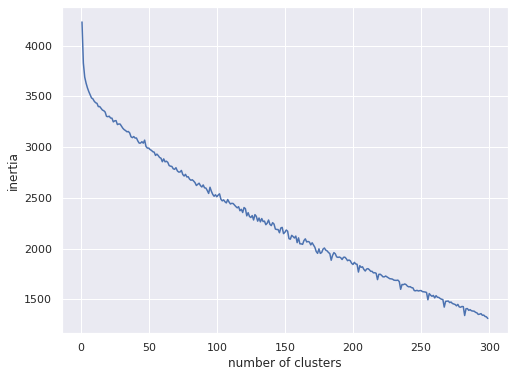

In [359]:
plt.plot(range(1, 300), inertia)
plt.ylabel('inertia')
plt.xlabel('number of clusters')


In [360]:
# I have only 1235 movies and it doesn't make any sense to devide it to 300 clusters, so I choose 10
kmeans = KMeans(n_clusters = 10)
kmeans.fit(data)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ecc10>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ecc10>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

KMeans(n_clusters=10)

In [361]:
kmeans.labels_

array([1, 2, 8, 0, 2, 9, 2, 2, 7, 0, 9, 9, 7, 2, 2, 3, 7, 2, 3, 7, 0, 9,
       3, 2, 7, 3, 9, 8, 7, 7, 6, 5, 7, 2, 5, 3, 6, 2, 7, 5, 8, 7, 9, 2,
       1, 9, 3, 7, 2, 8, 6, 7, 2, 3, 4, 9, 4, 7, 4, 2, 5, 1, 3, 2, 2, 5,
       6, 8, 1, 5, 0, 7, 6, 7, 0, 8, 7, 2, 4, 7, 3, 2, 2, 2, 2, 2, 4, 5,
       8, 4, 3, 2, 1, 2, 1, 6, 7, 6, 5, 2, 6, 2, 5, 0, 5, 7, 9, 7, 3, 3,
       3, 4, 2, 0, 4, 0, 2, 2, 5, 4, 2, 1, 2, 5, 6, 0, 3, 7, 2, 2, 3, 8,
       3, 2, 5, 0, 2, 4, 8, 2, 3, 5, 0, 2, 3, 4, 5, 0, 3, 2, 2, 2, 8, 7,
       0, 3, 2, 3, 0, 3, 5, 9, 2, 9, 2, 5, 0, 4, 1, 2, 1, 2, 0, 2, 2, 9,
       3, 5, 9, 2, 0, 3, 9, 2, 2, 1, 3, 9, 2, 2, 4, 9, 3, 0, 2, 2, 2, 2,
       3, 7, 9, 6, 5, 5, 2, 4, 4, 6, 5, 7, 6, 3, 2, 8, 2, 2, 8, 3, 3, 1,
       4, 3, 3, 6, 2, 5, 6, 2, 5, 8, 6, 2, 3, 1, 6, 5, 2, 3, 5, 9, 2, 2,
       5, 6, 0, 7, 3, 2, 5, 5, 1, 6, 4, 5, 3, 5, 0, 7, 2, 2, 5, 8, 2, 2,
       2, 5, 7, 3, 6, 2, 3, 3, 6, 3, 6, 9, 2, 5, 3, 6, 3, 7, 5, 9, 6, 5,
       8, 3, 3, 7, 6, 0, 3, 3, 5, 5, 3, 8, 2, 2, 3,

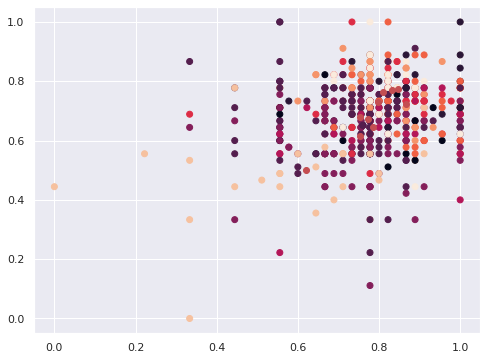

In [362]:
plt.scatter(data[:, 0], 
            data[:, 1], 
            c=kmeans.labels_)

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            c='r')

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [363]:
from sklearn.cluster import DBSCAN

In [364]:
ratings= pd.read_csv('./data/ml-latest-small/ratings.csv', index_col=0)
ratings= pd.pivot_table(ratings,
            index='userId',
            columns='movieId',
            values='rating')
ratings= ratings.loc[:, ratings.count()>50]# ratings==20
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
ratings_imp = pd.DataFrame(imputer.fit_transform(ratings), columns=ratings.columns, index=ratings.index)

In [365]:
scaler = MinMaxScaler()
X = scaler.fit_transform(ratings_imp)

In [366]:
dbscan = DBSCAN(eps=0.05, min_samples=10)
labels = dbscan.fit_predict(X)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f66007ec8b0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


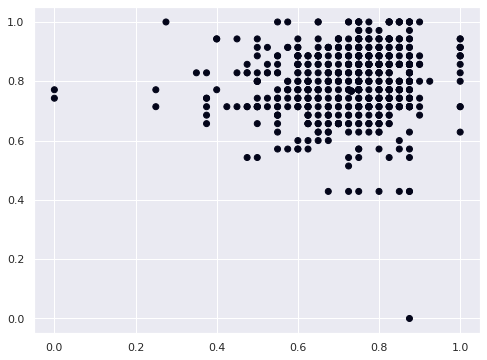

In [371]:
plt.scatter(X[:,7].astype(float),
            X[:, 120].astype(float), 
            c=labels)

# PCA (Principal Component Analysis)

In [373]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [372]:
ratings= pd.read_csv('./data/ml-latest-small/ratings.csv', index_col=0)
ratings= pd.pivot_table(ratings,
            index='userId',
            columns='movieId',
            values='rating')

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
ratings_imp = pd.DataFrame(imputer.fit_transform(ratings), columns=ratings.columns, index=ratings.index)

In [383]:
ratings_imp.shape

(610, 9724)

In [374]:
scaler = StandardScaler()
scaled_rating = scaler.fit_transform(ratings_imp)

In [392]:
scaled_rating.shape

(610, 9724)

In [393]:
trans_rating = scaled_rating.transpose()
trans_rating.shape

(9724, 610)

In [394]:
pca = PCA()
w = pca.fit_transform(trans_rating)

In [395]:
w.shape

(9724, 610)

In [396]:
# print(pca.components_)
print(pca.explained_variance_ratio_)

[6.39537831e-02 3.19281631e-02 3.01758505e-02 2.69291774e-02
 2.29633761e-02 1.96382994e-02 1.45029526e-02 1.35297806e-02
 1.32869957e-02 1.26929524e-02 1.16074312e-02 1.12220692e-02
 1.10176049e-02 1.08262171e-02 9.92985696e-03 9.50740656e-03
 8.47380566e-03 8.21086028e-03 7.94265069e-03 7.80091525e-03
 7.50157287e-03 7.18745969e-03 7.14579351e-03 6.71857526e-03
 6.70162062e-03 6.37245609e-03 6.17022112e-03 6.00713729e-03
 5.81577633e-03 5.66839908e-03 5.39002291e-03 5.36551034e-03
 5.23709657e-03 5.21342069e-03 5.08941750e-03 4.99316265e-03
 4.84539301e-03 4.81479826e-03 4.73426738e-03 4.69299711e-03
 4.59837500e-03 4.50284025e-03 4.45521500e-03 4.36881147e-03
 4.29089438e-03 4.22553331e-03 4.19958549e-03 4.03857083e-03
 3.94836912e-03 3.86221726e-03 3.79921790e-03 3.79076356e-03
 3.71812425e-03 3.64903374e-03 3.59958854e-03 3.48580667e-03
 3.46767643e-03 3.44227088e-03 3.38729456e-03 3.37069606e-03
 3.27598071e-03 3.25892596e-03 3.21697528e-03 3.14228950e-03
 3.12171174e-03 3.079331

In [397]:
component_no = np.arange(1, w.shape[1]+1)

Text(0, 0.5, 'explained variance [%]')

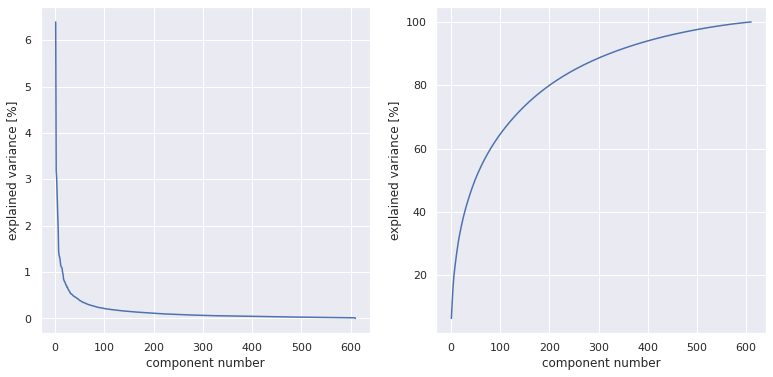

In [398]:
plt.figure(figsize = (13, 6))

plt.subplot(1, 2, 2)
plt.plot(component_no, np.cumsum(pca.explained_variance_ratio_*100) )
plt.xlabel("component number")
plt.ylabel("explained variance [%]")

plt.subplot(1, 2, 1)
# Elbow plot
plt.plot(component_no, pca.explained_variance_ratio_*100 )
plt.xlabel("component number")
plt.ylabel("explained variance [%]")

Text(0, 0.5, 'PC 2 [3.0 %]')

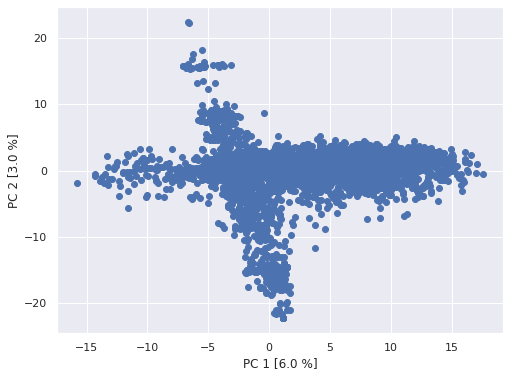

In [399]:
# Plot FIRST and SECOND principal component (TSNE plot)
plt.scatter(w[:,0],w[:,1])
plt.xlabel(f'PC 1 [{round(pca.explained_variance_ratio_[0],2)*100} %]')
plt.ylabel(f'PC 2 [{round(pca.explained_variance_ratio_[1],2)*100} %]')

Text(0, 0.5, 'PC 3 [3.0 %]')

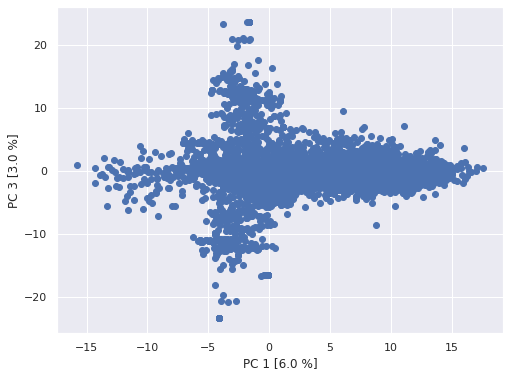

In [400]:
# Plot FIRST and THIRD principal component
plt.scatter(w[:,0],w[:,2]) # check with (W[:,1],W[:,2]) # check with (W[:,1],W[:,6])
plt.xlabel(f'PC 1 [{round(pca.explained_variance_ratio_[0],2)*100} %]')
plt.ylabel(f'PC 3 [{round(pca.explained_variance_ratio_[2],2)*100} %]')

Text(0, 0.5, 'PC 7 [1.0 %]')

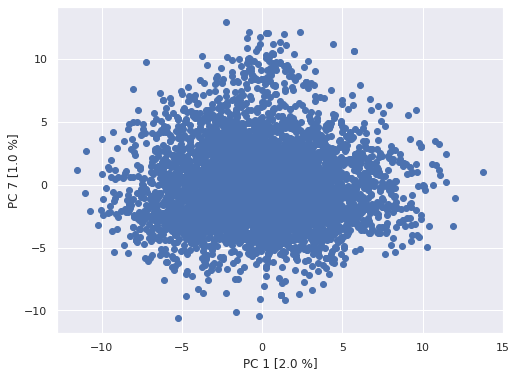

In [401]:
# Plot FIRST and LAST principal component
plt.scatter(w[:,5],w[:,6]) # check with (W[:,1],W[:,2]) # check with (W[:,1],W[:,6])
plt.xlabel(f'PC 1 [{round(pca.explained_variance_ratio_[5],2)*100} %]')
plt.ylabel(f'PC 7 [{round(pca.explained_variance_ratio_[6],2)*100} %]')


In [402]:
w.shape

(9724, 610)

In [403]:
scaled_rating.shape

(610, 9724)

In [404]:
pca.explained_variance_ratio_.shape

(610,)

In [ ]:
# Transform the data: 
#                   Project the original data set by multiplying it with the desired number of principal components
                    # SKlearn will give us the transformed data (T)
                    #fit_transform(X[, y]): Fit the model with X and apply the dimensionality reduction on X.

In [407]:
T = w_select = w[:, :150]

### K Means on Reducted Data

In [408]:
scaler = MinMaxScaler()

data = scaler.fit_transform(T)

In [410]:
inertia = []
for i in range(1,100):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f65fe9cd9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f65fe9cdd30>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f65fe9cdaf0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f65fe9cd9d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f65fea02940>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f65fea020d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6605e7e0d0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6603342ee0>
Traceback (most recent call last):
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/esharifi/anaconda3/envs/spiced/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Text(0.5, 0, 'number of clusters')

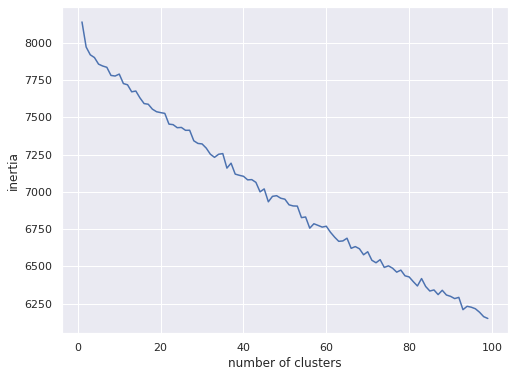

In [411]:
plt.plot(range(1, 100), inertia)
plt.ylabel('inertia')
plt.xlabel('number of clusters')
